# Nucleolarome IDR Sequence Grammar

This notebook calculates the sequence features of the IDR nucleolarome and then examines the features by nucleolar location

* Part 1: Gathering all features of the full human IDRome
    * Gather data for the full human IDRome of sequences >=30
    
* Part 2: Analyze nucleolar IDR sequence features
    * Find significant / depleted features compared to full IDRome
    
* Part 3: Analyze nucleolar sublocations for features

# Part 1: Gathering all features of the full human IDRome

## Load in All Sapiens Disordered Stretches >=30

In [1]:
import pandas as pd

speciesname='sapiens'

# Gene names table
mapdf=pd.read_table('../Bioinformatics_Data/sapiens_uniprot_gene_name.tsv')
accsmap=mapdf['Uniprot'].tolist()
genesmap=mapdf['Gene'].tolist()

myseqs=[]
fullaccswnums=[]
goodidxs=[]
badidxs=[]
fullaccs=[]
mygenes=[]

myfile = open('../Bioinformatics_Data//min_length_30/All/'+speciesname, 'r')
Lines = myfile.readlines()

count=0
for line in Lines:
    count=count+1
    fullline=line.split(" ")
    tmpseq=fullline[3]
    tmpacc=fullline[0]
    currseq=tmpseq.strip('\n')
    
    if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
        myseqs.append(currseq)
        fullaccswnums.append(tmpacc)
        goodidxs.append(count)
        tmp=tmpacc.split("_")
        fullaccs.append(tmp[0])
        if tmp[0] in accsmap:
            currgidx=accsmap.index(tmp[0])
            mygenes.append(genesmap[currgidx]+' IDR'+tmp[1])
        else:
            mygenes.append(tmp[0]+' IDR'+tmp[1])
    else:
        badidxs.append(count)
        
print(len(myseqs))
print(count)
print(len(goodidxs))
print(badidxs)
#print(mygenes)

24508
24535
24508
[337, 338, 5387, 7965, 8270, 8860, 9309, 13434, 18343, 20894, 20895, 20896, 20897, 20898, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 21628, 22016, 23960]


## Load NARDINI data for all sapiens IDRs >= 30

In [2]:
import numpy as np
zvec=np.load('../Bioinformatics_Data/'+speciesname+'_full_idrome_gte_30_nardini.npy')
#print(zvec)

# check vector
#idx=fullaccswnums.index('Q8NFD5_1')
idx=fullaccswnums.index('P11387_1')
print(myseqs[idx])
print(zvec[idx])
print(zvec[idx][21])
print(len(zvec))

MSGDHLHNDSQIEADFRLNDSHKHKDKHKDREHRHKEHKKEKDREKSKHSNSEHKDSEKKHKEKEKTKHKDGSSEKHKDKHKDRDKEKRKEEKVRASGDAKIKKEKENGFSSPPQIKDEPEDDGYFVPPKEDIKPLKRPRDEDDADYKPKKIKTEDTKKEKKRKLEEEEDGKLKKPKNKDKDKKVPEPDNKKKKPKKEEEQKWK
[ 2.12631858  0.          1.96867202  1.23736946  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.97793324  0.16550444  0.
  0.          0.          0.         -0.64182248  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
-0.6418224825431968
24508


## List of patterning and compositional feature names

In [3]:
myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','K/R Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Block','C Block','D Block','E Block','F Block','G Block','H Block','I Block','K Block','L Block','M Block','N Block','P Block','Q Block','R Block','S Block','T Block','V Block','Y Block','RG Frac']

myfeatnardini=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly']

print(len(myfeat))

90


## Get all compositional features for the sapiens IDRome

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
import re

numInt=2 # Number of allowable interruption residues
minBlockLen=4 # Must have at least minBlockLen lysines in the block


aas='ACDEFGHIKLMNPQRSTVY' # For blocks - no W Block in proteome so this is removed

filename=[speciesname]

for fname in filename:
    myfile = open('../Bioinformatics_Data//min_length_30/All/'+fname, 'r')
    Lines = myfile.readlines()
    fracA=[]
    fracC=[]
    fracD=[]
    fracE=[]
    fracF=[]
    fracG=[]
    fracH=[]
    fracI=[]
    fracK=[]
    fracL=[]
    fracM=[]
    fracN=[]
    fracP=[]
    fracQ=[]
    fracR=[]
    fracS=[]
    fracT=[]
    fracV=[]
    fracW=[]
    fracY=[]
    fracpos=[]
    fracneg=[]
    fracpol=[]
    fracali=[]
    fracaro=[]
    fracKtoR=[]
    fracEtoD=[]
    fracexp=[]
    fcr=[]
    ncpr=[]
    mhydro=[]
    dispro=[]
    isopoi=[]
    ppii=[]
    fracpatch=[[] for _ in range(len(aas))]
    rgpatch=[]
    
    for line in Lines:
        fullline=line.split(" ")
        tmpseq=fullline[3]
        currseq=tmpseq.strip('\n')

        if len(currseq)>=30 and "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
            SeqOb = SequenceParameters(currseq)
            slen=SeqOb.get_length()
            aafrac=SeqOb.get_amino_acid_fractions()
            
            fracexp.append(SeqOb.get_fraction_expanding())
            fcr.append(SeqOb.get_FCR())
            ncpr.append(SeqOb.get_NCPR())
            mhydro.append(SeqOb.get_mean_hydropathy())
            dispro.append(SeqOb.get_fraction_disorder_promoting())
            isopoi.append(SeqOb.get_isoelectric_point())
            ppii.append(SeqOb.get_PPII_propensity(mode='hilser'))

            ## AA Fractions
            fracA.append(aafrac['A'])
            fracC.append(aafrac['C'])
            fracD.append(aafrac['D'])
            fracE.append(aafrac['E'])
            fracF.append(aafrac['F'])
            fracG.append(aafrac['G'])
            fracH.append(aafrac['H'])
            fracI.append(aafrac['I'])
            fracK.append(aafrac['K'])
            fracL.append(aafrac['L'])
            fracM.append(aafrac['M'])
            fracN.append(aafrac['N'])
            fracP.append(aafrac['P'])
            fracQ.append(aafrac['Q'])
            fracR.append(aafrac['R'])
            fracS.append(aafrac['S'])
            fracT.append(aafrac['T'])
            fracV.append(aafrac['V'])
            fracW.append(aafrac['W'])
            fracY.append(aafrac['Y'])

            ## AA Physicochemical properties
            fracpos.append(aafrac['K']+aafrac['R'])
            fracneg.append(aafrac['D']+aafrac['E'])
            fracpol.append(aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])
            fracali.append(aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])
            fracaro.append(aafrac['F']+aafrac['W']+aafrac['Y'])
            
            ## AA ratios
            fracKtoR.append(np.log10(((slen*aafrac['K'])+1)/((slen*aafrac['R'])+1)))
            fracEtoD.append(np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1)))
            
            ## Fraction of sequence containing blocks
            counta=-1
            for a in aas:
                counta=counta+1
                justKs='0'*len(currseq) # Set string of zeros

                pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

                # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
                pos2=pos
                for p in range(0,len(pos)-1):
                    tdi=pos[p+1]-pos[p]
                    if tdi > 1 and tdi<=numInt+1:
                        myt=list(range(pos[p]+1,pos[p+1]))
                        for item in myt:
                            pos2.append(item)


                # For positions make those 1 in string of zeros   
                justKs = list(justKs)
                for p in pos2:
                    justKs[p]='1'
                justKs = ''.join(justKs)


                the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
                idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

                numpatches=0
                count=-1
                patchescombined=''
                for o in the_ones:
                    count=count+1
                    myrange=idx_ones[count] # Get indices for each consecutive strength
                    subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                    pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
                    # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
                    if len(pos3)>=minBlockLen:
                        numpatches=numpatches+1
                        patchescombined+=subseq

                fracpatch[counta].append(len(patchescombined)/len(currseq))
                
            ## Fraction of sequence in RG stretch
            justKs='0'*len(currseq) # Set string of zeros
            pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

            # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
            pos2=pos
            for p in range(0,len(pos)-1):
                tdi=pos[p+1]-pos[p]
                if tdi > 1 and tdi<=numInt+1:
                    myt=list(range(pos[p]+1,pos[p+1]))
                    for item in myt:
                        pos2.append(item)

            # For positions make those 1 in string of zeros             
            justKs = list(justKs)
            for p in pos2:
                justKs[p]='1'
            justKs = ''.join(justKs)

            the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
            idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

            count=-1
            patchescombined=''
            for o in the_ones:
                count=count+1
                myrange=idx_ones[count] # Get indices for each consecutive strength
                subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
                pos3=subseq.count('RG')
                #print(subseq)
                if pos3>=2:
                    patchescombined+=subseq

            rgpatch.append(len(patchescombined)/len(currseq))

    meanvals_sapiens=[np.mean(fracA), np.mean(fracC), np.mean(fracD), np.mean(fracE), np.mean(fracF), np.mean(fracG), np.mean(fracH), np.mean(fracI), np.mean(fracK), np.mean(fracL), np.mean(fracM), np.mean(fracN), np.mean(fracP), np.mean(fracQ), np.mean(fracR), np.mean(fracS), np.mean(fracT), np.mean(fracV), np.mean(fracW), np.mean(fracY), np.mean(fracpos), np.mean(fracneg), np.mean(fracpol), np.mean(fracali), np.mean(fracaro), np.mean(fracKtoR), np.mean(fracEtoD), np.mean(fracexp), np.mean(fcr), np.mean(ncpr), np.mean(mhydro), np.mean(dispro), np.mean(isopoi), np.mean(ppii)]
    stdvals_sapiens=[np.std(fracA), np.std(fracC), np.std(fracD), np.std(fracE), np.std(fracF), np.std(fracG), np.std(fracH), np.std(fracI), np.std(fracK), np.std(fracL), np.std(fracM), np.std(fracN), np.std(fracP), np.std(fracQ), np.std(fracR), np.std(fracS), np.std(fracT), np.std(fracV), np.std(fracW), np.std(fracY), np.std(fracpos), np.std(fracneg), np.std(fracpol), np.std(fracali), np.std(fracaro), np.std(fracKtoR), np.std(fracEtoD), np.std(fracexp), np.std(fcr), np.std(ncpr), np.std(mhydro), np.std(dispro), np.std(isopoi), np.std(ppii)]
    
    for a in fracpatch:
        meanvals_sapiens.append(np.mean(a))
        stdvals_sapiens.append(np.std(a))
    
    meanvals_sapiens.append(np.mean(rgpatch))
    stdvals_sapiens.append(np.std(rgpatch))
    

    print(meanvals_sapiens)
    print(stdvals_sapiens)
    print(len(rgpatch))
    print(len(fracA))
    print(np.mean(rgpatch))
    print(np.std(rgpatch))
    
    
    plt.hist(fracpol)

## Add compositional data to z-score feature vector

In [ ]:
typeall=['pol','hyd','pos','neg','aro','ala','pro','gly']
zvecaa=np.zeros((len(myseqs),int(len(typeall)+(len(typeall)*(len(typeall)-1))/2)+34+len(aas)+1))
tmp=zvec

countseq=-1
for currseq in myseqs:
    countseq=countseq+1
    SeqOb = SequenceParameters(currseq)
    
    slen=SeqOb.get_length()
    aafrac=SeqOb.get_amino_acid_fractions()
    
    fracexp=SeqOb.get_fraction_expanding()
    fcr=SeqOb.get_FCR()
    ncpr=SeqOb.get_NCPR()
    mhydro=SeqOb.get_mean_hydropathy()
    dispro=SeqOb.get_fraction_disorder_promoting()
    isopoi=SeqOb.get_isoelectric_point()
    ppii=SeqOb.get_PPII_propensity(mode='hilser')
    
    tmpseq=[]
    
    ## AA Fractions
    afA=np.array((aafrac['A']-meanvals_sapiens[0])/stdvals_sapiens[0])
    tmpseq.append(afA)
    afC=np.array((aafrac['C']-meanvals_sapiens[1])/stdvals_sapiens[1])
    tmpseq.append(afC)
    afD=np.array((aafrac['D']-meanvals_sapiens[2])/stdvals_sapiens[2])
    tmpseq.append(afD)
    afE=np.array((aafrac['E']-meanvals_sapiens[3])/stdvals_sapiens[3])
    tmpseq.append(afE)
    afF=np.array((aafrac['F']-meanvals_sapiens[4])/stdvals_sapiens[4])
    tmpseq.append(afF)
    afG=np.array((aafrac['G']-meanvals_sapiens[5])/stdvals_sapiens[5])
    tmpseq.append(afG)
    afH=np.array((aafrac['H']-meanvals_sapiens[6])/stdvals_sapiens[6])
    tmpseq.append(afH)
    afI=np.array((aafrac['I']-meanvals_sapiens[7])/stdvals_sapiens[7])
    tmpseq.append(afI)
    afK=np.array((aafrac['K']-meanvals_sapiens[8])/stdvals_sapiens[8])
    tmpseq.append(afK)
    afL=np.array((aafrac['L']-meanvals_sapiens[9])/stdvals_sapiens[9])
    tmpseq.append(afL)
    afM=np.array((aafrac['M']-meanvals_sapiens[10])/stdvals_sapiens[10])
    tmpseq.append(afM)
    afN=np.array((aafrac['N']-meanvals_sapiens[11])/stdvals_sapiens[11])
    tmpseq.append(afN)
    afP=np.array((aafrac['P']-meanvals_sapiens[12])/stdvals_sapiens[12])
    tmpseq.append(afP)
    afQ=np.array((aafrac['Q']-meanvals_sapiens[13])/stdvals_sapiens[13])
    tmpseq.append(afQ)
    afR=np.array((aafrac['R']-meanvals_sapiens[14])/stdvals_sapiens[14])
    tmpseq.append(afR)
    afS=np.array((aafrac['S']-meanvals_sapiens[15])/stdvals_sapiens[15])
    tmpseq.append(afS)
    afT=np.array((aafrac['T']-meanvals_sapiens[16])/stdvals_sapiens[16])
    tmpseq.append(afT)
    afV=np.array((aafrac['V']-meanvals_sapiens[17])/stdvals_sapiens[17])
    tmpseq.append(afV)
    afW=np.array((aafrac['W']-meanvals_sapiens[18])/stdvals_sapiens[18])
    tmpseq.append(afW)
    afY=np.array((aafrac['Y']-meanvals_sapiens[19])/stdvals_sapiens[19])
    tmpseq.append(afY)
    
    ## AA Physicochemical properties
    afpos=np.array(((aafrac['K']+aafrac['R'])-meanvals_sapiens[20])/stdvals_sapiens[20])
    tmpseq.append(afpos)
    afneg=np.array(((aafrac['D']+aafrac['E'])-meanvals_sapiens[21])/stdvals_sapiens[21])
    tmpseq.append(afneg)
    afpol=np.array(((aafrac['Q']+aafrac['N']+aafrac['S']+aafrac['T']+aafrac['G']+aafrac['C']+aafrac['H'])-meanvals_sapiens[22])/stdvals_sapiens[22])
    tmpseq.append(afpol)
    afali=np.array(((aafrac['A']+aafrac['L']+aafrac['M']+aafrac['I']+aafrac['V'])-meanvals_sapiens[23])/stdvals_sapiens[23])
    tmpseq.append(afali)
    afaro=np.array(((aafrac['F']+aafrac['W']+aafrac['Y'])-meanvals_sapiens[24])/stdvals_sapiens[24])
    tmpseq.append(afaro)
    
    ## AA ratios
    afRK=np.array((np.log10(((slen*aafrac['K'])+1)/((slen*aafrac['R'])+1))-meanvals_sapiens[25])/stdvals_sapiens[25])
    tmpseq.append(afRK)
    afED=np.array((np.log10(((slen*aafrac['E'])+1)/((slen*aafrac['D'])+1))-meanvals_sapiens[26])/stdvals_sapiens[26])
    tmpseq.append(afED)
    
    ## Charge measures
    afexp=np.array((fracexp-meanvals_sapiens[27])/stdvals_sapiens[27])
    tmpseq.append(afexp)
    afcr=np.array((fcr-meanvals_sapiens[28])/stdvals_sapiens[28])
    tmpseq.append(afcr)
    ancpr=np.array((ncpr-meanvals_sapiens[29])/stdvals_sapiens[29])
    tmpseq.append(ancpr)
    
    ## Miscellaneous measures
    amhydro=np.array((mhydro-meanvals_sapiens[30])/stdvals_sapiens[30])
    tmpseq.append(amhydro)
    adispro=np.array((dispro-meanvals_sapiens[31])/stdvals_sapiens[31])
    tmpseq.append(adispro)
    aisopoi=np.array((isopoi-meanvals_sapiens[32])/stdvals_sapiens[32])
    tmpseq.append(aisopoi)
    appii=np.array((ppii-meanvals_sapiens[33])/stdvals_sapiens[33])
    tmpseq.append(appii)
    
    ## Fraction of sequence containing patches
    counta=-1
    for a in aas:
        counta=counta+1
        justKs='0'*len(currseq) # Set string of zeros

        pos=[i for i, ltr in enumerate(currseq) if ltr == a] # Find positions of the residue of interest

        # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
        pos2=pos
        for p in range(0,len(pos)-1):
            tdi=pos[p+1]-pos[p]
            if tdi > 1 and tdi<=numInt+1:
                myt=list(range(pos[p]+1,pos[p+1]))
                for item in myt:
                    pos2.append(item)


        # For positions make those 1 in string of zeros   
        justKs = list(justKs)
        for p in pos2:
            justKs[p]='1'
        justKs = ''.join(justKs)


        the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
        idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

        numpatches=0
        count=-1
        patchescombined=''
        for o in the_ones:
            count=count+1
            myrange=idx_ones[count] # Get indices for each consecutive strength
            subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
            pos3=[i for i, ltr in enumerate(subseq) if ltr == a] # Get positions of the actual residue of interest in this subseq
            # If the number of the actual residue of interest is greater than or equal to minBlockLen add to the number of patches and string patches together in string
            if len(pos3)>=minBlockLen:
                numpatches=numpatches+1
                patchescombined+=subseq

        afracpatch=(len(patchescombined)/len(currseq))
        afracp=np.array((afracpatch-meanvals_sapiens[33+counta+1])/stdvals_sapiens[33+counta+1])
        tmpseq.append(afracp)
    
    ## Fraction of sequence in RG stretch
    justKs='0'*len(currseq) # Set string of zeros
    pos=[i for i, ltr in enumerate(currseq) if ltr == 'R' or ltr == 'G'] # Find positions of Rs and Gs

    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=pos
    for p in range(0,len(pos)-1):
        tdi=pos[p+1]-pos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(pos[p]+1,pos[p+1]))
            for item in myt:
                pos2.append(item)

    # For positions make those 1 in string of zeros             
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    count=-1
    patchescombined=''
    for o in the_ones:
        count=count+1
        myrange=idx_ones[count] # Get indices for each consecutive strength
        subseq=currseq[myrange[0]:myrange[1]] # Get subseq that corresponds to this stength
        pos3=subseq.count('RG')
        if pos3>=2:
            patchescombined+=subseq

    arg=(len(patchescombined)/len(currseq))
    argp=np.array((arg-meanvals_sapiens[33+counta+2])/stdvals_sapiens[33+counta+2])
    tmpseq.append(argp)
    
    zvecaa[countseq,:]=np.append(tmp[countseq,:],tmpseq)
    #print(np.append(zvecaa[countseq,:],afA))
    #print((zvecaa))
    
    
print(np.shape(zvecaa))

#np.save(speciesname+'_full_idrome_gte_30_nardini_compositional.npy',zvecaa)

# check vector
idx=fullaccswnums.index('P19338_1')
print(myseqs[idx])
print(zvecaa[idx])


# Part 2: Analyze nucleolar IDR sequence features

## Load in nucleolarome accessions extracted from the HPA

In [6]:
tmpdf=pd.read_table('../Bioinformatics_Data/HPA_All/2023_03/subcell_location_Nucleoli_Nucleoli_fibrillar_center_Nucleoli_rim.tsv')
print(tmpdf)

accs_nuc=tmpdf['Uniprot'].tolist()
accs_nuc = [x for x in accs_nuc if str(x) != 'nan']

# Find indices of IDRs that correspond to all nucleolar proteins
allidx_nuc=[]
for ns in accs_nuc:
    indices = [i for i, x in enumerate(fullaccs) if x == ns]
    for i in indices:
        allidx_nuc.append(i)
allidx_nuc = list(set(allidx_nuc)) # all unique indices
print(len(allidx_nuc))


# Get the corresponding gene names and nucleolar accswnums
genenames_nuc=[]
genenameswnums_nuc=[]
for i in allidx_nuc:

    # Get gene names
    tmp=mygenes[i].split(' ')
    genenames_nuc.append(tmp[0])
    
    # Get gene names with IDR number
    genenameswnums_nuc.append(mygenes[i])
    
#print(genenames_nuc)
#print(genenameswnums_nuc)
print(len(genenameswnums_nuc))

         Gene          Ensembl Uniprot
0        AATF  ENSG00000275700  Q9NY61
1      ABCA12  ENSG00000144452  Q86UK0
2       ABCC4  ENSG00000125257  O15439
3       ABCC8  ENSG00000006071  Q09428
4       ABCF3  ENSG00000161204  Q9NUQ8
...       ...              ...     ...
1420  ZSCAN25  ENSG00000197037  Q6NSZ9
1421  ZSCAN26  ENSG00000197062  Q16670
1422   ZSWIM3  ENSG00000132801  Q96MP5
1423     ZXDC  ENSG00000070476  Q2QGD7
1424     ZZZ3  ENSG00000036549  Q8IYH5

[1425 rows x 3 columns]
2231
2231


## Compare z-score distributions between nucleolar IDRs and rest of IDRome

2231
2231
24508
Ks_2sampResult(statistic=0.021374069977120908, pvalue=0.31235423812398916)
pol-pol
0.0
Ks_2sampResult(statistic=0.01331664332226079, pvalue=0.8647073017998619)
pol-hyd
0.0
Ks_2sampResult(statistic=0.05402504431238586, pvalue=1.4453280325554399e-05)
pol-pos
4.840033573972642


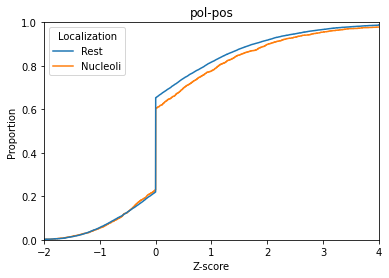

Ks_2sampResult(statistic=0.04780266843932979, pvalue=0.0001888077162456423)
pol-neg
3.723980260809003


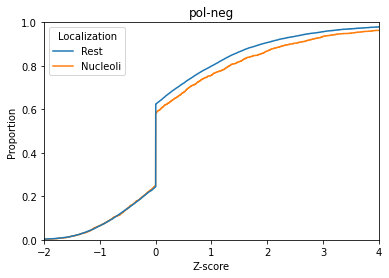

Ks_2sampResult(statistic=0.0026128779470304493, pvalue=1.0)
pol-aro
0.0
Ks_2sampResult(statistic=0.01121382587081965, pvalue=0.9606672889272257)
pol-ala
0.0
Ks_2sampResult(statistic=0.038548762598267894, pvalue=0.004825570330886934)
pol-pro
-2.3164513503162034


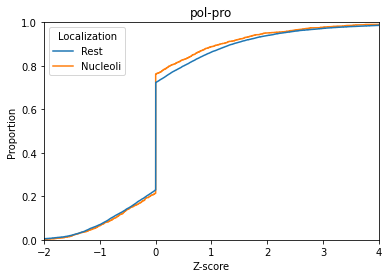

Ks_2sampResult(statistic=0.03286868062963477, pvalue=0.02500804193753397)
pol-gly
-1.6019203110289704


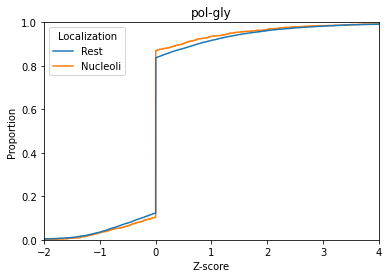

Ks_2sampResult(statistic=0.013543001530362586, pvalue=0.8509464404982713)
hyd-hyd
0.0
Ks_2sampResult(statistic=0.04983810156731017, pvalue=8.43243659222063e-05)
hyd-pos
4.074046915807569


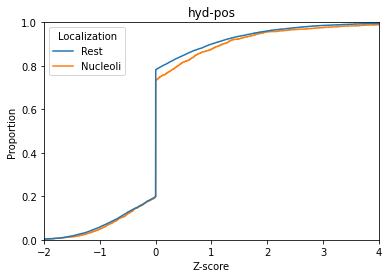

Ks_2sampResult(statistic=0.03737159931249079, pvalue=0.006933744481327741)
hyd-neg
2.159032166774527


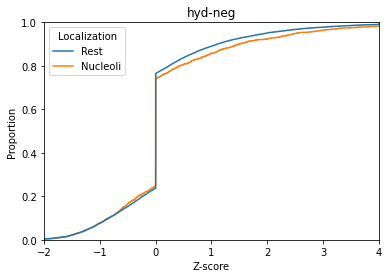

Ks_2sampResult(statistic=0.0017513485466303935, pvalue=1.0)
hyd-aro
0.0
Ks_2sampResult(statistic=0.009973926150121493, pvalue=0.987674927320988)
hyd-ala
0.0
Ks_2sampResult(statistic=0.020841514505828745, pvalue=0.34175833518267573)
hyd-pro
0.0
Ks_2sampResult(statistic=0.015871694292394878, pvalue=0.6865798099055347)
hyd-gly
0.0
Ks_2sampResult(statistic=0.06430563050247884, pvalue=1.0403625706967222e-07)
pos-pos
6.982815280882433


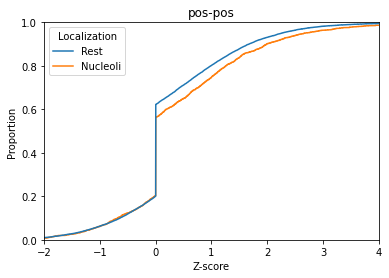

Ks_2sampResult(statistic=0.07563513044782089, pvalue=1.6769772508294807e-10)
pos-neg
9.775472828810871


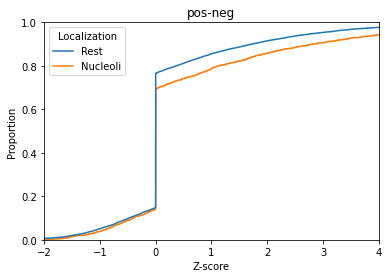

Ks_2sampResult(statistic=0.0016126965988945141, pvalue=1.0)
pos-aro
0.0
Ks_2sampResult(statistic=0.013661512627759831, pvalue=0.8435259300410523)
pos-ala
0.0
Ks_2sampResult(statistic=0.01008813141138254, pvalue=0.9860157770364931)
pos-pro
0.0
Ks_2sampResult(statistic=0.007929599659653785, pvalue=0.9995589992444864)
pos-gly
0.0
Ks_2sampResult(statistic=0.0493994294203739, pvalue=0.00010060799332642763)
neg-neg
3.9973675131205297


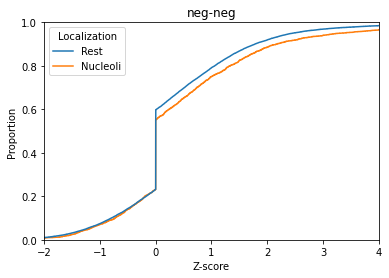

Ks_2sampResult(statistic=0.002462938269983894, pvalue=1.0)
neg-aro
0.0
Ks_2sampResult(statistic=0.012207649068399107, pvalue=0.9230790749270404)
neg-ala
0.0
Ks_2sampResult(statistic=0.011995274767375691, pvalue=0.9323398122216717)
neg-pro
0.0
Ks_2sampResult(statistic=0.012287588727135881, pvalue=0.9194245598917149)
neg-gly
0.0
Ks_2sampResult(statistic=0.002427344699305455, pvalue=1.0)
aro-aro
0.0
Ks_2sampResult(statistic=0.0009433402869904172, pvalue=1.0)
aro-ala
0.0
Ks_2sampResult(statistic=0.003680926516137717, pvalue=1.0)
aro-pro
0.0
Ks_2sampResult(statistic=0.0028300208609712517, pvalue=1.0)
aro-gly
0.0
Ks_2sampResult(statistic=0.013768937203142526, pvalue=0.8366783174970089)
ala-ala
0.0
Ks_2sampResult(statistic=0.010698795555016946, pvalue=0.9744130918548257)
ala-pro
0.0
Ks_2sampResult(statistic=0.012148272795322823, pvalue=0.9257341440752256)
ala-gly
0.0
Ks_2sampResult(statistic=0.038328038194456626, pvalue=0.0051693678851752285)
pro-pro
-2.2865625595683707


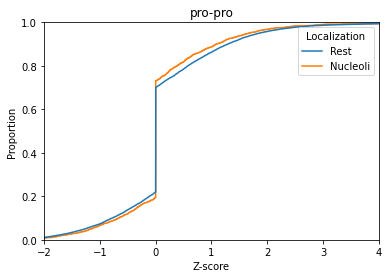

Ks_2sampResult(statistic=0.02240893946310285, pvalue=0.26034507540365714)
pro-gly
0.0
Ks_2sampResult(statistic=0.03190369043758501, pvalue=0.03222372193059308)
gly-gly
1.491824298784435


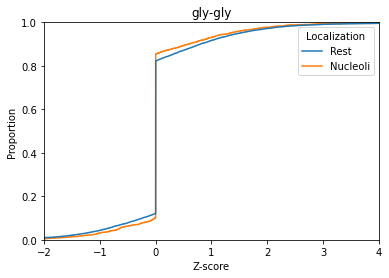

Ks_2sampResult(statistic=0.025107431114619883, pvalue=0.15504525515367146)
Frac A
0.0
Ks_2sampResult(statistic=0.030530651849063895, pvalue=0.045621503911390075)
Frac C
1.340830402319947


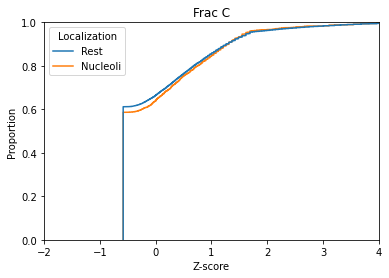

Ks_2sampResult(statistic=0.041846509939730936, pvalue=0.001646476012321948)
Frac D
2.7834445921868745


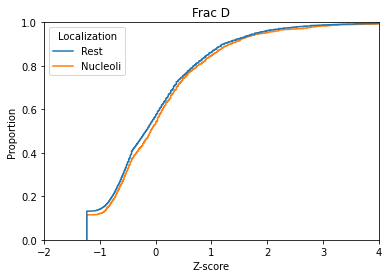

Ks_2sampResult(statistic=0.056190115301237464, pvalue=5.49098391952081e-06)
Frac E
5.2603498281306535


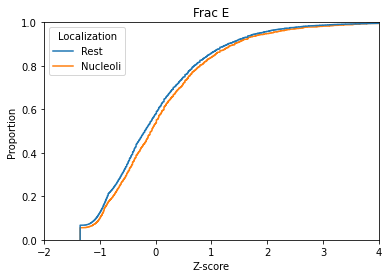

Ks_2sampResult(statistic=0.018416262362402624, pvalue=0.4972464716836407)
Frac F
0.0
Ks_2sampResult(statistic=0.05523856575656649, pvalue=8.44137678621541e-06)
Frac G
-5.07358671428758


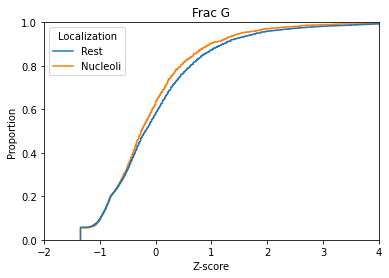

Ks_2sampResult(statistic=0.018067489635359424, pvalue=0.5221488955752185)
Frac H
0.0
Ks_2sampResult(statistic=0.016838595953757585, pvalue=0.6132451006004499)
Frac I
0.0
Ks_2sampResult(statistic=0.12006910585308606, pvalue=8.079270739152653e-26)
Frac K
25.092627838266907


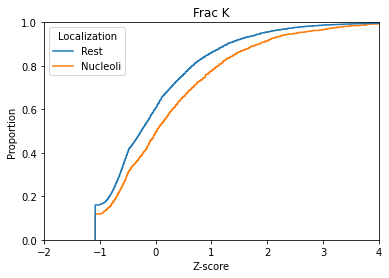

Ks_2sampResult(statistic=0.017158012536301115, pvalue=0.589185466797728)
Frac L
0.0
Ks_2sampResult(statistic=0.034148922413199057, pvalue=0.017658455050588145)
Frac M
1.753047295795541


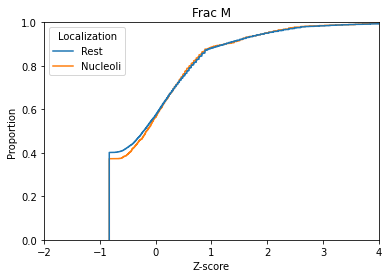

Ks_2sampResult(statistic=0.05111830310941534, pvalue=4.992283838268668e-05)
Frac N
4.301700730639434


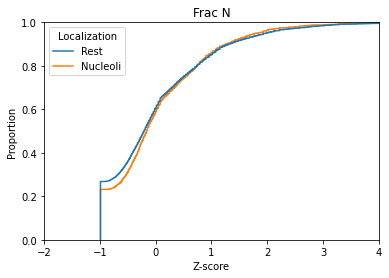

Ks_2sampResult(statistic=0.06565830691263563, pvalue=5.099513290191777e-08)
Frac P
-7.292471272033587


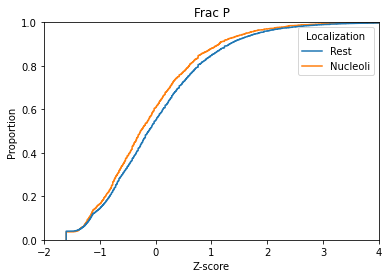

Ks_2sampResult(statistic=0.02976839812855485, pvalue=0.054970052416726985)
Frac Q
0.0
Ks_2sampResult(statistic=0.01931767104888779, pvalue=0.43557372944492473)
Frac R
0.0
Ks_2sampResult(statistic=0.04195910554262322, pvalue=0.0015846538261083754)
Frac S
-2.8000655964311214


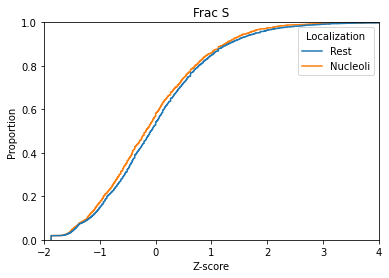

Ks_2sampResult(statistic=0.04603345268480663, pvalue=0.00037020655502462266)
Frac T
-3.4315558957240686


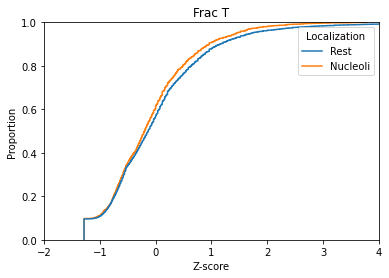

Ks_2sampResult(statistic=0.013904490558518612, pvalue=0.8278808240931522)
Frac V
0.0
Ks_2sampResult(statistic=0.026195701016984096, pvalue=0.12365607837729378)
Frac W
0.0
Ks_2sampResult(statistic=0.021676082128552654, pvalue=0.29647748952821923)
Frac Y
0.0
Ks_2sampResult(statistic=0.09006082838613216, pvalue=1.0333382310821003e-14)
Frac K+R
13.985757502440013


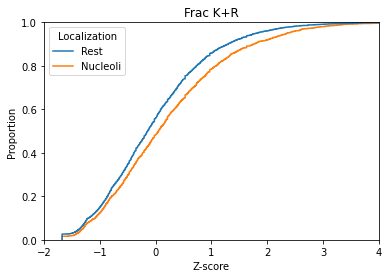

Ks_2sampResult(statistic=0.05144900742126954, pvalue=4.350637488609709e-05)
Frac D+E
4.361447102240575


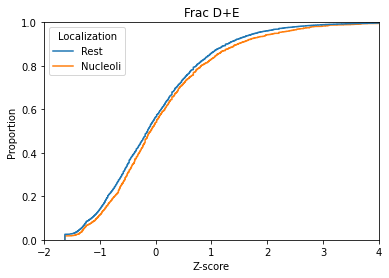

Ks_2sampResult(statistic=0.05923737967979753, pvalue=1.3185359103409701e-06)
Frac Polar
-5.879908037694172


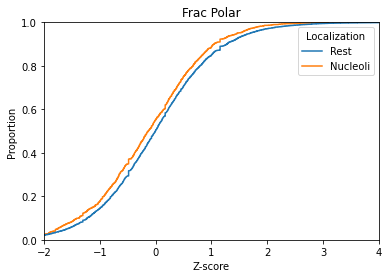

Ks_2sampResult(statistic=0.02038316428533482, pvalue=0.36849365366318987)
Frac Aliphatic
0.0
Ks_2sampResult(statistic=0.0176047128543515, pvalue=0.555931637200368)
Frac Aromatic
0.0
Ks_2sampResult(statistic=0.0955316346461017, pvalue=1.681908910316688e-16)
K/R Ratio
15.774197528643963


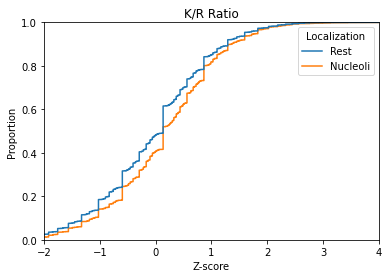

Ks_2sampResult(statistic=0.023290388385815874, pvalue=0.22129460653708807)
E/D Ratio
0.0
Ks_2sampResult(statistic=0.06619460483963507, pvalue=3.828022459879142e-08)
Frac Chain Expanding
7.417025522783136


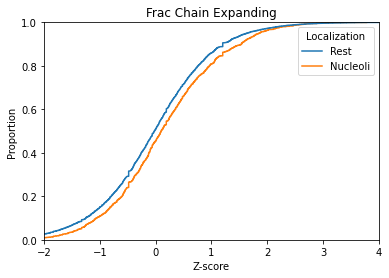

Ks_2sampResult(statistic=0.09720795299201984, pvalue=4.5362861525540765e-17)
FCR
16.343299557608212


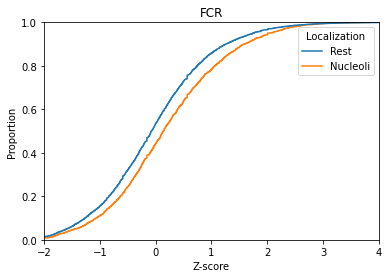

Ks_2sampResult(statistic=0.05740196672486053, pvalue=3.141803215178885e-06)
NCPR
5.502821020199395


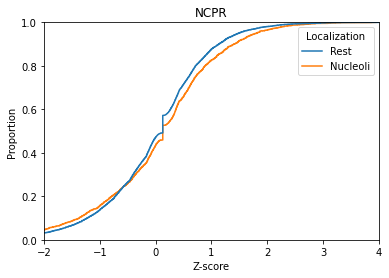

Ks_2sampResult(statistic=0.0773955534435049, pvalue=5.623453184023889e-11)
Hydrophobicity
-10.24999691606553


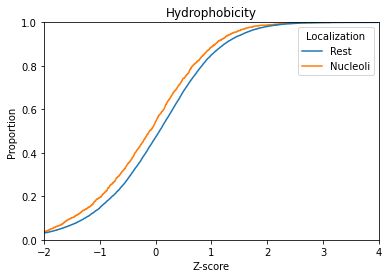

Ks_2sampResult(statistic=0.017597227942936944, pvalue=0.5564841340729536)
Disorder Promoting
0.0
Ks_2sampResult(statistic=0.03956099626343962, pvalue=0.0035017204505754396)
Iso point
2.4557185274754314


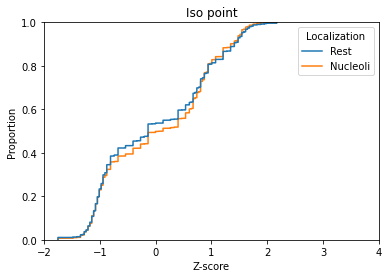

Ks_2sampResult(statistic=0.019752218446254327, pvalue=0.40740735339443257)
PPII
0.0
Ks_2sampResult(statistic=0.008370283879551077, pvalue=0.9988734525483255)
A Block
0.0
Ks_2sampResult(statistic=8.977869551551887e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.019568576547112526, pvalue=0.41917861831706)
D Block
0.0
Ks_2sampResult(statistic=0.04271848199879813, pvalue=0.001220875384032235)
E Block
2.913328662663722


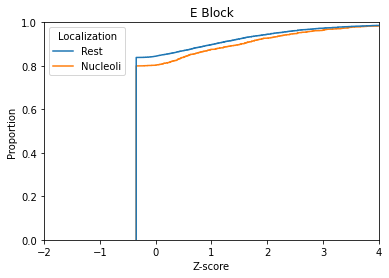

Ks_2sampResult(statistic=0.00044822949350065144, pvalue=1.0)
F Block
0.0
Ks_2sampResult(statistic=0.01729380734043251, pvalue=0.5790206082698132)
G Block
0.0
Ks_2sampResult(statistic=0.0018979683032914751, pvalue=1.0)
H Block
0.0
Ks_2sampResult(statistic=0.0003142254343044826, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.06419909123919898, pvalue=1.0997651500053757e-07)
K Block
6.958700046611007


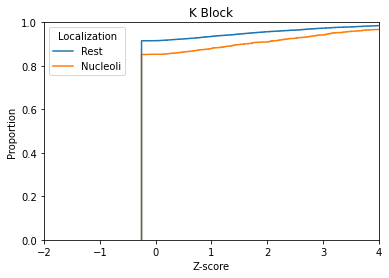

Ks_2sampResult(statistic=0.0034724153951991577, pvalue=1.0)
L Block
0.0
Ks_2sampResult(statistic=0.0006284508686088541, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.0018919924465976568, pvalue=1.0)
N Block
0.0
Ks_2sampResult(statistic=0.04108329042420067, pvalue=0.0021283450607701895)
P Block
-2.67195796009889


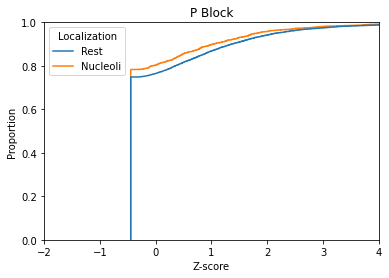

Ks_2sampResult(statistic=0.0029087733966610685, pvalue=1.0)
Q Block
0.0
Ks_2sampResult(statistic=0.004049880334978662, pvalue=0.9999999999999989)
R Block
0.0
Ks_2sampResult(statistic=0.015411895379368934, pvalue=0.7211440548561052)
S Block
0.0
Ks_2sampResult(statistic=0.01084754810901667, pvalue=0.9708329728070364)
T Block
0.0
Ks_2sampResult(statistic=0.0012602216576032, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.0007169015959701541, pvalue=1.0)
Y Block
0.0
Ks_2sampResult(statistic=0.00675796957451924, pvalue=0.9999864911479753)
RG Frac
0.0
[3.12354238e-01 8.64707302e-01 1.44532803e-05 1.88807716e-04
 1.00000000e+00 9.60667289e-01 4.82557033e-03 2.50080419e-02
 8.50946440e-01 8.43243659e-05 6.93374448e-03 1.00000000e+00
 9.87674927e-01 3.41758335e-01 6.86579810e-01 1.04036257e-07
 1.67697725e-10 1.00000000e+00 8.43525930e-01 9.86015777e-01
 9.99558999e-01 1.00607993e-04 1.00000000e+00 9.23079075e-01
 9.32339812e-01 9.19424560e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.

In [7]:
from scipy.stats import ks_2samp
import seaborn as sbn
import math
dfk = pd.DataFrame()

#Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
#This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.
#two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

myfeat=['pol-pol','pol-hyd','pol-pos','pol-neg','pol-aro','pol-ala','pol-pro','pol-gly','hyd-hyd','hyd-pos','hyd-neg','hyd-aro','hyd-ala','hyd-pro','hyd-gly','pos-pos','pos-neg','pos-aro','pos-ala','pos-pro','pos-gly','neg-neg','neg-aro','neg-ala','neg-pro','neg-gly','aro-aro','aro-ala','aro-pro','aro-gly','ala-ala','ala-pro','ala-gly','pro-pro','pro-gly','gly-gly','Frac A','Frac C','Frac D','Frac E','Frac F','Frac G','Frac H','Frac I','Frac K','Frac L','Frac M','Frac N','Frac P','Frac Q','Frac R','Frac S','Frac T','Frac V','Frac W','Frac Y','Frac K+R','Frac D+E','Frac Polar','Frac Aliphatic','Frac Aromatic','K/R Ratio','E/D Ratio','Frac Chain Expanding','FCR','NCPR','Hydrophobicity','Disorder Promoting','Iso point','PPII','A Block','C Block','D Block','E Block','F Block','G Block','H Block','I Block','K Block','L Block','M Block','N Block','P Block','Q Block','R Block','S Block','T Block','V Block','Y Block','RG Frac']

pvallks=np.zeros((len(myfeat)))
pvallkslog=np.zeros((len(myfeat)))

for p in range(0,len(myfeat)): 
    
    nnzvec=[]
    nzvec=[]
    for idx in range(0,len(fullaccs)):
        if idx in allidx_nuc:
            nzvec.append(zvecaa[idx,p])
        else:
            nnzvec.append(zvecaa[idx,p])

    if p==0:
        print(len(allidx_nuc))
        print(len(nzvec))
        print(len(fullaccs))

    tmp=ks_2samp(nnzvec, nzvec, alternative='two-sided', mode='auto')
    print(tmp)
    pvallks[p]=tmp.pvalue
    
    if tmp.pvalue<0.05 and np.mean(nzvec)>np.mean(nnzvec):
        pvallkslog[p]=-1*math.log10(tmp.pvalue)
        print(myfeat[p])
        print(pvallkslog[p])
    elif tmp.pvalue<0.05 and np.mean(nzvec)<np.mean(nnzvec):
        pvallkslog[p]=math.log10(tmp.pvalue)
        print(myfeat[p])
        print(pvallkslog[p])
    else:
        print(myfeat[p])
        print(pvallkslog[p])
        pvallkslog[p]=0

    result=[]
    if tmp.pvalue<0.05:
        for s in range(0,len(zvecaa)):
            if s in allidx_nuc:
                result.append('Nucleoli')
            else:
                result.append('Rest')
        dfk['Z-score']=zvecaa[:,p]
        dfk['Localization']=result  

        #sbn.violinplot(x="Localization", y="Z-score", data=dfk, hue='Localization')
        sbn.ecdfplot(x="Z-score", data=dfk, hue='Localization', stat="proportion")
        plt.xlim([-2, 4])
        
        plt.title(myfeat[p])
        plt.show() 
            
            
#np.savetxt("By_Condensate_Data/Nucleolarome_proteins_log_pvals.csv", pvallkslog,header="Nucleolar",comments='')
print(pvallks)
print(pvallkslog)

## Plot p-values of features that are distinct between nucleolarome and rest of proteome

['Hydrophobicity', 'Frac P', 'Frac Polar', 'Frac G', 'Frac T', 'Frac S', 'P Block', 'pol-pro', 'pro-pro', 'pol-gly', 'Frac C', 'gly-gly', 'Frac M', 'hyd-neg', 'Iso point', 'Frac D', 'E Block', 'pol-neg', 'neg-neg', 'hyd-pos', 'Frac N', 'Frac D+E', 'pol-pos', 'Frac E', 'NCPR', 'K Block', 'pos-pos', 'Frac Chain Expanding', 'pos-neg', 'Frac K+R', 'K/R Ratio', 'FCR', 'Frac K']
[-10.24999691606553, -7.292471272033587, -5.879908037694172, -5.07358671428758, -3.4315558957240686, -2.8000655964311214, -2.67195796009889, -2.3164513503162034, -2.2865625595683707, -1.6019203110289704, 1.340830402319947, 1.491824298784435, 1.753047295795541, 2.159032166774527, 2.4557185274754314, 2.7834445921868745, 2.913328662663722, 3.723980260809003, 3.9973675131205297, 4.074046915807569, 4.301700730639434, 4.361447102240575, 4.840033573972642, 5.2603498281306535, 5.502821020199395, 6.958700046611007, 6.982815280882433, 7.417025522783136, 9.775472828810871, 13.985757502440013, 15.774197528643963, 16.343299557608

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


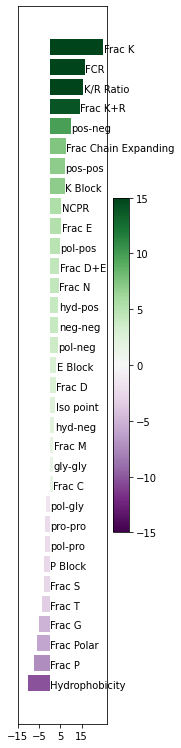

In [8]:
sigfeat=[]
sigspval=[]
for v in range(0,len(pvallkslog)):
    if pvallkslog[v]!=0:
        sigfeat.append(myfeat[v])
        sigspval.append(pvallkslog[v])
        
sort_index = np.argsort(sigspval)

ssigfeat=[]
ssigspval=[]
for s in sort_index:
    ssigfeat.append(sigfeat[s])
    ssigspval.append(sigspval[s])

print(ssigfeat)
print(ssigspval)
    
absssigspval = list(map(abs, ssigspval))

from matplotlib import cm
fig = plt.figure(figsize = (2, 0.4*len(ssigspval))) 

# If want to just use max and min of values
#colors = cm.RdBu_r((ssigspval-(-1*max(absssigspval)))/(max(absssigspval)-(-1*max(absssigspval))))
#tmp=[-1*max(absssigspval),max(absssigspval)]

# If want to set own range
minval=np.float64(-15)
maxval=np.float64(15)
colors = cm.PRGn((ssigspval-minval)/(maxval-minval))
tmp=[minval,maxval]

plot = plt.scatter(tmp, tmp, c = tmp, cmap = 'PRGn')
plt.clf()
plt.colorbar(plot)
X = np.arange(len(ssigspval))
plt.barh(X,ssigspval,color = colors)
for i, v in enumerate(ssigspval):
    if ssigspval[i]>0:
        plt.text(v + 0.25, i - 0.25, str(ssigfeat[i]), color='black')
    else:
        plt.text(0 + 0.25, i - 0.25, str(ssigfeat[i]), color='black')

plt.xticks([-15,-5,5,15])
plt.yticks([])
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

#plt.savefig('2022_06/Nucleolarome_vs_Proteome_Sig_Features_no_abundance.pdf', dpi=300, transparent=True, bbox_inches='tight')
#plt.yticks(X,ssigfeat)

## Plot clustered sequence features for the nucleolar IDRome

/home/research/kiersten.ruff/.local/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


[151, 762, 2204, 1771, 2135, 621, 1772, 705, 721, 1985, 1242, 849, 927, 1623, 734, 1238, 1216, 939, 1205, 477, 1275, 163, 1672, 277, 86, 805, 1424, 2019, 675, 1930, 1105, 915, 976, 1175, 991, 2031, 2179, 492, 1395, 804, 1931, 1057, 1387, 1884, 2047, 641, 1213, 2131, 1531, 720, 1673, 1807, 706, 719, 1543, 1900, 703, 1792, 217, 742, 415, 2147, 717, 1198, 993, 439, 1443, 1158, 1271, 685, 802, 1577, 900, 1615, 1192, 131, 1975, 427, 224, 815, 655, 234, 1373, 1374, 30, 1154, 751, 1193, 53, 732, 542, 1225, 176, 2079, 377, 1273, 424, 1026, 1561, 2074, 401, 1187, 1359, 1643, 46, 1186, 1714, 653, 1201, 241, 250, 600, 1118, 407, 1499, 58, 1291, 60, 1292, 1501, 601, 1869, 523, 781, 2072, 289, 1430, 710, 1806, 797, 1545, 148, 451, 397, 1174, 2178, 255, 735, 840, 1094, 1922, 1486, 2180, 188, 2025, 1974, 1998, 437, 1062, 934, 2063, 13, 1119, 185, 229, 59, 1500, 1407, 2013, 1541, 576, 1041, 639, 56, 1076, 753, 333, 2206, 1875, 2064, 1970, 2075, 887, 323, 1808, 656, 2148, 1245, 2089, 617, 1206, 1276, 1

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

Q9H967_1
RIIPPKMKNTSSKAESTLQNSSSAVHTESNKLQPKRTADAMNLSVDVESSQDGDSDEDTTPSLDFSGLSPYERK
Q9H967_3
DPSGVSLPAAPTPPTLVADETPLLPPGPLEMTSENQEDNNERFKG
P58397_1
PSSRRVLKPNKGTISNGKNPPTLKPVPPPTSRPRMLTTPTGPESMSTSTPAISSPSPTTASKEGDLGGKQWQDSSTQPELSSRYLISTGSTSQPILTSQSLSIQPSEENVSSSDTGPTSEGGLVATTTSGSGLSSSRNPITWPVTPFYNTLTKGPEMEIHSGSGEEREQPEDKDESNPVIWT
P58397_2
MEGLLPSQRPTTSETGTPRVEGMVTEKPANTLLPLGGDHQPEPSGKTANRNHLKLPNNMNQTKSSEPVLTEE
P41212_1
MSETPAQCSIKQERISYTPPESPVPSYASSTP
P41212_2
PEVILHQNHEEDNCVQRTPRPSVDNVHHNPPTIELLHRSRSPITTNHRPSPDPEQRPLRSPLDNMIRRLSPAERAQGPRPHQENNHQESYPLSVSPMENNHCPASSESHPKPSSPRQESTRVIQLMPSP
Q9H8W3_1
MWSGLLPPGLNESDAESNSEDEATLENSGLNLQEDKEDESIRKTEIIDFSTDEPKTETESNVNAYEECPSGIP
Q2QGD7_1
MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGPEDGGPGARPGEASGPSPPPAEDDSDGDSFLVLLEVPHGGAAAEAAGSQEAEPGSRVNLASRPEQGPSGPAAPPGPGVAPAGAV
Q9UQR0_1
MGQTVNEDSMDVKKENQEKTPQSSTSSVQRDDFHW
Q9UQR0_2
VKNIAKTESSPSEASQHSMQSPQKTTLILPTQQVRRSSRIKPPGPTAVPKRSSSVKNITPRKKGPNSGKKEKPLP
Q9UQR0_3
SQPFSSSRGHTHSSAEHDKNQSAKEDVTERQSTKRSPQQTVPYVV

HTKTDNSVASSPSSAISTATPSPKSTEQTTTNSVTSLNSPHSGLHTINGEGMEESQSPMKTDLLL
O15550_7
SSILLDKCPPPRPPSSPYPPLPKDKLNPPTP
O15550_8
SSFQESLREENEKRSHHKDHSDSESTSSDNSGRRRKGPFKT
Q7Z401_1
SQTTLSGGQSDLGYNSLSKDEVRRGDTSTEDIQEEKDKKGSDCSSLSESESTKGSADCLP
Q7Z401_2
KSTRPNTLDIGKPPLRSKRDSLEKESSDDDTPFDGSNYL
Q7Z401_4
MNNMSSPLTSRTPSIDLQRACDDKLNKKSPPLVKACRRSSLPPNSPKPVRLTKSKSYTKSEEKPRDRLWSSPAFSPTCPFREESQDTLTHSSP
Q7Z401_5
YTTSSKDQSSDRTSLSSVGAQDSESTSLTDEDV
Q5VVJ2_1
MAAEEADVDIEGDVVAAAGAQPGSGENTASV
Q5VVJ2_2
DITDEVDELSSQTPQKNSSSDLLLDFPNSK
Q5VVJ2_3
SKSSRGCLQNEKQDETLSSSEITLWTEKQSNGDKKSI
Q9GZS1_1
AGSEEDHKLGTLSLPLPPAQTSDRLAKRRKIT
Q8N7W2_1
VGKEGEKLKEEPQDLDLVWPPRLNSSAEAPQSLHPSSRGVWNELPPQSGQFSGQYGTRSRTFQSQPHPTTSSNGELPV
Q8N8D1_1
MALPPFFGQGRPGPPPPQPPPPAPFGCPPPPLPSPAFPPPLPQRPGPFPGASAPFLQPPLALQPRASAEASRGGGGAGAFYPVPPPPLPPPPPQCRPFPGTDAGERPRPPPPGPGPPWSPRWPEAPPPPADVLGDA
O14607_1
GAITDSSLPTNSVSNRQPHGALTRVSSVSQPG
O14607_2
YLQQNTHTLPHNHTDLNSSTEEPWRKQLSNSAQGLHKSQSSCLSGPNEEQPLFSTGSAQYHQATSTGIKKANEHLTLPSNSVPQGDADSHLSCHTATSGGQQGIMFTKESKPSKNRSLVPET

294
[1, 4, 6, 7, 28, 32, 33, 34, 35, 47, 54, 66, 67, 99, 100, 101, 102, 116, 119, 121, 134, 145, 152, 165, 167, 179, 180, 181, 183, 186, 189, 191, 200, 202, 206, 225, 227, 230, 240, 256, 264, 265, 280, 281, 284, 286, 304, 308, 311, 341, 346, 351, 354, 378, 379, 389, 402, 411, 414, 425, 431, 435, 443, 450, 459, 475, 486, 490, 503, 524, 554, 557, 559, 575, 581, 583, 584, 589, 595, 602, 609, 620, 624, 642, 650, 654, 669, 672, 681, 696, 697, 698, 701, 708, 712, 722, 724, 730, 733, 748, 749, 754, 755, 756, 776, 792, 836, 837, 839, 845, 859, 867, 871, 878, 879, 896, 905, 906, 917, 918, 921, 942, 944, 946, 951, 965, 975, 990, 1011, 1029, 1031, 1033, 1035, 1049, 1066, 1068, 1102, 1108, 1115, 1130, 1132, 1144, 1151, 1160, 1170, 1171, 1172, 1173, 1179, 1182, 1208, 1212, 1219, 1228, 1229, 1246, 1254, 1260, 1265, 1274, 1277, 1283, 1289, 1295, 1308, 1309, 1311, 1312, 1318, 1319, 1321, 1331, 1337, 1344, 1345, 1347, 1348, 1354, 1356, 1357, 1371, 1391, 1393, 1399, 1403, 1404, 1410, 1411, 1419, 1427, 1

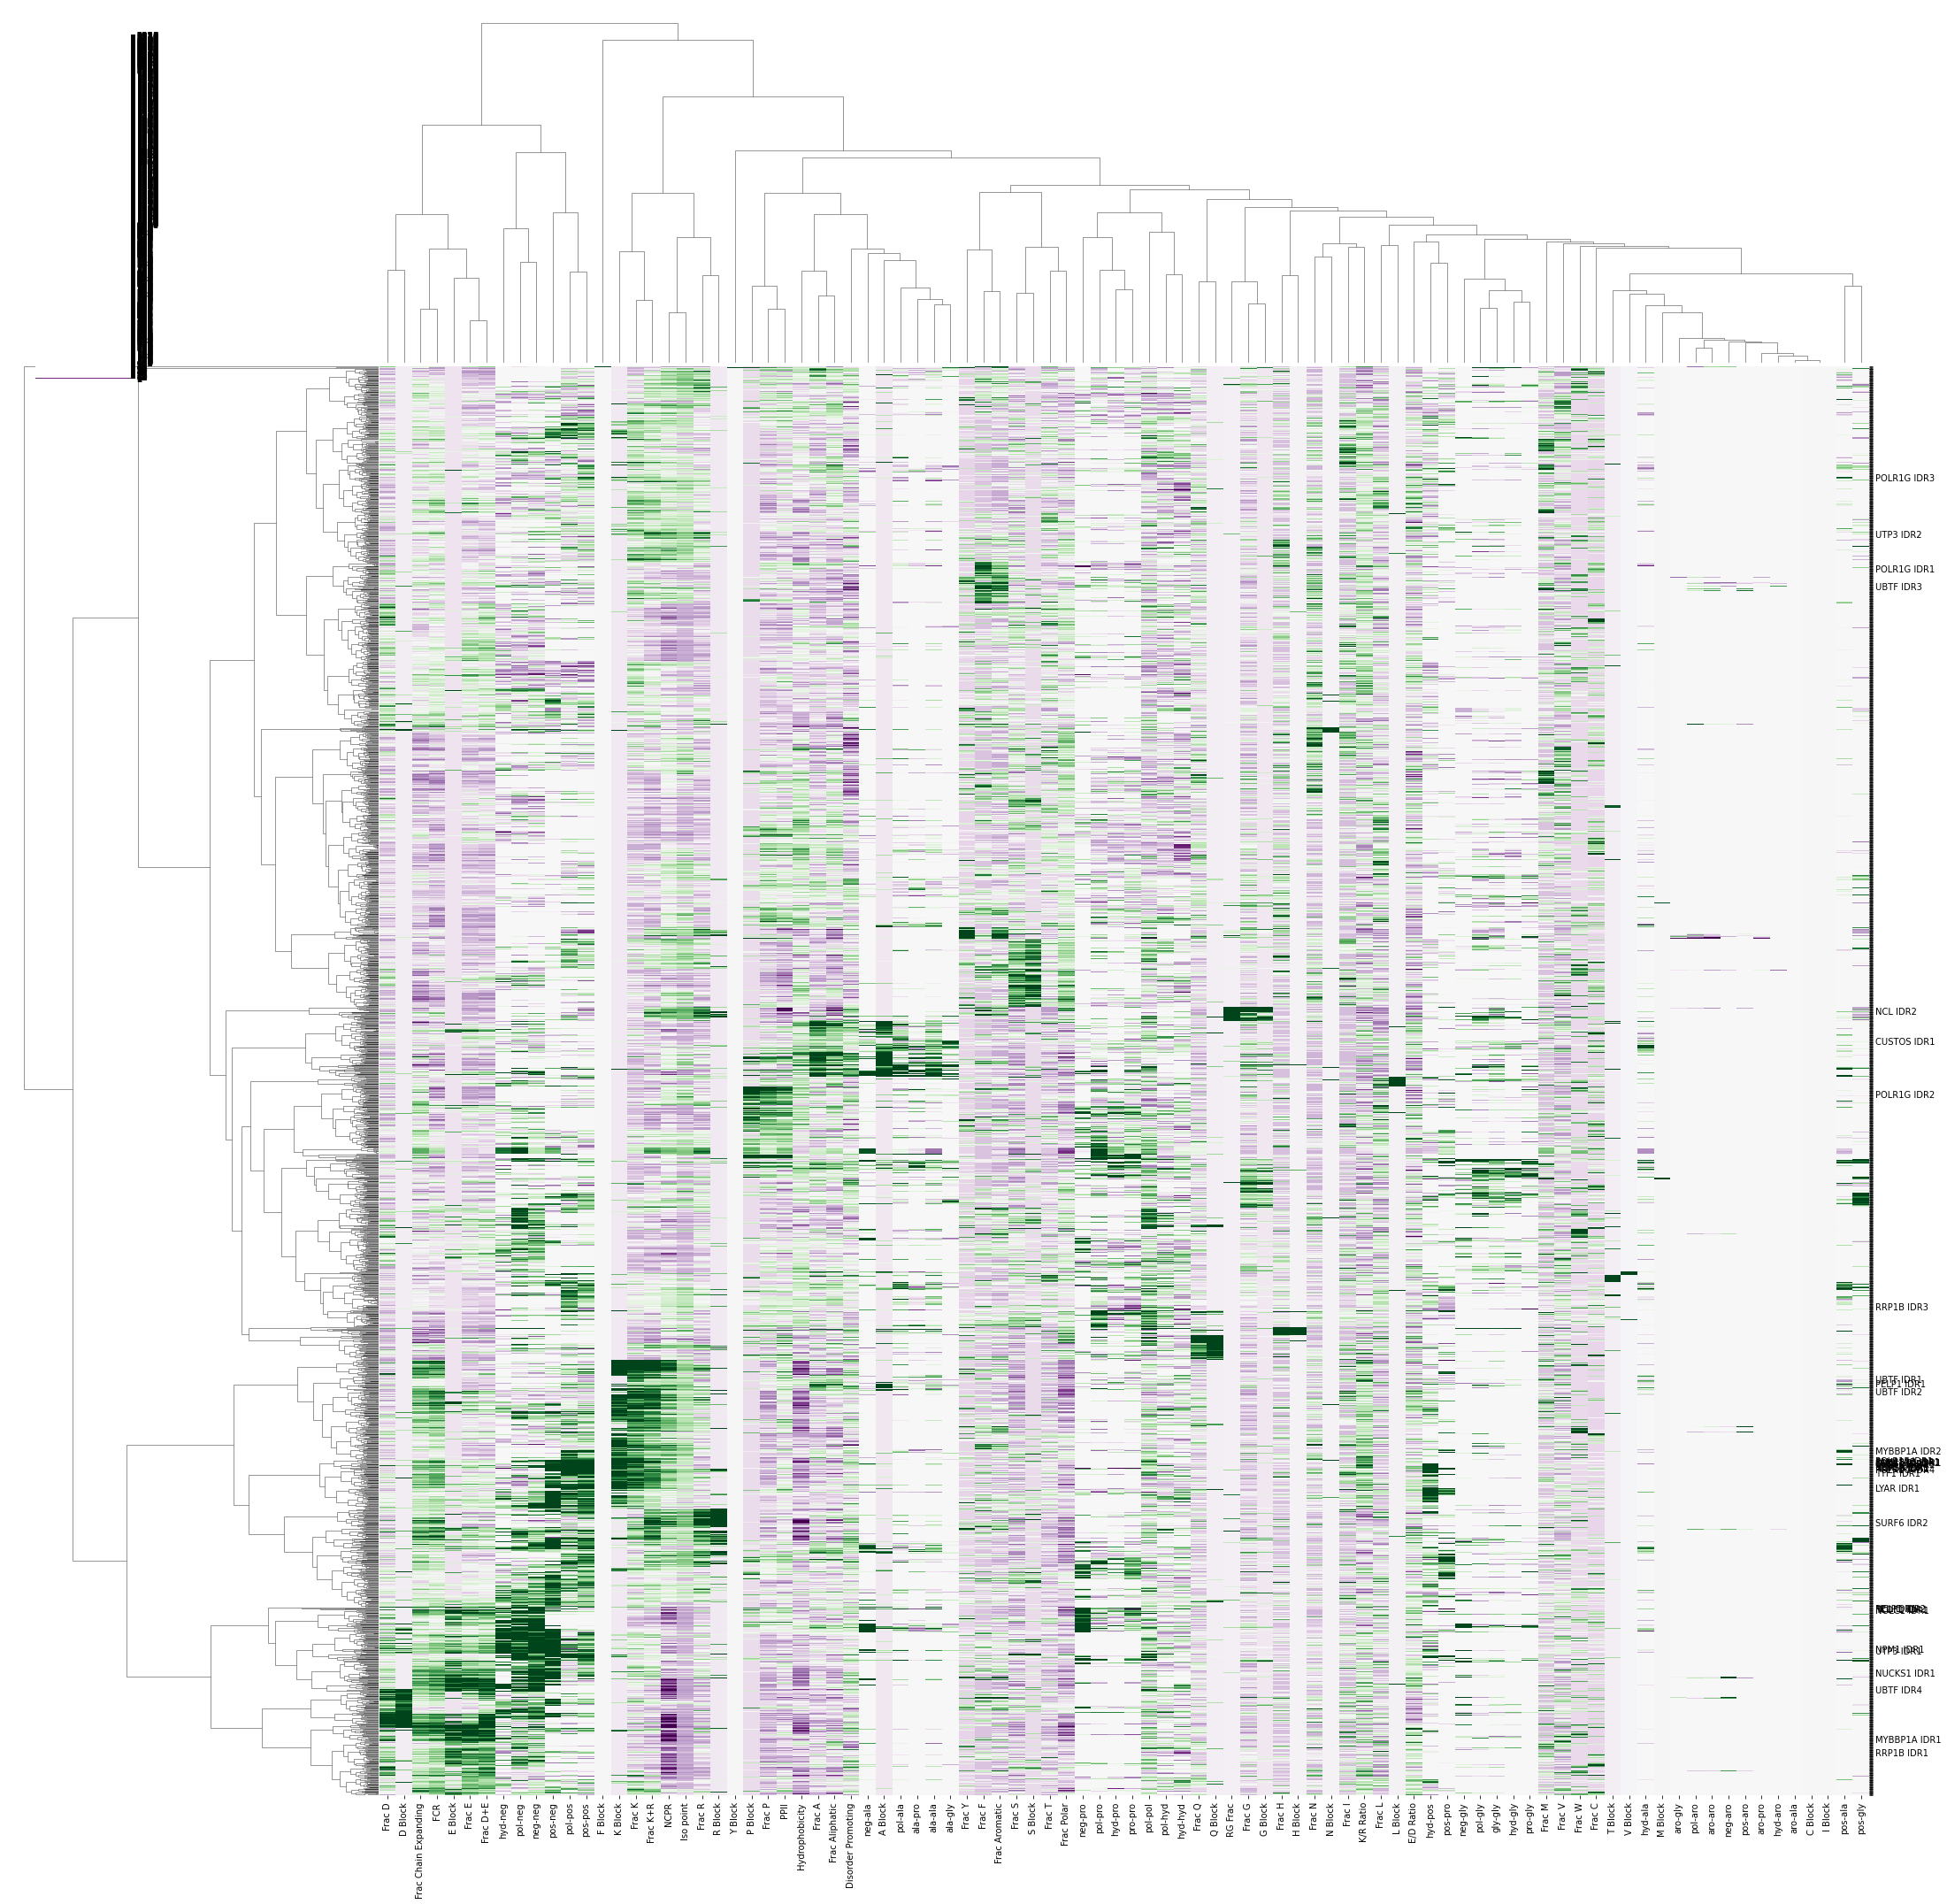

In [9]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import scipy
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


df2 = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)
#df2.to_excel("nucleolar_idrome_length_gte_30_all_features.xlsx")

clust_map = sbn.clustermap(df2, metric="euclidean", method="ward",cmap='PRGn',figsize=(30, 30),vmin=-3,vmax=3,yticklabels=1) 
#clust_map = sbn.clustermap(df2, metric="euclidean", method="ward",cmap='bwr',figsize=(30, 20),vmin=-3,vmax=3)  

curracc=[]
curraccwnums=[]
currseqs=[]
for i in allidx_nuc:
    curracc.append(fullaccs[i])
    curraccwnums.append(fullaccswnums[i])
    currseqs.append(myseqs[i])

rowindex=clust_map.dendrogram_row.reordered_ind
print(rowindex)


mydictsublist={'P19338':"NCL",
'P17480':"UBF",
'P06748':"NPM1",
'Q9NX58':"LYAR",
'Q9H1E3':"NUCKS",
'Q3B726':"POLR1F",
'O15446':"POLR1G",
'Q8IZL8':"PELP1",
'Q96C57':"CUSTOS",
'Q8N9E0':"FAM133A",
'Q5BKY9':"FAM133B",
'Q15361':"TTF1",
'Q8N9Q2':"SREK1IP1",
'Q9BQG0':"MYBBP1A",
'Q13428':"TCOF1",
'Q14978':"NOLC1/Nopp140",
'O00567':"Nop56",
'Q9Y2X3':"Nop58",
'Q9NQZ2':"UTP3",
'O75683':"SURF6",
'Q14684':"RRP1B"}

subacclist=['P19338','P17480','P06748','Q9NX58','Q9H1E3','Q3B726','O15446','Q8IZL8','Q96C57','Q8N9E0','Q5BKY9','Q15361','Q8N9Q2','Q9BQG0','Q13428','Q14978','O00567','Q9Y2X3','Q9NQZ2','O75683','Q14684']
sseqlabels=[]
for i in rowindex:
    if curracc[i] in subacclist:
        print(curracc[i])
        sseqlabels.append(genenameswnums_nuc[i])
    else:
        sseqlabels.append('')
        
plt.yticks(np.arange(0,len(sseqlabels),1.0))
plt.setp(clust_map.ax_heatmap.get_yticklabels(),rotation=0)
plt.setp(clust_map.ax_heatmap.set_yticklabels(sseqlabels))

colindex=clust_map.dendrogram_col.reordered_ind
print(colindex)

clusters = scipy.cluster.hierarchy.fcluster(clust_map.dendrogram_row.linkage, 90, 'distance')
numclust=max(clusters)
print(clusters)
print(numclust)

acclistbyclust=[]
for c in range(1,numclust+1):
    print('Cluster_'+str(c))
    pos=[i for i, ltr in enumerate(clusters) if ltr == c]
    print(len(pos))
    print(pos)

    acclist=[]
    seqlist=[]
    for p in pos: 
        acclist.append(curraccwnums[p])
        seqlist.append(currseqs[p])
        #print(p)
        print(curraccwnums[p])
        print(currseqs[p])
    
    acclistbyclust.append(acclist)
    currdf=pd.DataFrame()
    currdf['Uniprot']=acclist
    currdf['Sequences']=seqlist
    
    #if c==1:
    #    with pd.ExcelWriter('nucleolar_IDR_clusters.xlsx') as writer:  
    #        currdf.to_excel(writer, sheet_name='cluster_'+str(c))
    #else:
    #    with pd.ExcelWriter('nucleolar_IDR_clusters.xlsx',engine="openpyxl",mode='a') as writer:  
    #        currdf.to_excel(writer, sheet_name='cluster_'+str(c))

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/nucleoarome_clustered_sequence_features_IDRs_gte_30.pdf", transparent=True, bbox_inches = "tight") 


print(clust_map)
print(acclistbyclust)

df3 = pd.DataFrame()
df3['Gene']=genenameswnums_nuc
df3['Accession']=curraccwnums
dfconcat = pd.concat([df3, df2], axis=1)
print(dfconcat)

#dfconcat.to_csv('../full_nucleolus_evolution/By_Species_Data/sapiens_all_zscores.tsv', sep="\t")

## Get distinct sequence features of each cluster compared to the rest of the IDRome

Cluster_1
2
2
24506
Ks_2sampResult(statistic=0.5559862890720639, pvalue=0.566665242704775)
pol-pol
0.0
Ks_2sampResult(statistic=0.474128784787399, pvalue=0.7596264060886309)
pol-hyd
0.0
Ks_2sampResult(statistic=0.33759079409124293, pvalue=0.9765907365251166)
pol-pos
0.0
Ks_2sampResult(statistic=0.3794580918958622, pvalue=0.9356204368586111)
pol-neg
0.0
Ks_2sampResult(statistic=0.49726597567942543, pvalue=0.7058823419308713)
pol-aro
0.0
Ks_2sampResult(statistic=0.3994123888027422, pvalue=0.9071542103927408)
pol-ala
0.0
Ks_2sampResult(statistic=0.4287929486656329, pvalue=0.8557236756127062)
pol-pro
0.0
Ks_2sampResult(statistic=0.9882885823879867, pvalue=0.040219657212554216)
pol-gly
1.3955616351647013


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


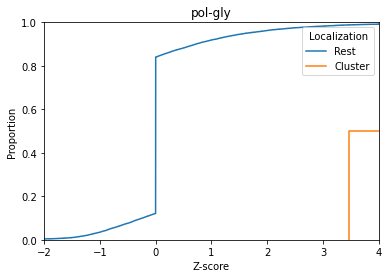

Ks_2sampResult(statistic=0.37733616257243124, pvalue=0.9383124246045956)
hyd-hyd
0.0
Ks_2sampResult(statistic=0.22227209662939684, pvalue=0.9999698815698949)
hyd-pos
0.0
Ks_2sampResult(statistic=0.23859462988655838, pvalue=0.9998539009524487)
hyd-neg
0.0
Ks_2sampResult(statistic=0.0020811229902880928, pvalue=1.0)
hyd-aro
0.0
Ks_2sampResult(statistic=0.4657226801599608, pvalue=0.7785661252757541)
hyd-ala
0.0
Ks_2sampResult(statistic=0.4517261078919448, pvalue=0.8091181624174029)
hyd-pro
0.0
Ks_2sampResult(statistic=0.4939606626948503, pvalue=0.7136687008506142)
hyd-gly
0.0
Ks_2sampResult(statistic=0.342650779400963, pvalue=0.9729701416277342)
pos-pos
0.0
Ks_2sampResult(statistic=0.24071655920998936, pvalue=0.9998248505894828)
pos-neg
0.0
Ks_2sampResult(statistic=0.4971027503468538, pvalue=0.706267480365464)
pos-aro
0.0
Ks_2sampResult(statistic=0.08455072227209659, pvalue=1.0)
pos-ala
0.0
Ks_2sampResult(statistic=0.15775728393046606, pvalue=0.9999999998070528)
pos-pro
0.0
Ks_2sampResult(

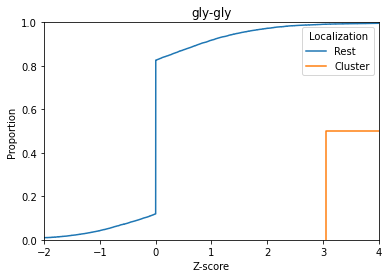

Ks_2sampResult(statistic=0.4436872602627928, pvalue=0.8259977141386659)
Frac A
0.0
Ks_2sampResult(statistic=0.39043499551130334, pvalue=0.9206555097277594)
Frac C
0.0
Ks_2sampResult(statistic=0.4386680812862156, pvalue=0.8362528085762151)
Frac D
0.0
Ks_2sampResult(statistic=0.9030033461193178, pvalue=0.07666552439149933)
Frac E
0.0
Ks_2sampResult(statistic=0.5521096874234881, pvalue=0.575723991195689)
Frac F
0.0
Ks_2sampResult(statistic=0.8397943360809598, pvalue=0.11909282959618556)
Frac G
0.0
Ks_2sampResult(statistic=0.501673059658859, pvalue=0.6954618177922928)
Frac H
0.0
Ks_2sampResult(statistic=0.4610299518485269, pvalue=0.7889583340434823)
Frac I
0.0
Ks_2sampResult(statistic=0.8436709377295356, pvalue=0.11602629181952909)
Frac K
0.0
Ks_2sampResult(statistic=0.42911939933077614, pvalue=0.8550958733754691)
Frac L
0.0
Ks_2sampResult(statistic=0.5010609646617155, pvalue=0.6969114594834497)
Frac M
0.0
Ks_2sampResult(statistic=0.7354933485676978, pvalue=0.22946690959922214)
Frac N
0.0


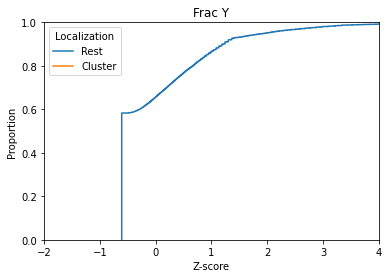

Ks_2sampResult(statistic=0.3859871051987268, pvalue=0.9269275112151237)
Frac K+R
0.0
Ks_2sampResult(statistic=0.7237411246225414, pvalue=0.24567340330242912)
Frac D+E
0.0
Ks_2sampResult(statistic=0.3470578633803966, pvalue=0.9695295692306642)
Frac Polar
0.0
Ks_2sampResult(statistic=0.49840855300742676, pvalue=0.7031846708435499)
Frac Aliphatic
0.0
Ks_2sampResult(statistic=0.9727821757936832, pvalue=0.04542120180539833)
Frac Aromatic
1.342741378910917


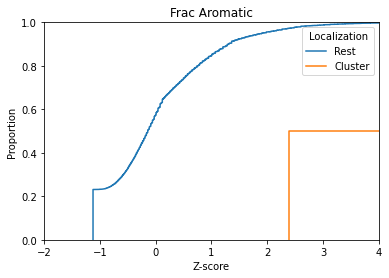

Ks_2sampResult(statistic=0.8890067738513017, pvalue=0.08475393249371704)
K/R Ratio
0.0
Ks_2sampResult(statistic=0.8585652493266955, pvalue=0.10484277025984907)
E/D Ratio
0.0
Ks_2sampResult(statistic=0.5086101362931528, pvalue=0.6789901657803541)
Frac Chain Expanding
0.0
Ks_2sampResult(statistic=0.4161021790581898, pvalue=0.8792176272680928)
FCR
0.0
Ks_2sampResult(statistic=0.4886966457194157, pvalue=0.7260070154830099)
NCPR
0.0
Ks_2sampResult(statistic=0.443605647596507, pvalue=0.8261662766635545)
Hydrophobicity
0.0
Ks_2sampResult(statistic=0.4797600587611197, pvalue=0.7467362872088563)
Disorder Promoting
0.0
Ks_2sampResult(statistic=0.47290459479311187, pvalue=0.7624083489053122)
Iso point
0.0
Ks_2sampResult(statistic=0.4825756957479801, pvalue=0.7402384369414772)
PPII
0.0
Ks_2sampResult(statistic=0.10540275850812042, pvalue=1.0)
A Block
0.0
Ks_2sampResult(statistic=8.161266628581298e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.04868195543948417, pvalue=1.0)
D Block
0.0
Ks_

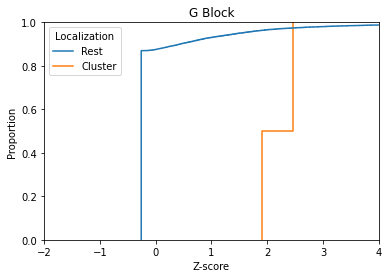

Ks_2sampResult(statistic=0.010487227617726247, pvalue=1.0)
H Block
0.0
Ks_2sampResult(statistic=0.00028564433200028994, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.09054925324410346, pvalue=1.0)
K Block
0.0
Ks_2sampResult(statistic=0.01391495960173017, pvalue=1.0)
L Block
0.0
Ks_2sampResult(statistic=0.0010609646617154578, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.008650942626295621, pvalue=1.0)
N Block
0.0
Ks_2sampResult(statistic=0.47339427079082674, pvalue=0.761296486236195)
P Block
0.0
Ks_2sampResult(statistic=0.04313229413204933, pvalue=1.0)
Q Block
0.0
Ks_2sampResult(statistic=0.4801273157594058, pvalue=0.745890629842582)
R Block
0.0
Ks_2sampResult(statistic=0.337141924426671, pvalue=0.9768952282134543)
S Block
0.0
Ks_2sampResult(statistic=0.03639924916347015, pvalue=1.0)
T Block
0.0
Ks_2sampResult(statistic=0.004325471313147755, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.9998367746674284, pvalue=0.036690882784865736)
Y Block
1.4354418389667645


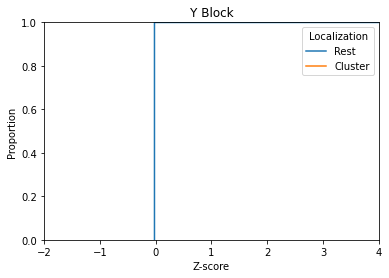

Ks_2sampResult(statistic=0.4795152207622623, pvalue=0.7472997349665262)
RG Frac
0.0
Cluster_2
1548
1548
22960
Ks_2sampResult(statistic=0.029845523953578312, pvalue=0.15094012553164618)
pol-pol
0.0
Ks_2sampResult(statistic=0.021122230325293256, pvalue=0.5370448277034421)
pol-hyd
0.0
Ks_2sampResult(statistic=0.042532907471931836, pvalue=0.010526053541316967)
pol-pos
-1.9777344252517286


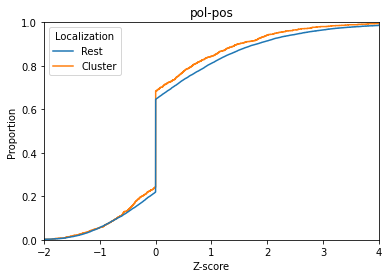

Ks_2sampResult(statistic=0.058210661840837674, pvalue=0.00010782904604425119)
pol-neg
-3.96726423694529


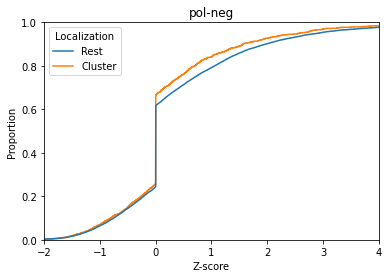

Ks_2sampResult(statistic=0.002374199821732436, pvalue=1.0)
pol-aro
0.0
Ks_2sampResult(statistic=0.01639937786421053, pvalue=0.8302516065853691)
pol-ala
0.0
Ks_2sampResult(statistic=0.0276009732688689, pvalue=0.2191988640072741)
pol-pro
0.0
Ks_2sampResult(statistic=0.00712901439645619, pvalue=0.9999995035025823)
pol-gly
0.0
Ks_2sampResult(statistic=0.03692760806345602, pvalue=0.038309799242912126)
hyd-hyd
-1.4166901238698044


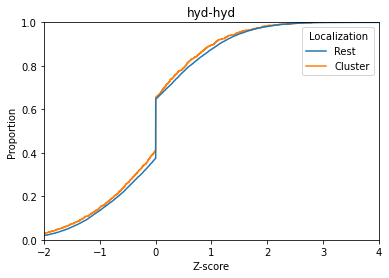

Ks_2sampResult(statistic=0.038291062312616475, pvalue=0.02845284279313916)
hyd-pos
-1.5458743356768168


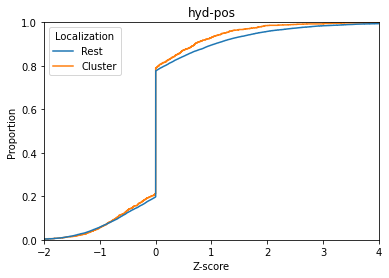

Ks_2sampResult(statistic=0.047135001665631227, pvalue=0.00318023342328588)
hyd-neg
-2.497541002429226


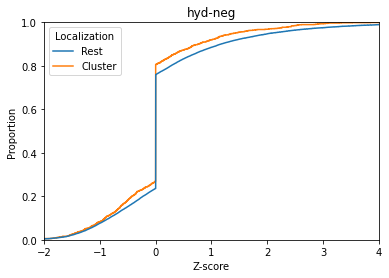

Ks_2sampResult(statistic=0.0014881515094220532, pvalue=1.0)
hyd-aro
0.0
Ks_2sampResult(statistic=0.0207601806084506, pvalue=0.5595339909795989)
hyd-ala
0.0
Ks_2sampResult(statistic=0.0337138400453772, pvalue=0.07400530331562795)
hyd-pro
0.0
Ks_2sampResult(statistic=0.009806516669817855, pvalue=0.9990337186124785)
hyd-gly
0.0
Ks_2sampResult(statistic=0.05690494197300777, pvalue=0.00016675232105986223)
pos-pos
-3.7779281123351023


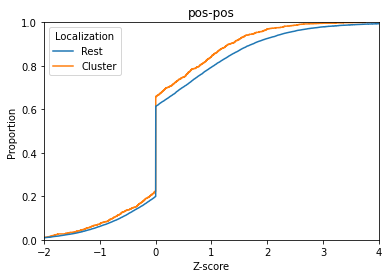

Ks_2sampResult(statistic=0.06271416866992585, pvalue=2.2220264919380494e-05)
pos-neg
-4.653250767522098


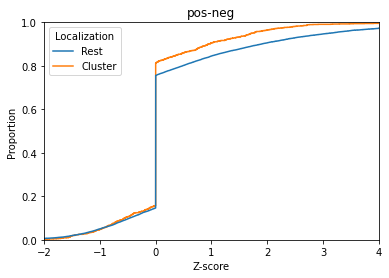

Ks_2sampResult(statistic=0.0012411203846257601, pvalue=1.0)
pos-aro
0.0
Ks_2sampResult(statistic=0.009524259694424164, pvalue=0.9994156031910313)
pos-ala
0.0
Ks_2sampResult(statistic=0.03130677776877444, pvalue=0.11650506794091371)
pos-pro
0.0
Ks_2sampResult(statistic=0.009900827413589774, pvalue=0.9988681525768635)
pos-gly
0.0
Ks_2sampResult(statistic=0.08072774581566411, pvalue=1.2357815340872104e-08)
neg-neg
-7.908058298605131


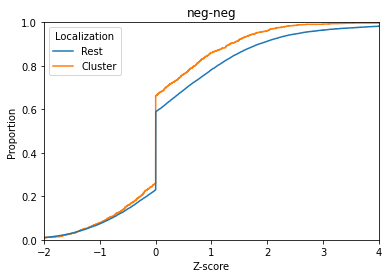

Ks_2sampResult(statistic=0.0021198534244478706, pvalue=1.0)
neg-aro
0.0
Ks_2sampResult(statistic=0.009160071667161818, pvalue=0.9997159825023414)
neg-ala
0.0
Ks_2sampResult(statistic=0.030542388065076587, pvalue=0.1336144146142179)
neg-pro
0.0
Ks_2sampResult(statistic=0.01973536720417035, pvalue=0.6245442206356281)
neg-gly
0.0
Ks_2sampResult(statistic=0.0025906193447316535, pvalue=1.0)
aro-aro
0.0
Ks_2sampResult(statistic=0.0007041793839865309, pvalue=1.0)
aro-ala
0.0
Ks_2sampResult(statistic=0.0035714285714285587, pvalue=1.0)
aro-pro
0.0
Ks_2sampResult(statistic=0.0021923308934086016, pvalue=1.0)
aro-gly
0.0
Ks_2sampResult(statistic=0.017064955117989777, pvalue=0.7922232641385478)
ala-ala
0.0
Ks_2sampResult(statistic=0.014959844781172071, pvalue=0.9016882155703625)
ala-pro
0.0
Ks_2sampResult(statistic=0.008400633840225446, pvalue=0.9999544131327214)
ala-gly
0.0
Ks_2sampResult(statistic=0.0319744933329732, pvalue=0.1030733074533872)
pro-pro
0.0
Ks_2sampResult(statistic=0.00679386237383

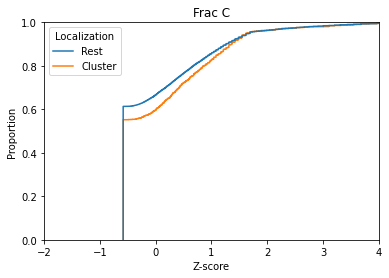

Ks_2sampResult(statistic=0.053445155714015646, pvalue=0.0005046498486211086)
Frac D
-3.2970098526852407


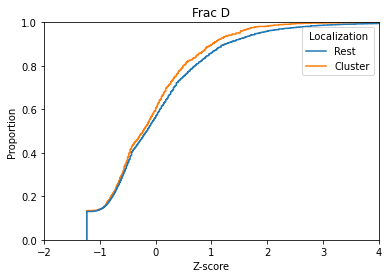

Ks_2sampResult(statistic=0.08962469275855545, pvalue=1.523343865196739e-10)
Frac E
-9.817202052080217


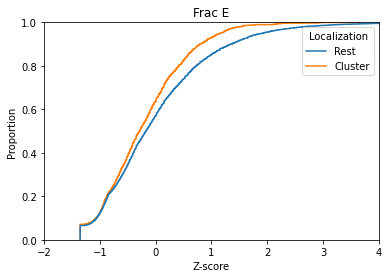

Ks_2sampResult(statistic=0.02914449576389455, pvalue=0.1701432726532353)
Frac F
0.0
Ks_2sampResult(statistic=0.03831919797603292, pvalue=0.028275516083754833)
Frac G
1.548589459602101


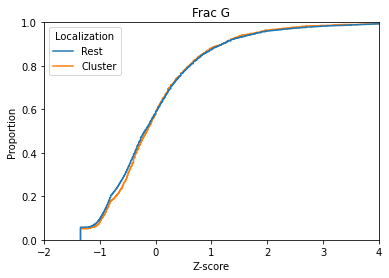

Ks_2sampResult(statistic=0.052547853136338696, pvalue=0.0006649554009438283)
Frac H
3.1772074821758873


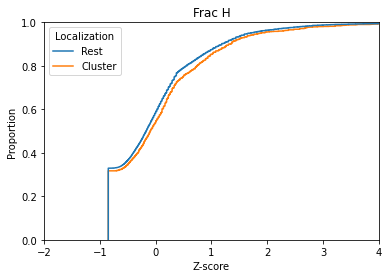

Ks_2sampResult(statistic=0.018247665865362972, pvalue=0.7197011577433445)
Frac I
0.0
Ks_2sampResult(statistic=0.03871827422593166, pvalue=0.02586332895037771)
Frac K
-1.5873155764497315


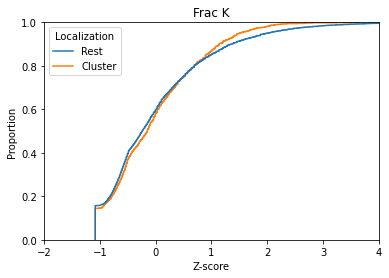

Ks_2sampResult(statistic=0.034880119565315226, pvalue=0.05868165606655271)
Frac L
0.0
Ks_2sampResult(statistic=0.030725382419937164, pvalue=0.12934290811480756)
Frac M
0.0
Ks_2sampResult(statistic=0.05246614716977732, pvalue=0.0006817115310822143)
Frac N
3.166399359891786


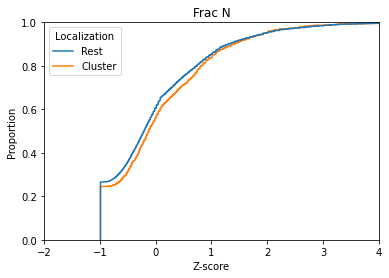

Ks_2sampResult(statistic=0.040178402614590936, pvalue=0.018517163177543105)
Frac P
1.7324255463099467


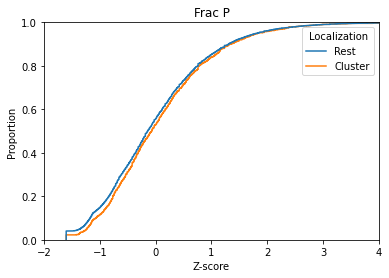

Ks_2sampResult(statistic=0.04944201352312527, pvalue=0.0016664946977771157)
Frac Q
2.778196063779511


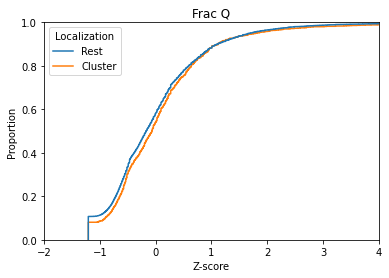

Ks_2sampResult(statistic=0.04650363737856644, pvalue=0.0037751091718926473)
Frac R
-2.423070484547379


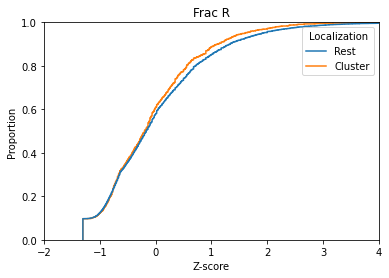

Ks_2sampResult(statistic=0.036971274613078364, pvalue=0.03795291957882683)
Frac S
1.4207548098026752


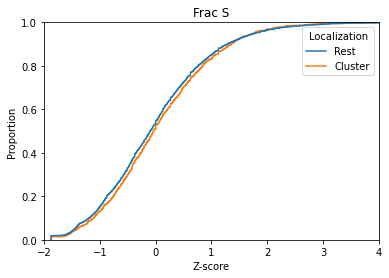

Ks_2sampResult(statistic=0.04187408277737259, pvalue=0.012368408735189332)
Frac T
1.9076861711857624


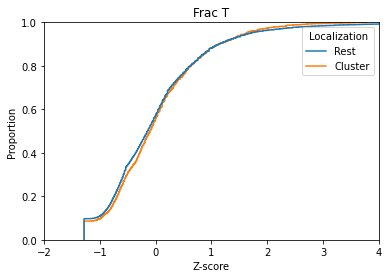

Ks_2sampResult(statistic=0.026098303757123964, pvalue=0.27662833535393355)
Frac V
0.0
Ks_2sampResult(statistic=0.026234705453366813, pvalue=0.27100346119649577)
Frac W
0.0
Ks_2sampResult(statistic=0.014033843826810388, pvalue=0.9375816209457057)
Frac Y
0.0
Ks_2sampResult(statistic=0.03776672608918785, pvalue=0.031941825434218966)
Frac K+R
-1.495640268117546


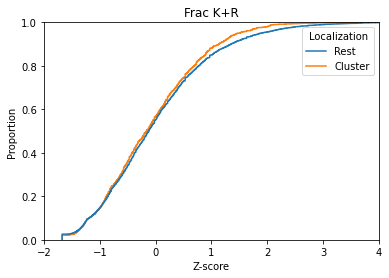

Ks_2sampResult(statistic=0.09920331055470022, pvalue=8.025239878826639e-13)
Frac D+E
-12.095541977428542


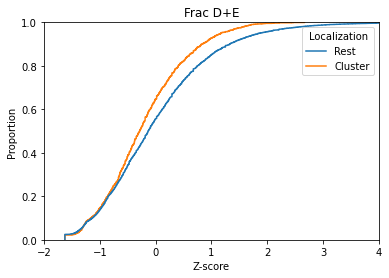

Ks_2sampResult(statistic=0.09370492666720681, pvalue=1.7399876026031547e-11)
Frac Polar
10.75945384605086


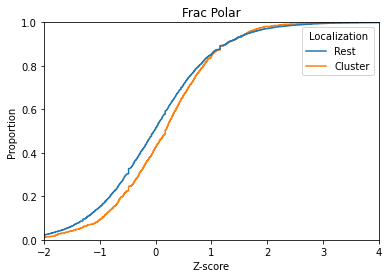

Ks_2sampResult(statistic=0.04415588508044549, pvalue=0.00699907604804556)
Frac Aliphatic
2.1549592876600214


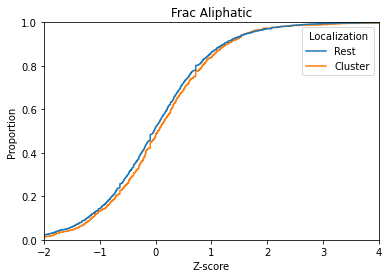

Ks_2sampResult(statistic=0.015403487921922476, pvalue=0.8815220813548185)
Frac Aromatic
0.0
Ks_2sampResult(statistic=0.039142897658212494, pvalue=0.02349841527711432)
K/R Ratio
1.6289614253712958


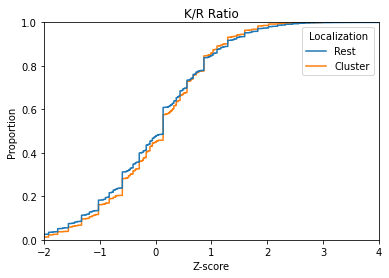

Ks_2sampResult(statistic=0.045865520532281656, pvalue=0.0044789487827555045)
E/D Ratio
-2.3488239037294223


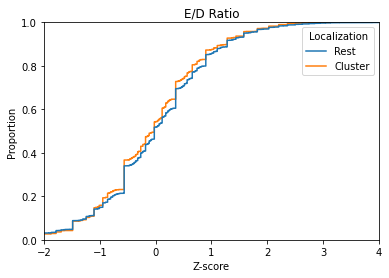

Ks_2sampResult(statistic=0.12250954361703081, pvalue=2.485928145517539e-19)
Frac Chain Expanding
-18.604511428572984


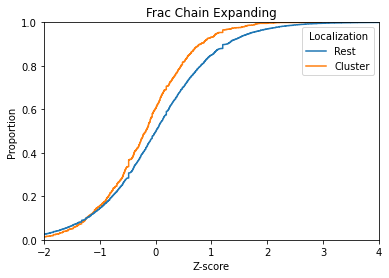

Ks_2sampResult(statistic=0.10592357003304254, pvalue=1.47239920071768e-14)
FCR
-13.831974426979238


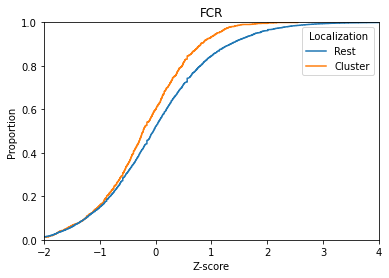

Ks_2sampResult(statistic=0.05987257920751965, pvalue=6.102905102468631e-05)
NCPR
4.214463383082018


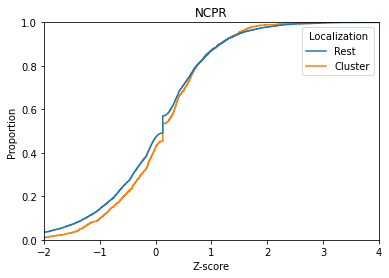

Ks_2sampResult(statistic=0.08909585482898019, pvalue=2.0037918075724446e-10)
Hydrophobicity
9.698147403323464


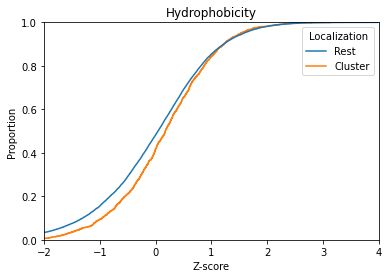

Ks_2sampResult(statistic=0.0732783224842215, pvalue=3.4441430009475983e-07)
Disorder Promoting
-6.462918824920723


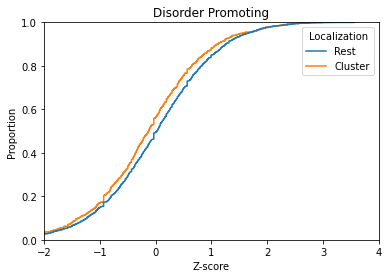

Ks_2sampResult(statistic=0.060890977680540914, pvalue=4.2718721822378155e-05)
Iso point
4.369381750216218


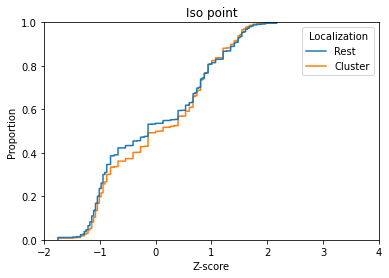

Ks_2sampResult(statistic=0.02227534235475248, pvalue=0.4679280968714833)
PPII
0.0
Ks_2sampResult(statistic=0.015589858556392833, pvalue=0.8725261210779478)
A Block
0.0
Ks_2sampResult(statistic=8.710801393729817e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.031273465143289325, pvalue=0.11721123684235543)
D Block
0.0
Ks_2sampResult(statistic=0.09691408043648542, pvalue=2.9511206277908993e-12)
E Block
-11.530013038242076


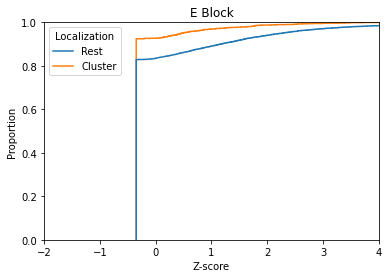

Ks_2sampResult(statistic=0.00021777003484324542, pvalue=1.0)
F Block
0.0
Ks_2sampResult(statistic=0.006812431911694561, pvalue=0.9999998942437054)
G Block
0.0
Ks_2sampResult(statistic=0.0035850462325220933, pvalue=1.0)
H Block
0.0
Ks_2sampResult(statistic=0.00030487804878043256, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.0463092762156857, pvalue=0.003977888388595852)
K Block
-2.400347406454657


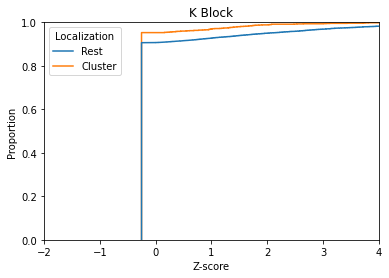

Ks_2sampResult(statistic=0.003664838973971074, pvalue=1.0)
L Block
0.0
Ks_2sampResult(statistic=0.0009362423358453276, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.0022857412959511603, pvalue=1.0)
N Block
0.0
Ks_2sampResult(statistic=0.01628143316316888, pvalue=0.8367078713162367)
P Block
0.0
Ks_2sampResult(statistic=0.009819233989682097, pvalue=0.9990126171501823)
Q Block
0.0
Ks_2sampResult(statistic=0.036473723541222136, pvalue=0.042196355967544105)
R Block
-1.374725052628862


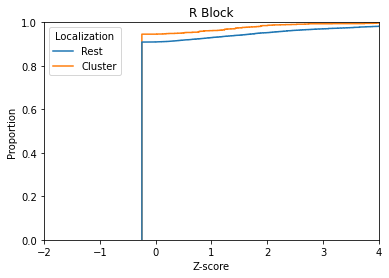

Ks_2sampResult(statistic=0.022868779767531877, pvalue=0.43415960507848894)
S Block
0.0
Ks_2sampResult(statistic=0.006279767531894631, pvalue=0.9999999955137057)
T Block
0.0
Ks_2sampResult(statistic=0.0011324041811846541, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.0006533101045296252, pvalue=1.0)
Y Block
0.0
Ks_2sampResult(statistic=0.004183210436755513, pvalue=1.0)
RG Frac
0.0
Cluster_3
386
386
24122
Ks_2sampResult(statistic=0.08467814516278005, pvalue=0.008606753294291346)
pol-pol
2.0651606455603635


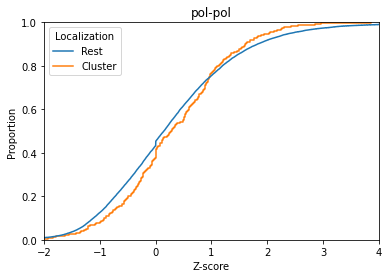

Ks_2sampResult(statistic=0.05716987867803261, pvalue=0.1668108313350208)
pol-hyd
0.0
Ks_2sampResult(statistic=0.43672643337645045, pvalue=2.2968649186780744e-63)
pol-pos
62.6388645454222


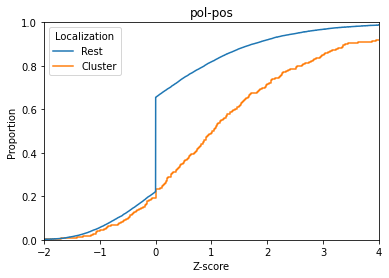

Ks_2sampResult(statistic=0.09628494702876955, pvalue=0.0017446867805021194)
pol-neg
2.7582825295697586


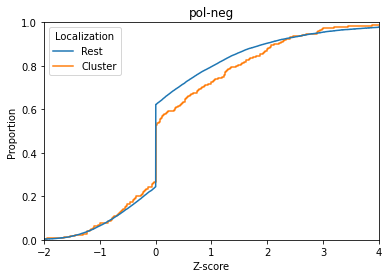

Ks_2sampResult(statistic=0.0069027349316277825, pvalue=1.0)
pol-aro
0.0
Ks_2sampResult(statistic=0.03514131317787431, pvalue=0.7361071913303322)
pol-ala
0.0
Ks_2sampResult(statistic=0.12156748102156012, pvalue=2.655534970501704e-05)
pol-pro
-4.57584797502213


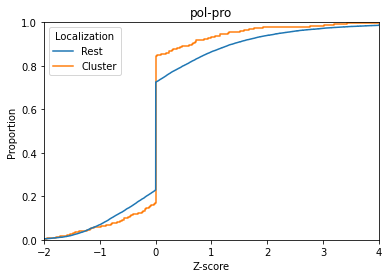

Ks_2sampResult(statistic=0.08959464690070718, pvalue=0.004488443344753596)
pol-gly
-2.347904252315486


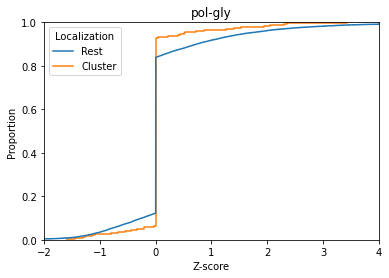

Ks_2sampResult(statistic=0.06914548798357914, pvalue=0.052879151695003505)
hyd-hyd
0.0
Ks_2sampResult(statistic=0.30556909973609975, pvalue=3.080363357822925e-31)
hyd-pos
30.511398051359997


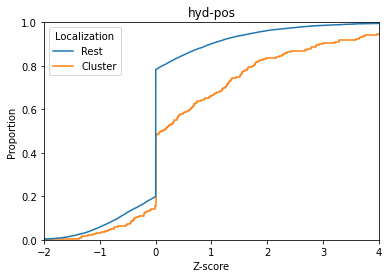

Ks_2sampResult(statistic=0.08061675257853751, pvalue=0.014334210633458213)
hyd-neg
1.8436262180975025


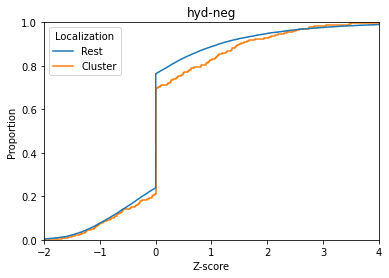

Ks_2sampResult(statistic=0.002072796617195949, pvalue=1.0)
hyd-aro
0.0
Ks_2sampResult(statistic=0.021874126042358936, pvalue=0.9933639865181615)
hyd-ala
0.0
Ks_2sampResult(statistic=0.1206687679597624, pvalue=3.133229280969021e-05)
hyd-pro
4.504007823498047


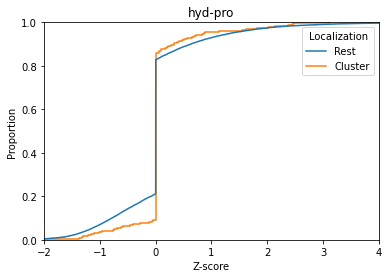

Ks_2sampResult(statistic=0.04993850345373024, pvalue=0.29963558691532033)
hyd-gly
0.0
Ks_2sampResult(statistic=0.4494673664485326, pvalue=4.3170362393633e-67)
pos-pos
66.36481430564314


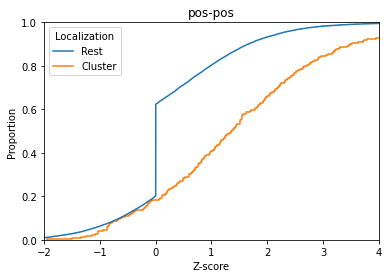

Ks_2sampResult(statistic=0.4015675067972694, pvalue=1.2224784269370348e-53)
pos-neg
52.912758796126525


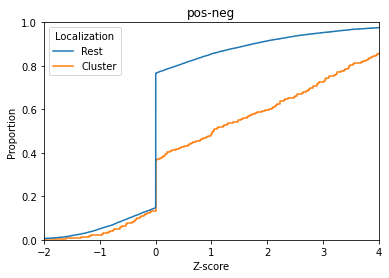

Ks_2sampResult(statistic=0.005139891217915138, pvalue=1.0)
pos-aro
0.0
Ks_2sampResult(statistic=0.08253919089189543, pvalue=0.011294541793066321)
pos-ala
1.9471313832278456


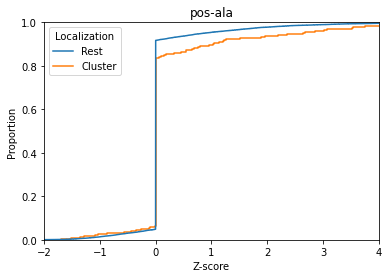

Ks_2sampResult(statistic=0.13018150824844177, pvalue=5.111335626947451e-06)
pos-pro
5.291465600918059


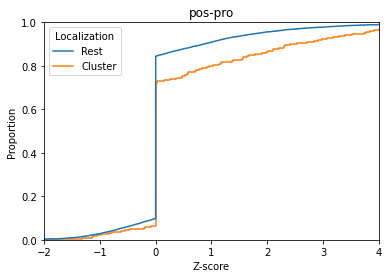

Ks_2sampResult(statistic=0.0333176817498958, pvalue=0.7929211392461296)
pos-gly
0.0
Ks_2sampResult(statistic=0.16144529556790976, pvalue=5.010185973550579e-09)
neg-neg
8.300146153217032


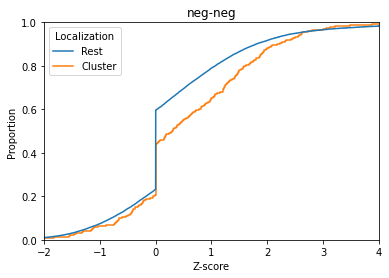

Ks_2sampResult(statistic=0.003026283061106044, pvalue=1.0)
neg-aro
0.0
Ks_2sampResult(statistic=0.01309105312244796, pvalue=0.9999999420341092)
neg-ala
0.0
Ks_2sampResult(statistic=0.04148278204103235, pvalue=0.5302741597790401)
neg-pro
0.0
Ks_2sampResult(statistic=0.030412114927013935, pvalue=0.8736969579123266)
neg-gly
0.0
Ks_2sampResult(statistic=0.008478060360696682, pvalue=1.0)
aro-aro
0.0
Ks_2sampResult(statistic=0.0013680457673493076, pvalue=1.0)
aro-ala
0.0
Ks_2sampResult(statistic=0.0047674322195506175, pvalue=1.0)
aro-pro
0.0
Ks_2sampResult(statistic=0.005306359340021557, pvalue=1.0)
aro-gly
0.0
Ks_2sampResult(statistic=0.02599609154329052, pvalue=0.9594944572197931)
ala-ala
0.0
Ks_2sampResult(statistic=0.028010248421989598, pvalue=0.9268131938560282)
ala-pro
0.0
Ks_2sampResult(statistic=0.03356018821422879, pvalue=0.785572660121036)
ala-gly
0.0
Ks_2sampResult(statistic=0.09979925018461853, pvalue=0.0010335186152173597)
pro-pro
-2.985681696672521


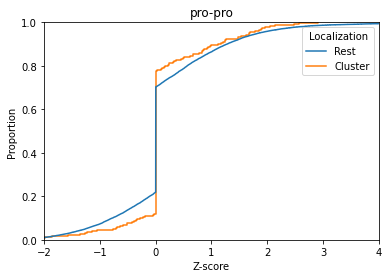

Ks_2sampResult(statistic=0.06714142659099487, pvalue=0.06507409540636992)
pro-gly
0.0
Ks_2sampResult(statistic=0.09829974830019939, pvalue=0.00129521895031576)
gly-gly
-2.887656810056599


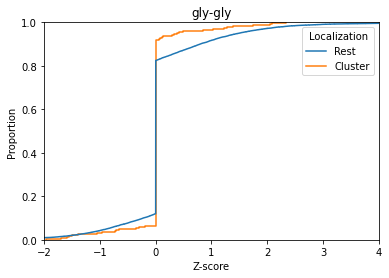

Ks_2sampResult(statistic=0.034208447301347644, pvalue=0.7655888567206699)
Frac A
0.0
Ks_2sampResult(statistic=0.10697950358561592, pvalue=0.00033447772627281567)
Frac C
-3.4756327977134593


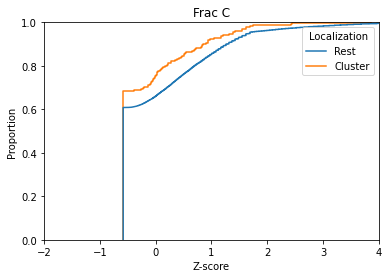

Ks_2sampResult(statistic=0.08740457080651765, pvalue=0.006025810800651879)
Frac D
-2.219984508494527


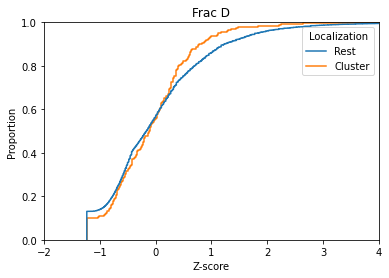

Ks_2sampResult(statistic=0.15465962531569877, pvalue=2.5567441004939954e-08)
Frac E
7.592312737482024


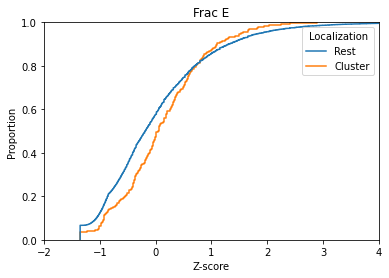

Ks_2sampResult(statistic=0.05327817617955011, pvalue=0.23101797269472008)
Frac F
0.0
Ks_2sampResult(statistic=0.18314500597781658, pvalue=1.7073193290337536e-11)
Frac G
-10.76768524287638


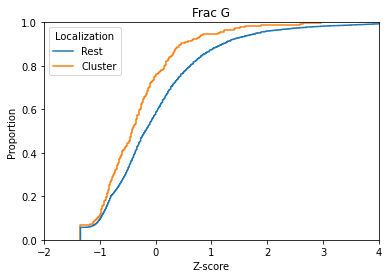

Ks_2sampResult(statistic=0.10068228302330162, pvalue=0.0009034388102467914)
Frac H
-3.044101256796559


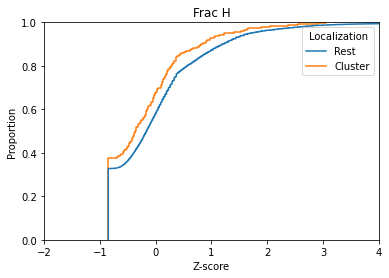

Ks_2sampResult(statistic=0.04374588931137191, pvalue=0.46126416140931714)
Frac I
0.0
Ks_2sampResult(statistic=0.5221971815980339, pvalue=2.0643870153238772e-90)
Frac K
89.68520888123885


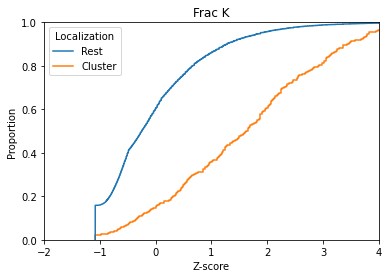

Ks_2sampResult(statistic=0.14433409099598626, pvalue=2.6697473695217323e-07)
Frac L
-6.573529832722902


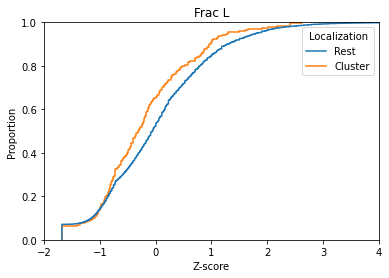

Ks_2sampResult(statistic=0.05401944261747177, pvalue=0.21752587247822788)
Frac M
0.0
Ks_2sampResult(statistic=0.08772290081550049, pvalue=0.005775888965781824)
Frac N
-2.2383811641246627


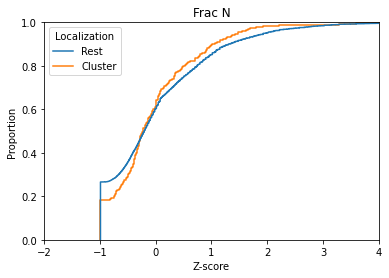

Ks_2sampResult(statistic=0.21293764469301768, pvalue=2.1790233991806242e-15)
Frac P
-14.661738106109658


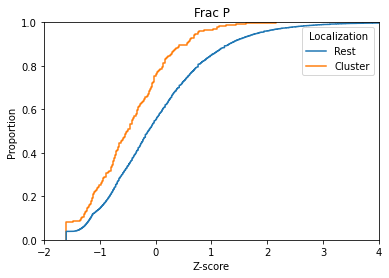

Ks_2sampResult(statistic=0.07170630469551798, pvalue=0.04020326369963157)
Frac Q
-1.395738689472582


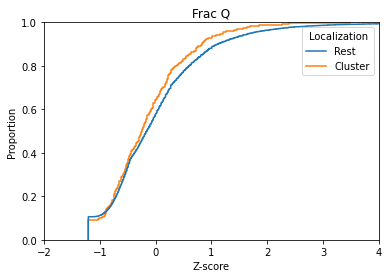

Ks_2sampResult(statistic=0.25483520085506617, pvalue=7.427566670389526e-22)
Frac R
21.12915344124731


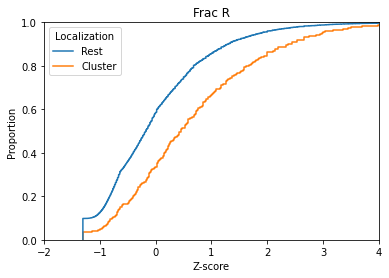

Ks_2sampResult(statistic=0.21616648186915138, pvalue=7.604168232939325e-16)
Frac S
-15.118948283465063


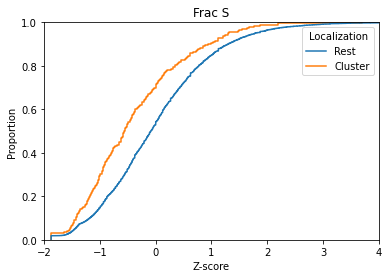

Ks_2sampResult(statistic=0.15409213011749856, pvalue=2.9208371341188833e-08)
Frac T
-7.534492658612011


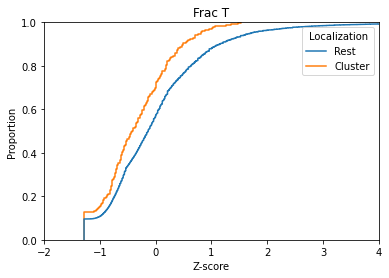

Ks_2sampResult(statistic=0.06484545529138797, pvalue=0.08192080916338033)
Frac V
0.0
Ks_2sampResult(statistic=0.048666901798414264, pvalue=0.32921561519215237)
Frac W
0.0
Ks_2sampResult(statistic=0.043178179315594756, pvalue=0.47815349392247386)
Frac Y
0.0
Ks_2sampResult(statistic=0.5824171858682097, pvalue=2.309820199170674e-112)
Frac K+R
111.63642182510662


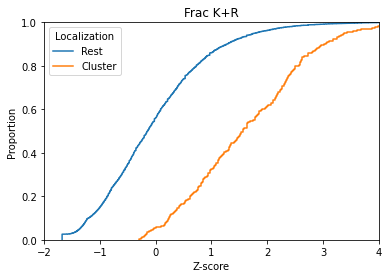

Ks_2sampResult(statistic=0.13863980723206254, pvalue=9.082425576773633e-07)
Frac D+E
6.041798152147214


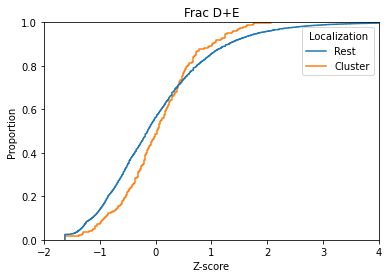

Ks_2sampResult(statistic=0.35603149447991705, pvalue=2.960827044385625e-42)
Frac Polar
-41.528586961020956


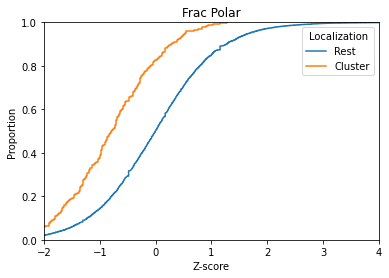

Ks_2sampResult(statistic=0.09287181353164586, pvalue=0.0028494942961947963)
Frac Aliphatic
-2.545232208012349


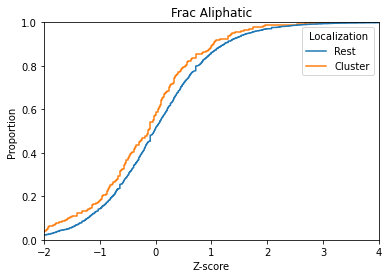

Ks_2sampResult(statistic=0.0640272913209321, pvalue=0.08875247094127818)
Frac Aromatic
0.0
Ks_2sampResult(statistic=0.27597257120861873, pvalue=1.4734816030061363e-25)
K/R Ratio
24.8316552821166


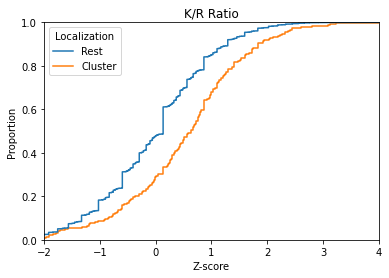

Ks_2sampResult(statistic=0.09716475790379903, pvalue=0.0015330370125657602)
E/D Ratio
2.814447359718994


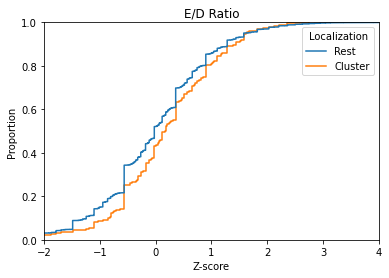

Ks_2sampResult(statistic=0.417066655554472, pvalue=7.947377120724336e-58)
Frac Chain Expanding
57.09977617825483


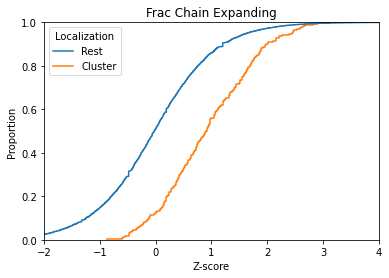

Ks_2sampResult(statistic=0.46672764053883253, pvalue=2.610490131361411e-72)
FCR
71.58327794424733


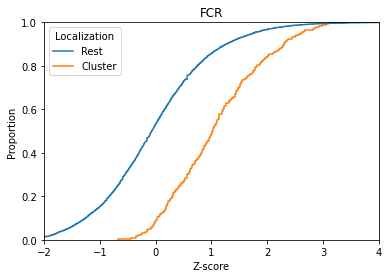

Ks_2sampResult(statistic=0.4270921176592391, pvalue=1.2807109332634378e-60)
NCPR
59.892548882944794


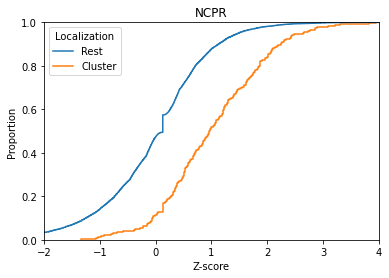

Ks_2sampResult(statistic=0.4069649403099014, pvalue=4.4375575523708094e-55)
Hydrophobicity
-54.35285600137009


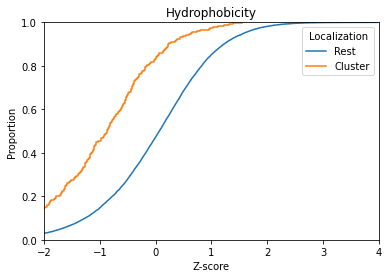

Ks_2sampResult(statistic=0.15093890168843782, pvalue=6.066064729170497e-08)
Disorder Promoting
7.217092959773529


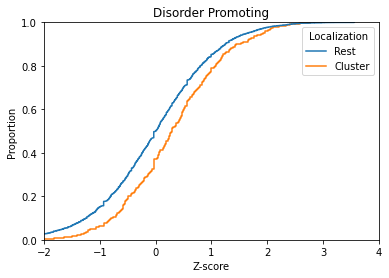

Ks_2sampResult(statistic=0.39737508769111074, pvalue=1.5579711151382411e-52)
Iso point
51.807440598430055


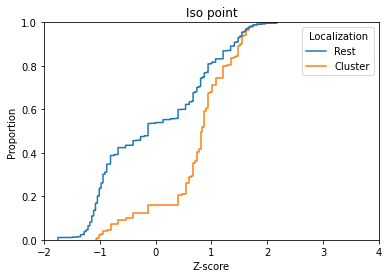

Ks_2sampResult(statistic=0.15055033287180494, pvalue=6.630796524682939e-08)
PPII
7.1784342988204966


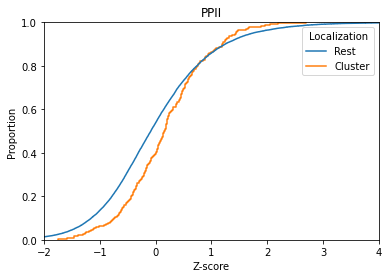

Ks_2sampResult(statistic=0.021313933961773723, pvalue=0.9952553349784049)
A Block
0.0
Ks_2sampResult(statistic=8.291186468778466e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.02249080988567176, pvalue=0.9906835820861049)
D Block
0.0
Ks_2sampResult(statistic=0.10223892106317933, pvalue=0.0007106597038697973)
E Block
3.148338309410727


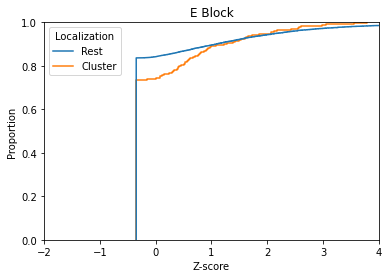

Ks_2sampResult(statistic=0.0002072796617196282, pvalue=1.0)
F Block
0.0
Ks_2sampResult(statistic=0.06689591296058506, pvalue=0.06672159811335962)
G Block
0.0
Ks_2sampResult(statistic=0.010654174612387046, pvalue=0.9999999999954531)
H Block
0.0
Ks_2sampResult(statistic=0.00029019152640741286, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.4857722381005365, pvalue=2.6954086297861705e-78)
K Block
77.56937538550191


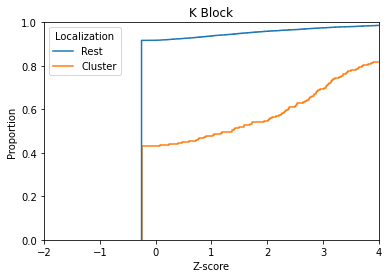

Ks_2sampResult(statistic=0.012353867838487687, pvalue=0.9999999940166877)
L Block
0.0
Ks_2sampResult(statistic=0.0010778542409418668, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.004808888151894508, pvalue=1.0)
N Block
0.0
Ks_2sampResult(statistic=0.09909578812023334, pvalue=0.0011494486084451662)
P Block
-2.939510441156436


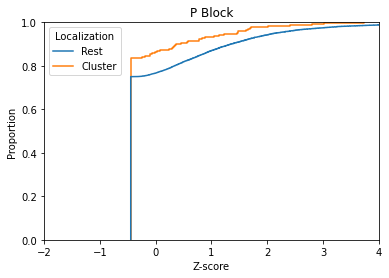

Ks_2sampResult(statistic=0.01631387596642797, pvalue=0.9999603931145172)
Q Block
0.0
Ks_2sampResult(statistic=0.16910862871938115, pvalue=7.310200743600929e-10)
R Block
9.136070696825845


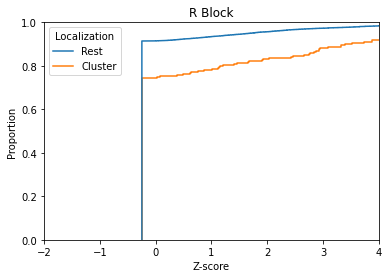

Ks_2sampResult(statistic=0.06308454475586744, pvalue=0.09721050553879178)
S Block
0.0
Ks_2sampResult(statistic=0.02752738346909256, pvalue=0.9356762827626968)
T Block
0.0
Ks_2sampResult(statistic=0.004394328828455363, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.0006218389851587736, pvalue=1.0)
Y Block
0.0
Ks_2sampResult(statistic=0.011421431557114836, pvalue=0.9999999998259543)
RG Frac
0.0
Cluster_4
294
294
24214
Ks_2sampResult(statistic=0.13862082373215248, pvalue=2.83704701375012e-05)
pol-pol
4.547133467290833


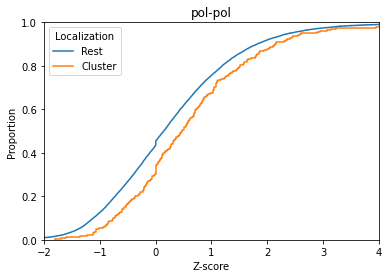

Ks_2sampResult(statistic=0.05036216187970188, pvalue=0.4527439433736536)
pol-hyd
0.0
Ks_2sampResult(statistic=0.028663352678975268, pvalue=0.9708177901108662)
pol-pos
0.0
Ks_2sampResult(statistic=0.4536378853184952, pvalue=2.4017144073453877e-52)
pol-neg
51.61947863668669


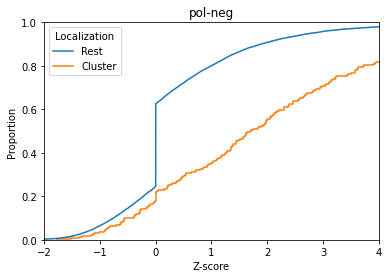

Ks_2sampResult(statistic=0.004460229619228546, pvalue=1.0)
pol-aro
0.0
Ks_2sampResult(statistic=0.07604809496277243, pvalue=0.06948190522466151)
pol-ala
0.0
Ks_2sampResult(statistic=0.14878416882570322, pvalue=5.198691306283876e-06)
pol-pro
-5.284105969825073


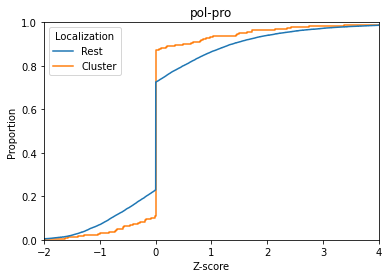

Ks_2sampResult(statistic=0.08835502483805124, pvalue=0.021449037338994132)
pol-gly
-1.6685921947494018


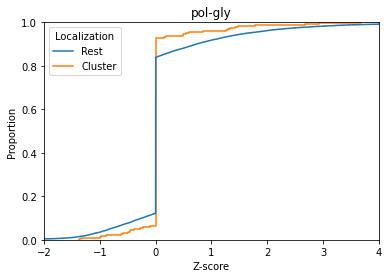

Ks_2sampResult(statistic=0.059123327203186554, pvalue=0.26188418980221195)
hyd-hyd
0.0
Ks_2sampResult(statistic=0.03572257349293066, pvalue=0.8523798010926842)
hyd-pos
0.0
Ks_2sampResult(statistic=0.34593862323983027, pvalue=1.2799288760470933e-30)
hyd-neg
29.89281416285095


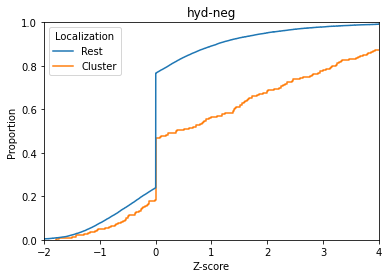

Ks_2sampResult(statistic=0.00210621954241348, pvalue=1.0)
hyd-aro
0.0
Ks_2sampResult(statistic=0.053662945313584176, pvalue=0.37290071975816363)
hyd-ala
0.0
Ks_2sampResult(statistic=0.11808314636666593, pvalue=0.0006067748212266836)
hyd-pro
-3.2169724490276757


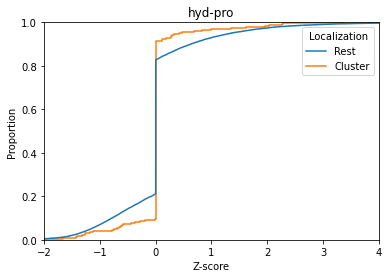

Ks_2sampResult(statistic=0.0615394253844265, pvalue=0.22128231984108193)
hyd-gly
0.0
Ks_2sampResult(statistic=0.11025555014274646, pvalue=0.0017138680782766633)
pos-pos
2.7660226101149425


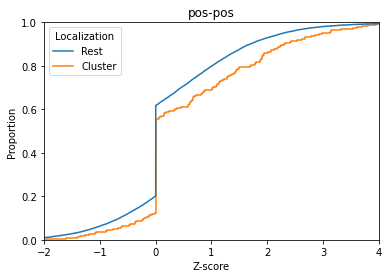

Ks_2sampResult(statistic=0.30479528062980366, pvalue=7.280380240717203e-24)
pos-neg
23.137845937701687


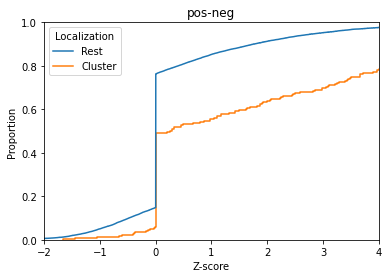

Ks_2sampResult(statistic=0.005743852013424515, pvalue=1.0)
pos-aro
0.0
Ks_2sampResult(statistic=0.06147171844702193, pvalue=0.22235116863309584)
pos-ala
0.0
Ks_2sampResult(statistic=0.0976918396002987, pvalue=0.00781877400582118)
pos-pro
-2.1068613395550333


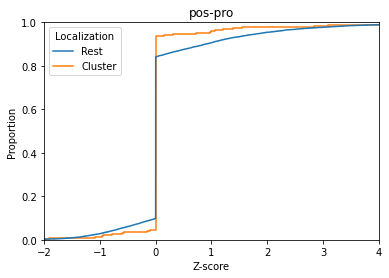

Ks_2sampResult(statistic=0.04719061160435101, pvalue=0.5371907492696308)
pos-gly
0.0
Ks_2sampResult(statistic=0.5069465632127138, pvalue=2.889226390666634e-65)
neg-neg
64.53921842687676


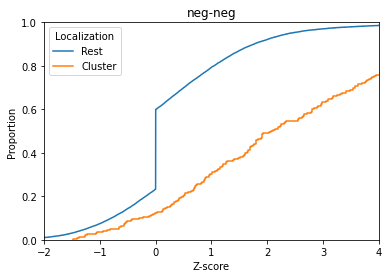

Ks_2sampResult(statistic=0.01622213269548345, pvalue=0.9999991124988501)
neg-aro
0.0
Ks_2sampResult(statistic=0.06592436264172796, pvalue=0.16006560022172195)
neg-ala
0.0
Ks_2sampResult(statistic=0.1255929975855874, pvalue=0.00020956679601856409)
neg-pro
3.6786775263077702


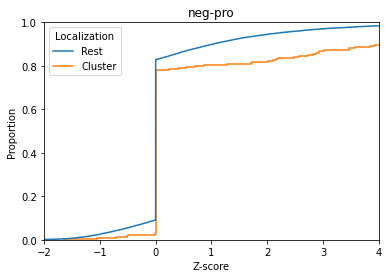

Ks_2sampResult(statistic=0.055302520777039677, pvalue=0.3367364008926332)
neg-gly
0.0
Ks_2sampResult(statistic=0.00718592549764599, pvalue=1.0)
aro-aro
0.0
Ks_2sampResult(statistic=0.0013628479392087222, pvalue=1.0)
aro-ala
0.0
Ks_2sampResult(statistic=0.004749318576030396, pvalue=1.0)
aro-pro
0.0
Ks_2sampResult(statistic=0.005286198067233832, pvalue=1.0)
aro-gly
0.0
Ks_2sampResult(statistic=0.08649659583003932, pvalue=0.025905542291103995)
ala-ala
-1.5866073120211766


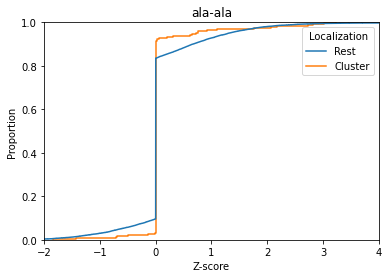

Ks_2sampResult(statistic=0.06587913103624199, pvalue=0.160620073691876)
ala-pro
0.0
Ks_2sampResult(statistic=0.040424412930283204, pvalue=0.7295196221593132)
ala-gly
0.0
Ks_2sampResult(statistic=0.16151279211610306, pvalue=5.240702915669022e-07)
pro-pro
6.28061045883252


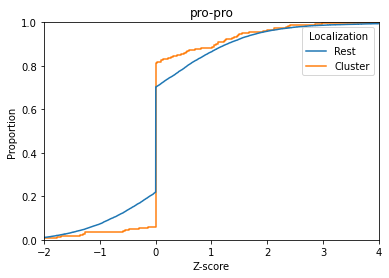

Ks_2sampResult(statistic=0.07071441775686074, pvalue=0.10947537008349435)
pro-gly
0.0
Ks_2sampResult(statistic=0.08248924414896874, pvalue=0.03839243965908486)
gly-gly
-1.4157542896327


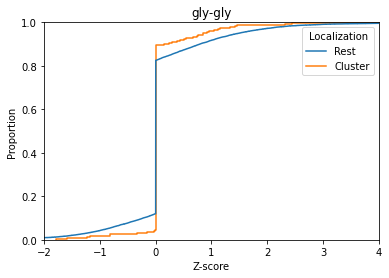

Ks_2sampResult(statistic=0.1827376527549981, pvalue=7.514573137009028e-09)
Frac A
-8.12409568433945


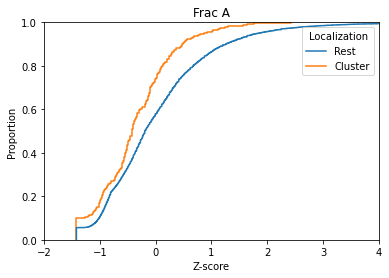

Ks_2sampResult(statistic=0.05750201294691493, pvalue=0.2920329963189493)
Frac C
0.0
Ks_2sampResult(statistic=0.4394149333971633, pvalue=3.84786625549957e-49)
Frac D
48.4147800316207


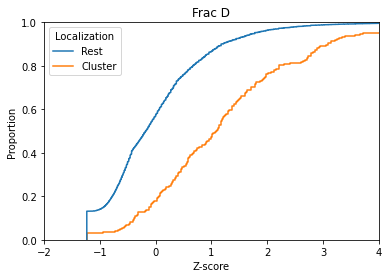

Ks_2sampResult(statistic=0.5905859824726124, pvalue=1.996362922534564e-88)
Frac E
87.69976050466856


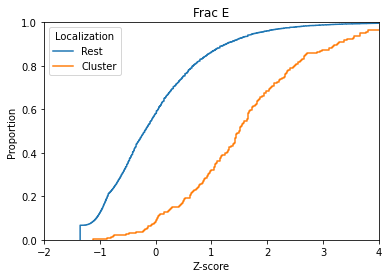

Ks_2sampResult(statistic=0.061539706326075416, pvalue=0.22127789292648795)
Frac F
0.0
Ks_2sampResult(statistic=0.1511199176953345, pvalue=3.460640439249344e-06)
Frac G
-5.460843521584782


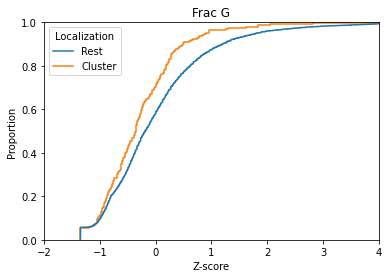

Ks_2sampResult(statistic=0.1773918950581802, pvalue=2.2994657021054147e-08)
Frac H
-7.638373063801379


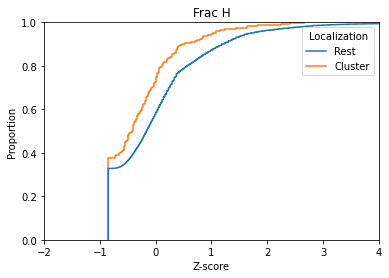

Ks_2sampResult(statistic=0.07351905823864197, pvalue=0.08655468813131827)
Frac I
0.0
Ks_2sampResult(statistic=0.12735197324985992, pvalue=0.00016183309769179742)
Frac K
3.7909326528416116


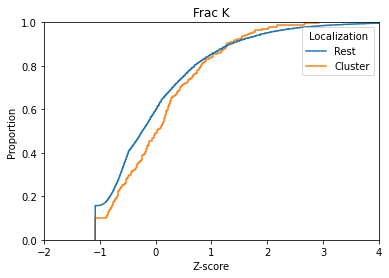

Ks_2sampResult(statistic=0.06934201780158672, pvalue=0.12240068608097716)
Frac L
0.0
Ks_2sampResult(statistic=0.06255109626240851, pvalue=0.20577341466923266)
Frac M
0.0
Ks_2sampResult(statistic=0.08956223110372419, pvalue=0.01893293241129678)
Frac N
-1.7227821154913032


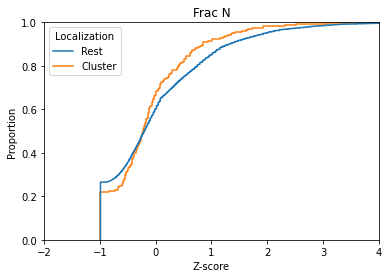

Ks_2sampResult(statistic=0.30077275809968823, pvalue=2.9973589030913277e-23)
Frac P
-22.52326125161564


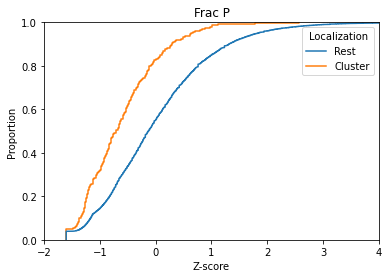

Ks_2sampResult(statistic=0.08010685896560654, pvalue=0.04808127934939137)
Frac Q
-1.31802398511952


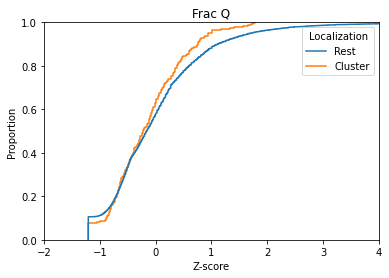

Ks_2sampResult(statistic=0.18408083477877812, pvalue=5.6440938020623905e-09)
Frac R
-8.248405777097073


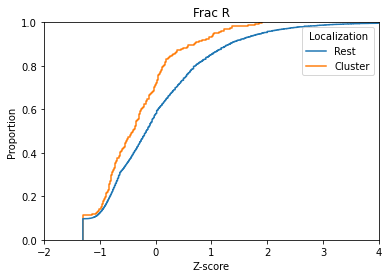

Ks_2sampResult(statistic=0.1777798754754235, pvalue=2.12255928610858e-08)
Frac S
-7.6731401704502185


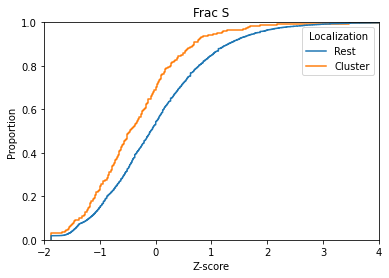

Ks_2sampResult(statistic=0.20062605037059023, pvalue=1.3985522936832704e-10)
Frac T
-9.854321290155177


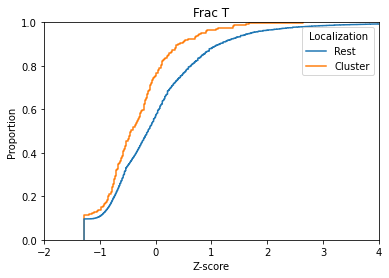

Ks_2sampResult(statistic=0.062296282186782403, pvalue=0.20959871878605157)
Frac V
0.0
Ks_2sampResult(statistic=0.02416660064537912, pvalue=0.9957733579621122)
Frac W
0.0
Ks_2sampResult(statistic=0.0500947054298716, pvalue=0.45959821482450947)
Frac Y
0.0
Ks_2sampResult(statistic=0.07038712073579745, pvalue=0.11245072950718005)
Frac K+R
0.0
Ks_2sampResult(statistic=0.6628405223491891, pvalue=2.8205822610224727e-111)
Frac D+E
110.5496612297492


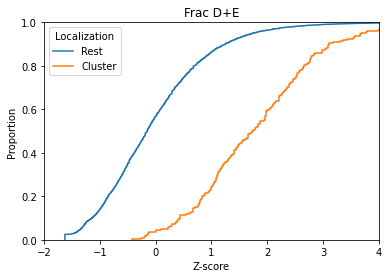

Ks_2sampResult(statistic=0.36779588353058246, pvalue=1.4832258858401562e-34)
Frac Polar
-33.82879270365573


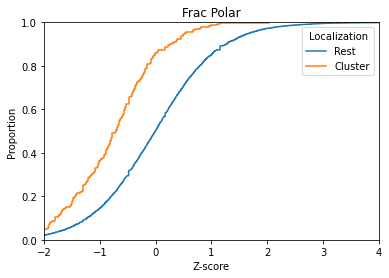

Ks_2sampResult(statistic=0.1883191204953114, pvalue=2.2561963609542017e-09)
Frac Aliphatic
-8.646623105589496


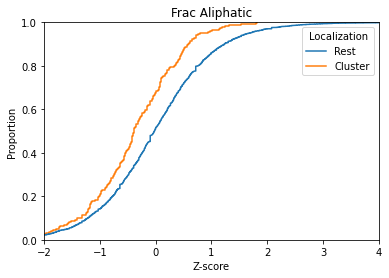

Ks_2sampResult(statistic=0.07631330387941082, pvalue=0.0678700309841282)
Frac Aromatic
0.0
Ks_2sampResult(statistic=0.16048932168886387, pvalue=6.346554636197608e-07)
K/R Ratio
6.197461976844097


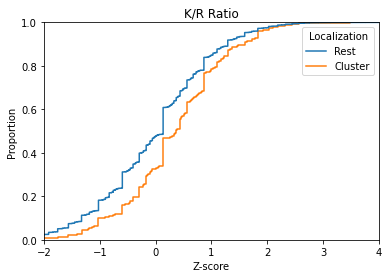

Ks_2sampResult(statistic=0.1438311675541613, pvalue=1.2065937732290898e-05)
E/D Ratio
4.918438920242243


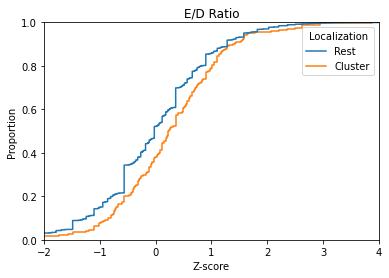

Ks_2sampResult(statistic=0.4514875579371916, pvalue=7.440126994939097e-52)
Frac Chain Expanding
51.1284196514527


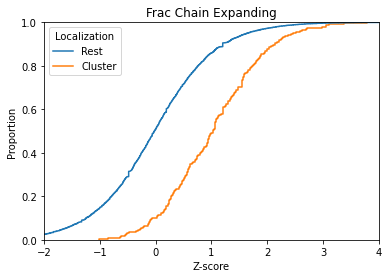

Ks_2sampResult(statistic=0.540441550370871, pvalue=4.068809089838295e-74)
FCR
73.39053268694073


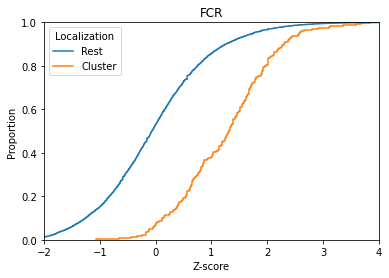

Ks_2sampResult(statistic=0.5326139541469516, pvalue=5.353801186898023e-72)
NCPR
-71.27133776035048


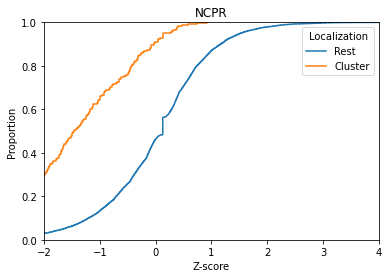

Ks_2sampResult(statistic=0.39845364097567665, pvalue=1.7549396231363436e-40)
Hydrophobicity
-39.75573782038891


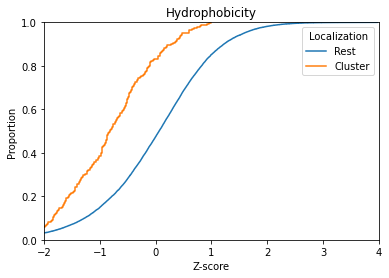

Ks_2sampResult(statistic=0.10279823501218444, pvalue=0.0043135691956194015)
Disorder Promoting
2.365163230885717


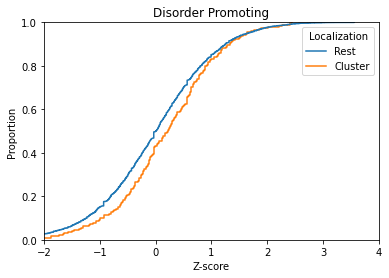

Ks_2sampResult(statistic=0.48361351643986245, pvalue=1.9596483328947039e-59)
Iso point
-58.70782185761609


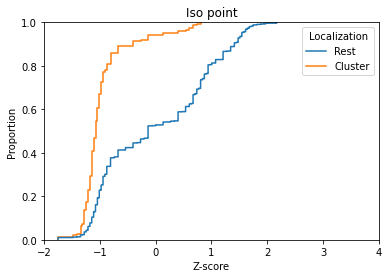

Ks_2sampResult(statistic=0.1623769686283698, pvalue=4.4542111272541044e-07)
PPII
-6.35122920148511


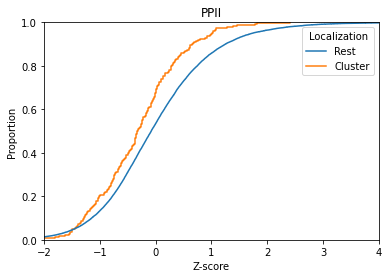

Ks_2sampResult(statistic=0.04574179552055402, pvalue=0.5776777983779875)
A Block
0.0
Ks_2sampResult(statistic=8.259684480049767e-05, pvalue=1.0)
C Block
0.0
Ks_2sampResult(statistic=0.2812675412942083, pvalue=2.1931883700168945e-20)
D Block
19.658924065748103


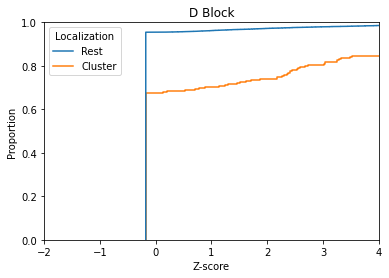

Ks_2sampResult(statistic=0.6210954027270443, pvalue=9.402082802403955e-98)
E Block
97.02677592837976


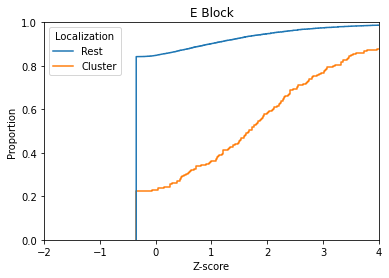

Ks_2sampResult(statistic=0.0002064921120012997, pvalue=1.0)
F Block
0.0
Ks_2sampResult(statistic=0.0528417528736117, pvalue=0.39190774764657554)
G Block
0.0
Ks_2sampResult(statistic=0.010613694556867892, pvalue=0.9999999999999994)
H Block
0.0
Ks_2sampResult(statistic=0.00028908895680179736, pvalue=1.0)
I Block
0.0
Ks_2sampResult(statistic=0.039179841425295736, pvalue=0.7640247254425223)
K Block
0.0
Ks_2sampResult(statistic=0.007790511926253907, pvalue=1.0)
L Block
0.0
Ks_2sampResult(statistic=0.0010737589824069138, pvalue=1.0)
M Block
0.0
Ks_2sampResult(statistic=0.008755265548856084, pvalue=1.0)
N Block
0.0
Ks_2sampResult(statistic=0.10419001994123822, pvalue=0.003648823742893028)
P Block
-2.437847114804095


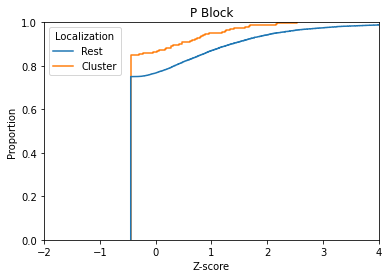

Ks_2sampResult(statistic=0.025755325670368867, pvalue=0.9905382626896858)
Q Block
0.0
Ks_2sampResult(statistic=0.036730592129475825, pvalue=0.8280870906656828)
R Block
0.0
Ks_2sampResult(statistic=0.06895572303423725, pvalue=0.12625628938734743)
S Block
0.0
Ks_2sampResult(statistic=0.026510215881181853, pvalue=0.9868315935795892)
T Block
0.0
Ks_2sampResult(statistic=0.0037168580160238385, pvalue=1.0)
V Block
0.0
Ks_2sampResult(statistic=0.0006194763360040101, pvalue=1.0)
Y Block
0.0
Ks_2sampResult(statistic=0.023911786569753013, pvalue=0.9963446627958202)
RG Frac
0.0
Cluster_5
1
1
24507
Ks_2sampResult(statistic=0.7956094177173869, pvalue=0.5513287991556242)
pol-pol
0.0
Ks_2sampResult(statistic=0.3832374423634064, pvalue=0.9985295384751592)
pol-hyd
0.0
Ks_2sampResult(statistic=0.3512873872771045, pvalue=0.9996753109392833)
pol-pos
0.0
Ks_2sampResult(statistic=0.8330272983229281, pvalue=0.4914839094167513)
pol-neg
0.0
Ks_2sampResult(statistic=0.9995919533194597, pvalue=0.2704592207472263

In [10]:
from scipy.stats import ks_2samp
import seaborn as sbn
import math
dfk2 = pd.DataFrame()
dfclust2 = pd.DataFrame()


for c in range(1,numclust+1):
    print('Cluster_'+str(c))
    curraccclust=acclistbyclust[c-1]
    
    # Get indices in reference to full IDRome
    currclustpos=[]
    for a in curraccclust:
        curridx=fullaccswnums.index(a)
        currclustpos.append(curridx)
    
    pvallks2=np.zeros((len(myfeat)))
    pvallkslog2=np.zeros((len(myfeat)))

    for p in range(0,len(myfeat)): 
        
        nczvec=[]
        czvec=[]
        for idx in range(0,len(fullaccswnums)):
            if idx in currclustpos:
                czvec.append(zvecaa[idx,p])
            else:
                nczvec.append(zvecaa[idx,p])

        if p==0:
            print(len(currclustpos))
            print(len(czvec))
            print(len(nczvec))
            
        tmp=ks_2samp(nczvec, czvec, alternative='two-sided', mode='auto')
        print(tmp)
        pvallks2[p]=tmp.pvalue

        if tmp.pvalue<0.05 and np.mean(czvec)>np.mean(nczvec):
            if tmp.pvalue!= 0:
                pvallkslog2[p]=-1*math.log10(tmp.pvalue)
            else:
                pvallkslog2[p]=30
            print(myfeat[p])
            print(pvallkslog2[p])
        elif tmp.pvalue<0.05 and np.mean(czvec)<np.mean(nczvec):
            if tmp.pvalue!= 0:
                pvallkslog2[p]=math.log10(tmp.pvalue)
            else:
                pvallkslog2[p]=-30
            print(myfeat[p])
            print(pvallkslog2[p])
        else:
            print(myfeat[p])
            print(pvallkslog2[p])
            pvallkslog2[p]=0

        result=[]
        if tmp.pvalue<0.05:
            for s in range(0,len(zvecaa)):
                if s in currclustpos:
                    result.append('Cluster')
                else:
                    result.append('Rest')
            dfk2['Z-score']=zvecaa[:,p]
            dfk2['Localization']=result  

            #sbn.violinplot(x="Localization", y="Z-score", data=dfk2, hue='Localization')
            sbn.ecdfplot(x="Z-score", data=dfk2, hue='Localization', stat="proportion")
            plt.xlim([-2, 4])
            
            plt.title(myfeat[p])
            plt.show()  
    
    dfclust2[c]=pvallkslog2

print(dfclust2)


## Plot cluster features vs full IDRome

       Sequence Features    1          2           3           4    5
2                pol-pos  0.0  -1.977734   62.638865    0.000000  0.0
3                pol-neg  0.0  -3.967264    2.758283   51.619479  0.0
9                hyd-pos  0.0  -1.545874   30.511398    0.000000  0.0
10               hyd-neg  0.0  -2.497541    1.843626   29.892814  0.0
15               pos-pos  0.0  -3.777928   66.364814    2.766023  0.0
16               pos-neg  0.0  -4.653251   52.912759   23.137846  0.0
19               pos-pro  0.0   0.000000    5.291466   -2.106861  0.0
21               neg-neg  0.0  -7.908058    8.300146   64.539218  0.0
33               pro-pro  0.0   0.000000   -2.985682    6.280610  0.0
37                Frac C  0.0   6.091768   -3.475633    0.000000  0.0
38                Frac D  0.0  -3.297010   -2.219985   48.414780  0.0
39                Frac E  0.0  -9.817202    7.592313   87.699761  0.0
44                Frac K  0.0  -1.587316   89.685209    3.790933  0.0
50                Fr

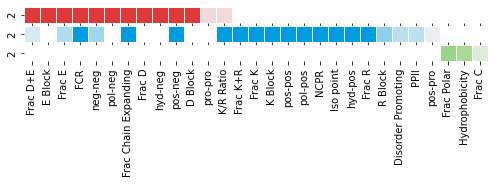

In [11]:
dffeature = pd.DataFrame(myfeat,columns =['Sequence Features'])
cutoffval=5 # if equal to 3 only showing features with p-value<0.001

dfr = pd.concat([dffeature, dfclust2], axis=1)
dfr = dfr[ (dfr[4] >cutoffval) | (dfr[3] >cutoffval) | (dfr[2] >cutoffval)]
print(dfr)
#hi

# Set all negative values to zero
dfr[4][dfr[4]<cutoffval] = 0
dfr[3][dfr[3]<cutoffval] = 0
dfr[2][dfr[2]<cutoffval] = 0

final_dfr = dfr.sort_values(by=[4,3,2], ascending=False)
#final_dfr = dfr
print(final_dfr)

final_dfr2=final_dfr;
mygroup=final_dfr2.pop('Sequence Features')

# Muted
#myredcmap = sbn.light_palette("#C32126", reverse=False, as_cmap=True)
#myredcmap.set_under('white')
#mybluecmap = sbn.light_palette("#3E65AF", reverse=False, as_cmap=True)
#mybluecmap.set_under('white')
#mygreencmap = sbn.light_palette("#176935", reverse=False, as_cmap=True)
#mygreencmap.set_under('white')

# Rainbow
myredcmap = sbn.light_palette("#e23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')
mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
mygreencmap = sbn.light_palette("#5ebd3e", reverse=False, as_cmap=True)
mygreencmap.set_under('white')


f,(ax1,ax2,ax3) = plt.subplots(3,1,sharey=True,figsize = (10, 1))
g1 = sbn.heatmap(final_dfr2[[4]].T,cmap=myredcmap,cbar=False,ax=ax1,vmin=cutoffval, vmax=15, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
#g2.invert_yaxis())
#g1.invert_yaxis()
g2 = sbn.heatmap(final_dfr2[[3]].T,cmap=mybluecmap,cbar=False,ax=ax2,vmin=cutoffval, vmax=15, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
#g2.invert_yaxis()
g3 = sbn.heatmap(final_dfr2[[2]].T,cmap=mygreencmap,cbar=False,ax=ax3,vmin=cutoffval, vmax=15, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
#g2.invert_yaxis())
#g2.invert_yaxis()
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 
 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/nucleoarome_sequence_features_IDRs_gte_30_by_cluster.pdf", transparent=True, bbox_inches = "tight") 


## Plot colorbar

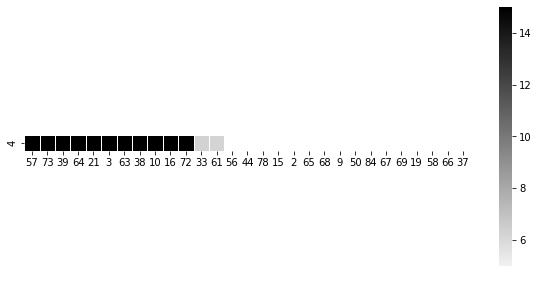

In [12]:
myblackcmap = sbn.light_palette("black", reverse=False, as_cmap=True)
myblackcmap.set_under('white')

f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (10, 5))
g3 = sbn.heatmap(final_dfr2[[4]].T,cmap=myblackcmap,cbar=True,ax=ax1,vmin=cutoffval, vmax=15, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('Manuscript_Figures/2023_03/nucleoarome_sequence_features_IDRs_gte_30_by_cluster_colorbar.pdf', dpi=300, transparent=True, bbox_inches='tight')

## Get top 20 neg-neg, pos-pos, and pos-neg IDRs and categorize them

NCL IDR1
MYBBP1A IDR2
NOP2 IDR1
SREK1IP1 IDR1
UTP3 IDR1
RRP12 IDR2
TAOK2 IDR1
ERICH1 IDR1
CHD7 IDR2
CHD3 IDR1
SURF6 IDR1
RBM28 IDR2
PPP1R12A IDR1
RRP1B IDR2
POLR1G IDR4
LYAR IDR1
NOP56 IDR1
KNOP1 IDR2
ZNF428 IDR1
TCOF1 IDR1
TCOF1 IDR2
KAT6A IDR2
DDX18 IDR1
BMS1 IDR2
TTF1 IDR2
WEE1 IDR1
NPM1 IDR1
ZNF622 IDR1
EIF2S2 IDR1
NOP58 IDR1
WASHC2A IDR1
WASHC2A IDR2
POLR1F IDR1
FAM133B IDR1
FAM133A IDR1
NOLC1 IDR1
WASHC2C IDR1
CUSTOS IDR2
UBTF IDR4
PELP1 IDR2
GTF3C3 IDR1
NUCKS1 IDR1
SENP3 IDR1
LEO1 IDR2
            Genes    neg-neg    pos-neg   pos-pos      nn-pp  K/R Ratio  \
0        NCL IDR1  23.807065  18.925976  3.700476  23.807065   1.380211   
1    MYBBP1A IDR2   0.000000   0.000000  4.273738   0.000000   0.463757   
2       NOP2 IDR1   5.294379   8.879520  3.925041   5.294379   0.131279   
3   SREK1IP1 IDR1   0.000000   3.774547  6.176920   1.092853   0.801632   
4       UTP3 IDR1   6.596999   8.214819  0.000000  13.596999  -0.234083   
5      RRP12 IDR2   5.877185   8.581239  3.139500   

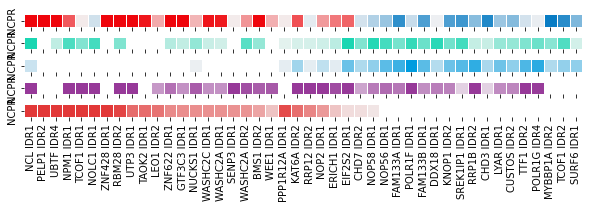

In [10]:
df2 = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)

# add sequence length to dataframe and then only keep if length >=100
slenlist=[]
for currseq in currseqs:
    SeqOb = SequenceParameters(currseq)
    slenlist.append(SeqOb.get_length())

dflen=pd.DataFrame()
dflen['Sequence Length']=slenlist
dfg=pd.DataFrame()
dfg['Genes']=genenameswnums_nuc
dfa=pd.DataFrame()
dfa['Uniprot']=curraccwnums
dfseqs=pd.DataFrame()
dfseqs['Sequences']=currseqs


df3 = pd.concat([dfg, dfa, df2, dflen, dfseqs], axis=1)
df3 = df3[ (df3['Sequence Length'] >=100)]
#df3.to_excel("nucleolar_idrome_length_100_all_features.xlsx")


nn=np.array(df3['neg-neg'].tolist())
pp=np.array(df3['pos-pos'].tolist())
pn=np.array(df3['pos-neg'].tolist())
kr=df3['K/R Ratio'].tolist()
glist100=df3['Genes'].tolist()
ulist100=df3['Uniprot'].tolist()
seqlist100=df3['Sequences'].tolist()


# Get top 20 of neg-neg, pos-pos, and pos-neg
alltop18accwnums=[]
# neg-neg
sort_index = (-nn).argsort()[:20]
for s in sort_index:
    if nn[s]>=3:
        if ulist100[s] not in alltop18accwnums:
            alltop18accwnums.append(ulist100[s])

# pos-pos
sort_index = (-pp).argsort()[:20]
for s in sort_index:
    if pp[s]>=3:
        if ulist100[s] not in alltop18accwnums:
            alltop18accwnums.append(ulist100[s])

# pos-neg
sort_index = (-pn).argsort()[:20]
for s in sort_index:
    if pn[s]>=3:
        if ulist100[s] not in alltop18accwnums:
            alltop18accwnums.append(ulist100[s])


nnsubset=[]
ppsubset=[]
pnsubset=[]
nnminusppsubset=[]
genesubset=[]
ncprsubset=[]
krsubset=[]
fracKtoRsubset=[]
for i in range(0,len(ulist100)):
    if ulist100[i] in alltop18accwnums:
        genesubset.append(glist100[i])
        krsubset.append(kr[i])
        if round(nn[i],1)>=3:
            nnsubset.append(nn[i])
        else:
            nnsubset.append(0)
        if round(pp[i],1)>=3:
            ppsubset.append(pp[i])
        else:
            ppsubset.append(0)
        if round(pn[i],1)>=3:
            pnsubset.append(pn[i])
        else:
            pnsubset.append(0)
        # Want to sort just D/E-tracts first
        if round(nn[i],1)>=3 and round(pp[i],1)<=3:
            nnminusppsubset.append(nn[i]+7)
        else:
            nnminusppsubset.append(nn[i])
        currseq=seqlist100[i]
        SeqOb = SequenceParameters(currseq)
        ncprsubset.append(SeqOb.get_NCPR())
        slen=SeqOb.get_length()
        aafrac=SeqOb.get_amino_acid_fractions()
        fracKtoRsubset.append(np.log10(((slen*aafrac['K'])+1)/((slen*aafrac['R'])+1)))
        print(glist100[i])
        #print(currseqs[i])

dfmapgenes=pd.DataFrame()
dfmapgenes['Genes']=genesubset
dfmapgenes['neg-neg']=nnsubset
dfmapgenes['pos-neg']=pnsubset
dfmapgenes['pos-pos']=ppsubset
dfmapgenes['nn-pp']=nnminusppsubset
dfmapgenes['K/R Ratio']=fracKtoRsubset
dfmapgenes['NCPR']=ncprsubset
print(dfmapgenes)


## Set all <3 to zero
#dfmapgenes['neg-neg'][dfmapgenes['neg-neg']<3] = 0
#dfmapgenes['pos-neg'][dfmapgenes['pos-neg']<3] = 0
#dfmapgenes['pos-pos'][dfmapgenes['pos-pos']<3] = 0

dfmapgenes2 = dfmapgenes.sort_values(by=['nn-pp','pos-neg'], ascending=False)
print(dfmapgenes2)

dfmapgenes3=dfmapgenes2;
mygroup=dfmapgenes3.pop('Genes')

mybluegreencmap = sbn.light_palette("#1ad6b2", reverse=False, as_cmap=True)
mybluegreencmap.set_under('white')
myredcmap = sbn.light_palette("#E23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')
mypurplecmap = sbn.light_palette("#973999", reverse=False, as_cmap=True)
mypurplecmap.set_under('white')
mybluecmap = sbn.light_palette("#009CDF", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
mybwr=sbn.diverging_palette(12, 246, s=99, l=50, sep=5, n=6, center='light', as_cmap=True)

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharey=True,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(dfmapgenes3[['neg-neg']].T,cmap=myredcmap,cbar=False,ax=ax5,vmin=2.9,vmax=8,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)
g2 = sbn.heatmap(dfmapgenes3[['pos-neg']].T,cmap=mypurplecmap,cbar=False,ax=ax4,vmin=2.9,vmax=8,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)
g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap=mybluecmap,cbar=False,ax=ax3,vmin=2.9,vmax=8,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)
g4 = sbn.heatmap(dfmapgenes3[['K/R Ratio']].T,cmap=mybluegreencmap,cbar=False,ax=ax2,vmin=0,vmax=1,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)
g5 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap=mybwr,cbar=False,ax=ax1,vmin=-0.2,vmax=0.2,square=True, linewidth=.5)
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 

#f,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,sharey=True,figsize = (10, 2))
#g1 = sbn.heatmap(dfmapgenes3[['neg-neg']].T,cmap="Reds",cbar=False,ax=ax1,vmin=0,vmax=8,square=True)
#g2 = sbn.heatmap(dfmapgenes3[['pos-neg']].T,cmap="Purples",cbar=False,ax=ax2,vmin=0,vmax=8,square=True)
#g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap="Blues",cbar=False,ax=ax3,vmin=0,vmax=8,square=True)
#g4 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap="RdBu",cbar=False,ax=ax4,vmin=-0.2,vmax=0.2,square=True)
#plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('../2023_02/Charge_patterning_features_top20_nn_pp_pn.pdf', dpi=300, transparent=True, bbox_inches='tight')



## Create colorbars

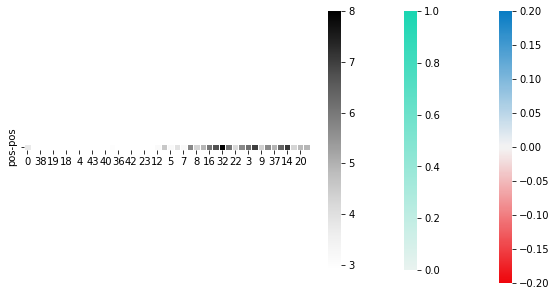

In [11]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (10, 5))
g5 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap=mybwr,cbar=True,ax=ax1,vmin=-0.2,vmax=0.2,square=True, linewidth=.5)
g4 = sbn.heatmap(dfmapgenes3[['K/R Ratio']].T,cmap=mybluegreencmap,cbar=True,ax=ax1,vmin=0,vmax=1,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)
g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap='Greys',cbar=True,ax=ax1,vmin=2.9,vmax=8,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('../2023_02/Charge_patterning_features_localized_genes_colorbar.pdf', dpi=300, transparent=True, bbox_inches='tight')

## Get all sequences classified as D/E-tracts and K-blocks+ERRs

ZCCHC10 IDR1
KENRLLLQQSIGETNVERKAKKKRSKSVTSSSSSSSDSSASDSSSESEETSTSSSSEDSDTDESSSSSSSSASSTTSSSSSDSDSDSSSSSSSSTSTDSSSDDEPPKKKKKK
0.12
0.08
NGDN IDR3
VSKREKGRRKRANVMSSQLHSLTHFSDISALTGGTVHLDEDQNPIKKRKKIPQKGRKKKGFRRRR
0.15476190476190477
0.07142857142857142
1 SREK1IP1 IDR1
ZNF106 IDR9
ADAATDSSCTSGAEQNDGQSIRKKRRATGDGSSPELPSLERKNKRRKIKGKKERSQVDQLL
0.0958904109589041
0.08904109589041095
2 CMSS1 IDR1
XRN2 IDR1
IFKKRKDDEDSFRRRQKEKRKRMKRDQPAFTPSGILTPHALGSRNSPGSQVASNPRQAAYEMRMQNNSSPSISPNTSFTSDGSPSPLGGIKRKAEDSDSEPEPEDN
0.05844155844155844
0.07142857142857142
3 RRP12 IDR2
4 DKC1 IDR1
5 INTS3 IDR2
6 CHD7 IDR2
7 CHD3 IDR1
8 TOP2A IDR2
9 RRP1B IDR2
10 POLR1G IDR4
11 LYAR IDR1
12 RBBP5 IDR2
13 NOP56 IDR1
14 KNOP1 IDR1
15 KNOP1 IDR2
16 PINX1 IDR3
SRP14 IDR1
DGLKKRDKKNKTKKTKAAAAAAAAAPAAAATAPTTAATTAATAAQ
0.09332260659694289
0.03781174577634755
17 DDX18 IDR1
18 TTF1 IDR2
19 DDX21 IDR1
20 BRWD1 IDR3
21 EIF2S2 IDR1
22 EXOSC9 IDR2
23 NOP58 IDR1
24 POLR1F IDR1
25 FAM133B IDR1
26 FAM133A IDR1
27 PTMS IDR1
28 FAM9

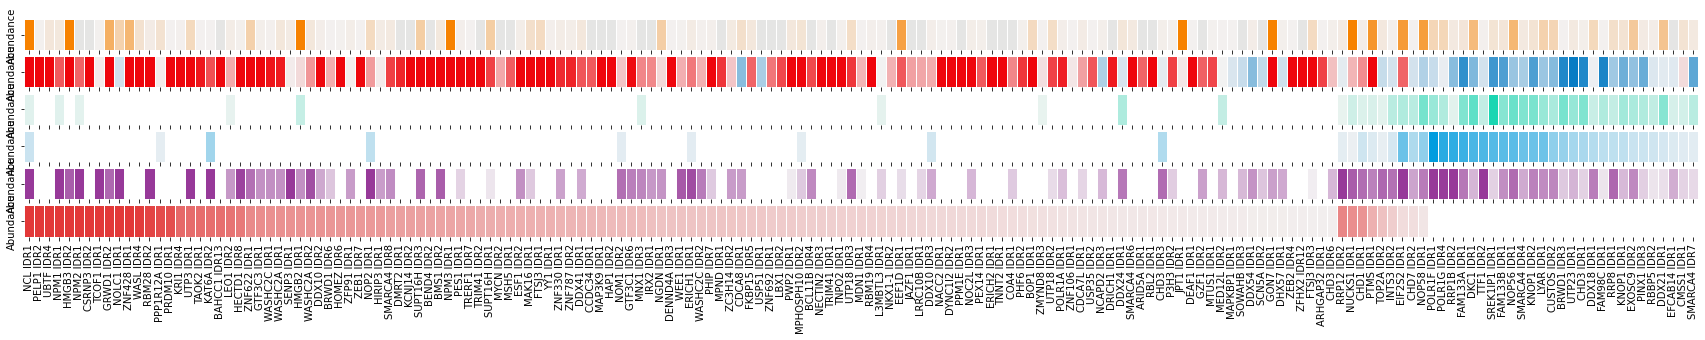

In [13]:
df2 = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)

# Load in abundance information
abundf=pd.read_excel('HeLa_Proteome.xlsx',sheet_name='Sheet1')
alist=abundf['fmol protein'].tolist()
u2list=abundf['Uniprot'].tolist()
g2list=abundf['Gene name'].tolist()

# get sequence length of nucleolar IDRs
slenlist=[]
ef=[]
for currseq in currseqs:
    SeqOb = SequenceParameters(currseq)
    slenlist.append(SeqOb.get_length())
    aafrac=SeqOb.get_amino_acid_fractions()
    if round(aafrac['E'],2)>=round(aafrac['D'],2) and aafrac['E']>0:
        ef.append(1)
    else:
        ef.append(0)
    
# Get features of top charge blocky IDRs
cutoffval=3
nn=df2['neg-neg'].tolist()
pp=df2['pos-pos'].tolist()
pn=df2['pos-neg'].tolist()
kb=df2['K Block'].tolist()

nnsubset=[]
ppsubset=[]
pnsubset=[]
nnminusppsubset=[]
genesubset=[]
ncprsubset=[]
kbsubset=[]
efsubset=[]
abundsubset=[]
countDEtracts=0
countKERRs=0
countboth=0
for i in range(0,len(currseqs)):
    # This is for just D/E-tract proteins and K-blocks+ERRs
    if round(nn[i],1)>=cutoffval or (round(pp[i],1)>=cutoffval and round(pn[i],1)>=cutoffval and round(kb[i],1)>=1 and ef[i]==1 and round(nn[i],1)<5*round(pp[i],1)):
    # This is if we want to include K-blocks
    #if round(nn[i],1)>=cutoffval or (round(pp[i],1)>=cutoffval and round(kb[i],1)>=1 and ef[i]==1) or (round(pp[i],1)>=cutoffval and round(kb[i],1)>=1 and round(pn[i],1)<cutoffval):
        if round(nn[i],1)>=cutoffval:
            nnsubset.append(nn[i])
        else:
            nnsubset.append(0)
        if round(pp[i],1)>=cutoffval:
            ppsubset.append(pp[i])
        else:
            ppsubset.append(0)
        if round(pn[i],1)>=cutoffval:
            pnsubset.append(pn[i])
        else:
            pnsubset.append(0)
        if round(nn[i],1)>=cutoffval and (round(pp[i],1)<cutoffval or round(kb[i],1)<1):
            nnminusppsubset.append(nn[i]+7)
        else:
            if round(nn[i],1)>=cutoffval:
                nnminusppsubset.append(nn[i])
            else:
                nnminusppsubset.append(0)
        if round(nn[i],1)>=cutoffval:
            countDEtracts=countDEtracts+1
        if round(pp[i],1)>=cutoffval and round(pn[i],1)>=cutoffval and round(kb[i],1)>=1 and ef[i]==1 and round(nn[i],1)<5*round(pp[i],1):
            countKERRs=countKERRs+1
            print(str(countKERRs)+' '+genenameswnums_nuc[i])
        if round(nn[i],1)>=cutoffval and round(nn[i],1)<5*round(pp[i],1) and round(pp[i],1)>=cutoffval and round(pn[i],1)>=cutoffval  and round(kb[i],1)>=1 and ef[i]==1:
            countboth=countboth+1
        # Get compositional feature inforamtion
        currseq=currseqs[i]
        SeqOb = SequenceParameters(currseq)
        ncprsubset.append(SeqOb.get_NCPR())
        aafrac=SeqOb.get_amino_acid_fractions()
        # Add k-block and E fraction information
        kbsubset.append(kb[i])
        efsubset.append(ef[i])
        # Get gene name
        genesubset.append(genenameswnums_nuc[i])
        # Get abundance
        pos=[idx for idx, ltr in enumerate(u2list) if curracc[i] in ltr]
        if pos:
            abundsubset.append((alist[pos[0]]))
        else:
            abundsubset.append(-3)
    if round(pp[i],1)>=cutoffval and round(kb[i],1)>=1 and ef[i]<1:
        print(genenameswnums_nuc[i])
        print(currseqs[i])
        print(aafrac['E'])
        print(aafrac['D'])
    

#print(curracc)
#print(u2list)
#print(genesubset)
print(max(abundsubset))
print(min(abundsubset))
print(len(genesubset))  
minabund=min(abundsubset)
print(countDEtracts)
print(countKERRs)
print(countboth)

dfmapgenes=pd.DataFrame()
dfmapgenes['Genes']=genesubset
dfmapgenes['neg-neg']=nnsubset
dfmapgenes['pos-neg']=pnsubset
dfmapgenes['pos-pos']=ppsubset
dfmapgenes['nn-pp']=nnminusppsubset
dfmapgenes['K Block']=kbsubset
dfmapgenes['Frac E']=efsubset
dfmapgenes['NCPR']=ncprsubset
dfmapgenes['Abundance']=abundsubset
print(dfmapgenes)


## Set all <3 to zero
#dfmapgenes['neg-neg'][dfmapgenes['neg-neg']<3] = 0
#dfmapgenes['pos-neg'][dfmapgenes['pos-neg']<3] = 0
#dfmapgenes['pos-pos'][dfmapgenes['pos-pos']<3] = 0

dfmapgenes2 = dfmapgenes.sort_values(by=['nn-pp','pos-pos','K Block'], ascending=False)
print(dfmapgenes2)

dfmapgenes3=dfmapgenes2;
mygroup=dfmapgenes3.pop('Genes')

mybluegreencmap = sbn.light_palette("#1ad6b2", reverse=False, as_cmap=True)
mybluegreencmap.set_under('white')
myredcmap = sbn.light_palette("#E23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')
mypurplecmap = sbn.light_palette("#973999", reverse=False, as_cmap=True)
mypurplecmap.set_under('white')
mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
mybwr=sbn.diverging_palette(12, 246, s=99, l=50, sep=5, n=6, center='light', as_cmap=True)
myorangecmap = sbn.light_palette("#f78200", reverse=False, as_cmap=True)
myorangecmap.set_under('#e5e5e4')

#f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharey=True,sharex=True,figsize = (30, 2.5))
#g1 = sbn.heatmap(dfmapgenes3[['neg-neg']].T,cmap=myredcmap,cbar=False,ax=ax1,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
#g2 = sbn.heatmap(dfmapgenes3[['pos-neg']].T,cmap=mypurplecmap,cbar=False,ax=ax2,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
#g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap=mybluecmap,cbar=False,ax=ax3,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
#g4 = sbn.heatmap(dfmapgenes3[['K Block']].T,cmap=mybluegreencmap,cbar=False,ax=ax4,vmin=0.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
#g5 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap=mybwr,cbar=False,ax=ax5,vmin=-0.2,vmax=0.2,square=False, linewidth=.5)
#plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 

f,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,sharey=True,sharex=True,figsize = (30, 4))
g1 = sbn.heatmap(dfmapgenes3[['neg-neg']].T,cmap=myredcmap,cbar=False,ax=ax6,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
g2 = sbn.heatmap(dfmapgenes3[['pos-neg']].T,cmap=mypurplecmap,cbar=False,ax=ax5,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap=mybluecmap,cbar=False,ax=ax4,vmin=2.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
g4 = sbn.heatmap(dfmapgenes3[['K Block']].T,cmap=mybluegreencmap,cbar=False,ax=ax3,vmin=0.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
g5 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap=mybwr,cbar=False,ax=ax2,vmin=-0.2,vmax=0.2,square=False, linewidth=.5)
g6 = sbn.heatmap(dfmapgenes3[['Abundance']].T,cmap=myorangecmap,cbar=False,ax=ax1,vmin=0,vmax=500,square=False, linewidth=.5)
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/Define_DEblock_KERRs_proteins_for_vertical_pospos_sort.pdf", transparent=True, bbox_inches = "tight") 
#plt.savefig("Manuscript_Figures/2023_03/Define_DEblock_KERRs_proteins_for_vertical.pdf", transparent=True, bbox_inches = "tight") 
#plt.savefig("Manuscript_Figures/2023_03/Define_DEblock_KERRs_proteins.pdf", transparent=True, bbox_inches = "tight") 
#plt.savefig("Manuscript_Figures/2023_03/Define_DEblock_KERRs_Kblock_proteins.pdf", transparent=True, bbox_inches = "tight") 


## Create colorbars

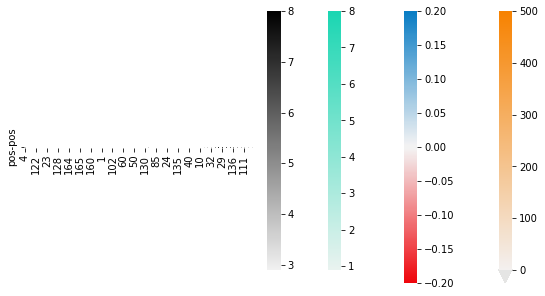

In [14]:
myblackcmap = sbn.light_palette("black", reverse=False, as_cmap=True)
myblackcmap.set_under('white')

f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (10, 5))
g6 = sbn.heatmap(dfmapgenes3[['Abundance']].T,cmap=myorangecmap,cbar=True,ax=ax1,vmin=0,vmax=500,square=False, cbar_kws={'extend': 'min'},linewidth=.5)
g5 = sbn.heatmap(dfmapgenes3[['NCPR']].T,cmap=mybwr,cbar=True,ax=ax1,vmin=-0.2,vmax=0.2,square=True, linewidth=.5)
g4 = sbn.heatmap(dfmapgenes3[['K Block']].T,cmap=mybluegreencmap,cbar=True,ax=ax1,vmin=0.9,vmax=8,square=False,cbar_kws={'extend': 'min'}, linewidth=.5)
g3 = sbn.heatmap(dfmapgenes3[['pos-pos']].T,cmap=myblackcmap,cbar=True,ax=ax1,vmin=2.9,vmax=8,square=True,cbar_kws={'extend': 'min'}, linewidth=.5)


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/Define_DEblock_KERRs_proteins_for_vertical_colorbars.pdf", transparent=True, bbox_inches = "tight") 


In [15]:
from scipy.stats import fisher_exact

pvalsnucfeature=np.zeros((2))
pvalsnucfeaturelog=np.zeros((2))
cutoffval=3

# 1. Find D/E-tract IDRs
subfeatureyes=0
subfeatureno=0
restfeatureyes=0
restfeatureno=0
detractacc=[]
for idx in range(0,len(fullaccs)):
    if fullaccs[idx] in curracc:
        if round(zvecaa[idx,myfeat.index('neg-neg')],1)>=cutoffval:
            subfeatureyes=subfeatureyes+1
            detractacc.append(fullaccswnums[idx])
        else:
            subfeatureno=subfeatureno+1
    else:
        if round(zvecaa[idx,myfeat.index('neg-neg')],1)>=cutoffval:
            restfeatureyes=restfeatureyes+1
        else:
            restfeatureno=restfeatureno+1

print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

# defining the table
if subfeatureyes+restfeatureyes>0:
    data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
    print(data)
    # One-sided greater used to test if greater occurrence in nucleolus
    res = fisher_exact(data, alternative='greater')
    print(res[1])
    pvalsnucfeature[0]=res[1]
    pvalsnucfeaturelog[0]=-math.log10(res[1])


# 2. Find K-block+ERR IDRs
subfeatureyes=0
subfeatureno=0
restfeatureyes=0
restfeatureno=0
kerracc=[]
for idx in range(0,len(fullaccs)):
    # Perform E fraction check for K-blocks + ERRs
    SeqOb = SequenceParameters(myseqs[idx])
    aafrac=SeqOb.get_amino_acid_fractions()
    if round(aafrac['E'],2)>=round(aafrac['D'],2) and aafrac['E']>0:
        echeck=1
    else:
        echeck=0
    if fullaccs[idx] in curracc:
        if round(zvecaa[idx,myfeat.index('pos-pos')],1)>=cutoffval and round(zvecaa[idx,myfeat.index('pos-neg')],1)>=cutoffval and round(zvecaa[idx,myfeat.index('K Block')],1)>=1 and echeck==1 and round(zvecaa[idx,myfeat.index('neg-neg')],1)<5*round(zvecaa[idx,myfeat.index('pos-pos')],1):
            subfeatureyes=subfeatureyes+1
            kerracc.append(fullaccswnums[idx])
        else:
            subfeatureno=subfeatureno+1
    else:
        if round(zvecaa[idx,myfeat.index('pos-pos')],1)>=cutoffval and round(zvecaa[idx,myfeat.index('pos-neg')],1)>=cutoffval and round(zvecaa[idx,myfeat.index('K Block')],1)>=1 and echeck==1 and round(zvecaa[idx,myfeat.index('neg-neg')],1)<5*round(zvecaa[idx,myfeat.index('pos-pos')],1):

            restfeatureyes=restfeatureyes+1
        else:
            restfeatureno=restfeatureno+1

print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

# defining the table
if subfeatureyes+restfeatureyes>0:
    data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
    print(data)
    # One-sided greater used to test if greater occurrence in nucleolus
    res = fisher_exact(data, alternative='greater')
    print(res[1])
    pvalsnucfeature[1]=res[1]
    pvalsnucfeaturelog[1]=-math.log10(res[1])
    
print(detractacc)
print(kerracc)

# Save pvals for DEtract and KERRs
#np.savetxt('../full_nucleolus_evolution/By_Species_Data/sapiens_proteins_DEtract_KERRs_fisher_log_pvals.csv', pvalsnucfeaturelog,header=speciesname,comments='')


# Save DE tract proteins
dedf=pd.DataFrame()
tmpa=[]
tmpg=[]
tmps=[]
tmpf=[]
featurecheck='neg-neg'
for i in range(0,len(detractacc)):
    idx=curraccwnums.index(detractacc[i])
    tmpa.append(curraccwnums[idx])
    tmpg.append(genenameswnums_nuc[idx])
    tmps.append(currseqs[idx])
    tmpf.append(zvecaa[allidx_nuc[idx],myfeat.index(featurecheck)])
    
dedf['Genes']=tmpg
dedf['Accessions']=tmpa
dedf[featurecheck]=tmpf
dedf['Sequence']=tmps
dedf = dedf.sort_values(by=[featurecheck], ascending=False)
print(dedf)
#dedf.to_csv('../full_nucleolus_evolution/By_Species_Data/sapiens_DEtract_proteins.tsv', sep="\t")

# Save KERR tract proteins
kerrdf=pd.DataFrame()
tmpa=[]
tmpg=[]
tmps=[]
tmpf=[]
featurecheck='pos-pos'
for i in range(0,len(kerracc)):
    idx=curraccwnums.index(kerracc[i])
    tmpa.append(curraccwnums[idx])
    tmpg.append(genenameswnums_nuc[idx])
    tmps.append(currseqs[idx])
    tmpf.append(zvecaa[allidx_nuc[idx],myfeat.index(featurecheck)])
    
kerrdf['Genes']=tmpg
kerrdf['Accessions']=tmpa
kerrdf[featurecheck]=tmpf
kerrdf['Sequence']=tmps
kerrdf = kerrdf.sort_values(by=[featurecheck], ascending=False)
print(kerrdf)
#kerrdf.to_csv('../full_nucleolus_evolution/By_Species_Data/sapiens_KERR_proteins.tsv', sep="\t")

24508
[[140, 2091], [719, 21558]]
6.059971754698194e-12
24508
[[36, 2195], [82, 22195]]
3.940802131402606e-11
['Q8WWQ0_7', 'Q03989_1', 'O75398_1', 'A6NEL2_3', 'Q5JTH9_2', 'Q68E01_2', 'Q9C0A1_12', 'Q86X53_1', 'Q9UJV9_1', 'Q9ULD2_1', 'O00541_1', 'Q15021_3', 'Q9NW13_2', 'O14974_1', 'P11388_2', 'A6NIK2_1', 'Q13409_2', 'Q8N9T8_4', 'Q9C0K0_4', 'Q5T1M5_5', 'O00566_2', 'P29692_1', 'Q9Y5R5_1', 'A7KAX9_1', 'Q9P281_13', 'P06748_1', 'Q9NSI6_6', 'P20042_1', 'Q7Z401_3', 'Q9GZR7_1', 'Q86YW9_2', 'Q9NU22_1', 'Q86SE8_1', 'Q9Y2X3_1', 'Q14978_1', 'Q9BQ67_2', 'O00401_4', 'Q9Y4E1_1', 'Q9Y4E1_2', 'Q86VZ6_1', 'O14787_1', 'Q6P158_1', 'Q08999_1', 'Q96JM7_1', 'P17480_4', 'P80192_1', 'O15347_2', 'Q9Y5Q9_1', 'P04198_2', 'Q8WYN3_2', 'Q8WY54_1', 'Q6ZU67_2', 'P37275_7', 'P50219_3', 'Q15269_1', 'Q6PJT7_2', 'P46087_1', 'Q9ULT8_8', 'O60315_4', 'Q9NYJ1_1', 'Q9UK76_1', 'P52954_2', 'Q9ULU4_3', 'O60336_1', 'Q12873_3', 'Q12873_6', 'Q9BXV9_1', 'Q8WV44_1', 'Q8WV44_2', 'Q8IVL6_2', 'Q9BW71_1', 'P30291_1', 'O75381_1', 'A1L162_1',

## Get number of D/E-tract, K-block+ERRs, and K-block IDRs in nucleolarome vs full proteome

In [16]:
from scipy.stats import fisher_exact


countnuc=0
countnuc_DEtract=0
countnuc_KERR=0
countnuc_Kblock=0
countnuc_RG=0
countnuc_Polar=0
countrest=0
countrest_DEtract=0
countrest_KERR=0
countrest_Kblock=0
countrest_RG=0
countrest_Polar=0

cutoffval=3
f1=myfeat.index('neg-neg')
f2=myfeat.index('pos-pos')
f3=myfeat.index('pos-neg')
f4=myfeat.index('K Block')
f5=myfeat.index('RG Frac')
f6=myfeat.index('Frac Polar')

nucDEtractaccs=[]
nucDEtractgenes=[]
restDEtractaccs=[]
restDEtractgenes=[]
nucKERRaccs=[]
nucKERRgenes=[]
restKERRaccs=[]
restKERRgenes=[]
nucRGaccs=[]
nucRGgenes=[]
restRGaccs=[]
restRGgenes=[]

for idx in range(0,len(fullaccs)):
    # Perform E fraction check for K-blocks + ERRs
    SeqOb = SequenceParameters(myseqs[idx])
    aafrac=SeqOb.get_amino_acid_fractions()
    if round(aafrac['E'],2)>=round(aafrac['D'],2) and aafrac['E']>0:
        echeck=1
    else:
        echeck=0
    
    # Count number of D/E-tracts, K-blocks + ERRs, and K-blocks
    if idx in allidx_nuc:
        countnuc=countnuc+1
        if round(zvecaa[idx,f1],1)>=cutoffval:
            countnuc_DEtract=countnuc_DEtract+1
            nucDEtractaccs.append(fullaccswnums[idx])
            nucDEtractgenes.append(mygenes[idx])
            print(fullaccs[idx])
            #print(countnuc_DEtract)
        if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)>=cutoffval and round(zvecaa[idx,f4],1)>=1 and echeck==1 and round(zvecaa[idx,f1],1)<5*round(zvecaa[idx,f2],1):
            countnuc_KERR=countnuc_KERR+1
            nucKERRaccs.append(fullaccswnums[idx])
            nucKERRgenes.append(mygenes[idx])
        if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)<cutoffval and round(zvecaa[idx,f4],1)>=1:
            countnuc_Kblock=countnuc_Kblock+1
        if round(zvecaa[idx,f5],1)>=cutoffval:
            countnuc_RG=countnuc_RG+1
            nucRGaccs.append(fullaccswnums[idx])
            nucRGgenes.append(mygenes[idx])
        if round(zvecaa[idx,f6],1)>=cutoffval:
            countnuc_Polar=countnuc_Polar+1
        
    else:
        countrest=countrest+1
        if round(zvecaa[idx,f1],1)>=cutoffval:
            countrest_DEtract=countrest_DEtract+1
            restDEtractaccs.append(fullaccswnums[idx])
            restDEtractgenes.append(mygenes[idx])
        if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)>=cutoffval and round(zvecaa[idx,f4],1)>=1 and echeck==1 and round(zvecaa[idx,f1],1)<5*round(zvecaa[idx,f2],1):
            countrest_KERR=countrest_KERR+1
            restKERRaccs.append(fullaccswnums[idx])
            restKERRgenes.append(mygenes[idx])
        if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)<cutoffval and round(zvecaa[idx,f4],1)>=1:
            countrest_Kblock=countrest_Kblock+1
        if round(zvecaa[idx,f5],1)>=cutoffval:
            countrest_RG=countrest_RG+1
            restRGaccs.append(fullaccswnums[idx])
            restRGgenes.append(mygenes[idx])
        if round(zvecaa[idx,f6],1)>=cutoffval:
            countrest_Polar=countrest_Polar+1


            
print(countnuc_DEtract/countnuc)
print(countrest_DEtract/countrest)
print(countnuc_KERR/countnuc)
print(countrest_KERR/countrest)
print(countnuc_Kblock/countnuc)
print(countrest_Kblock/countrest)
print(countnuc_RG/countnuc)
print(countrest_RG/countrest)
print(countnuc_Polar/countnuc)
print(countrest_Polar/countrest)

print(nucDEtractgenes)
print(nucKERRgenes)
print(nucRGgenes)
print(nucRGaccs)

allDEtractaccs=nucDEtractaccs+restDEtractaccs
allKERRaccs=nucKERRaccs+restKERRaccs
allRGaccs=nucRGaccs+restRGaccs

#with open('DEtract_accessions_nucleolar.txt', 'w') as fp:
#    for item in nucDEtractaccs:
#        fp.write("%s\n" % item)
#        
#with open('KERR_accessions_nucleolar.txt', 'w') as fp:
#    for item in nucKERRaccs:
#        fp.write("%s\n" % item)
#        
#with open('DEtract_accessions_nonnucleolar.txt', 'w') as fp:
#    for item in restDEtractaccs:
#        fp.write("%s\n" % item)
#        
#with open('KERR_accessions_nonnucleolar.txt', 'w') as fp:
#    for item in restKERRaccs:
#        fp.write("%s\n" % item)

Q8WWQ0
Q03989
O75398
A6NEL2
Q5JTH9
Q68E01
Q9C0A1
Q86X53
Q9UJV9
Q9ULD2
O00541
Q15021
Q9NW13
O14974
P11388
A6NIK2
Q13409
Q8N9T8
Q9C0K0
Q5T1M5
O00566
P29692
Q9Y5R5
A7KAX9
Q9P281
P06748
Q9NSI6
P20042
Q7Z401
Q9GZR7
Q86YW9
Q9NU22
Q86SE8
Q9Y2X3
Q14978
Q9BQ67
O00401
Q9Y4E1
Q9Y4E1
Q86VZ6
O14787
Q6P158
Q08999
Q96JM7
P17480
P80192
O15347
Q9Y5Q9
P04198
Q8WYN3
Q8WY54
Q6ZU67
P37275
P50219
Q15269
Q6PJT7
P46087
Q9ULT8
O60315
Q9NYJ1
Q9UK76
P52954
Q9ULU4
O60336
Q12873
Q12873
Q9BXV9
Q8WV44
Q8WV44
Q8IVL6
Q9BW71
P30291
O75381
A1L162
Q96GN5
Q9Y5B9
Q9Y5B9
Q9H501
Q9Y4C8
Q13206
Q13206
Q641Q2
Q641Q2
Q9BZI1
P20962
P25490
Q6DD87
Q9P2H5
P26583
Q9H1E3
Q8IWS0
Q9H4L4
Q8WVC0
O43196
Q9H116
Q9Y3T9
Q96HJ3
Q9Y5J1
Q9Y5J1
P19338
Q9NQV6
Q8N594
Q8IY81
Q8IY81
Q70EK9
Q96BF6
Q96PN7
Q8NEJ9
Q9NQZ2
Q9H2Y7
Q9UL54
Q9UNX9
Q9P2D1
Q14137
Q9Y3S2
O95602
Q8IX15
Q53HL2
Q8TDD1
Q12789
Q96B54
Q13428
Q92794
Q14692
Q15270
Q969S3
P45379
Q6PGQ1
Q5C9Z4
P54257
Q9BU19
Q9BXY0
Q14524
O75607
Q92692
O14646
Q8IZL8
P51532
P51532
Q96JP5
0.06275212909009413


(2.007490875857789, 6.059971754698194e-12)
([140, 2091], [719, 21558])
(4.4392466248124896, 3.940802131402606e-11)
([36, 2195], [82, 22195])
(0.38867713948787064, 0.9947472760152976)
([5, 2226], [128, 22149])
(0.8410548635038431, 0.8256289036162103)
([26, 2205], [308, 21969])
[11.217529400059341, 10.40441537061456, 0.0022872414383168166, 0.08321511166974357]
(1.8673766975144488, 0.013176222437401137)
1.33804218184133e-13
1.981444380698425e-15
0.017718295790488926


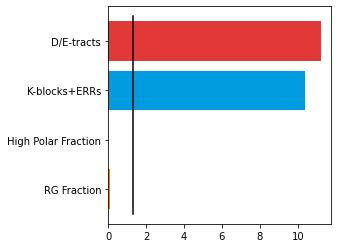

In [17]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
import math

pvalsfeature=[]

# One-sided greater used to test if greater occurrence in nucleolus
res = fisher_exact(([countnuc_DEtract,countnuc-countnuc_DEtract],[countrest_DEtract,countrest-countrest_DEtract]), alternative='greater')
print(res)
print(([countnuc_DEtract,countnuc-countnuc_DEtract],[countrest_DEtract,countrest-countrest_DEtract]))
pvalsfeature.append(-math.log10(res[1]))

res = fisher_exact(([countnuc_KERR,countnuc-countnuc_KERR],[countrest_KERR,countrest-countrest_KERR]), alternative='greater')
print(res)
print(([countnuc_KERR,countnuc-countnuc_KERR],[countrest_KERR,countrest-countrest_KERR]))
pvalsfeature.append(-math.log10(res[1]))

res = fisher_exact(([countnuc_Polar,countnuc-countnuc_Polar],[countrest_Polar,countrest-countrest_Polar]), alternative='greater')
print(res)
print(([countnuc_Polar,countnuc-countnuc_Polar],[countrest_Polar,countrest-countrest_Polar]))
pvalsfeature.append(-math.log10(res[1]))

res = fisher_exact(([countnuc_RG,countnuc-countnuc_RG],[countrest_RG,countrest-countrest_RG]), alternative='greater')
print(res)
print(([countnuc_RG,countnuc-countnuc_RG],[countrest_RG,countrest-countrest_RG]))
pvalsfeature.append(-math.log10(res[1]))

print(pvalsfeature)
fig = plt.figure(figsize = (4, 4)) 
plt.barh([3,2,1,0],pvalsfeature, color=['#E23838', '#009cdf', '#5ebd3e', '#f78200'])
plt.plot([-math.log10(0.05),-math.log10(0.05)],[-0.5, 3.5],color='black')
plt.yticks([3,2,1,0], ['D/E-tracts','K-blocks+ERRs','High Polar Fraction','RG Fraction'],rotation=0) 
#plt.savefig("Manuscript_Figures/2023_03/fisher_exact_test_pvals_vs_rest_of_IDRome_w_significance_line.pdf", transparent=True, bbox_inches = "tight") 


res = fisher_exact(([countnuc_Kblock,countnuc-countnuc_Kblock],[countrest_Kblock,countrest-countrest_Kblock]), alternative='greater')
print(res)

stat, p, dof, expected = chi2_contingency(([countnuc_DEtract,countnuc-countnuc_DEtract],[countrest_DEtract,countrest-countrest_DEtract]))
print(p)

stat, p, dof, expected = chi2_contingency(([countnuc_KERR,countnuc-countnuc_KERR],[countrest_KERR,countrest-countrest_KERR]))
print(p)

stat, p, dof, expected = chi2_contingency(([countnuc_Kblock,countnuc-countnuc_Kblock],[countrest_Kblock,countrest-countrest_Kblock]))
print(p)

In [18]:
import math
-math.log10(3.940802131402606e-11)

10.40441537061456

## Plot sorted D/E-tract and K-block+ERRs IDRs

CHD3 IDR6
10.15001357907864
ARHGAP32 IDR1
0.25506380166660236
FTSJ3 IDR3
94.35452327384861
ZEB2 IDR4
0.14770285100438907
DHX57 IDR1
6.157777625489687
GON7 IDR1
2217.1944752864138
DDX54 IDR1
18.997926085264474
MAPKBP1 IDR1
0.696709853954706
MED12L IDR2
0.05943678160371282
MTUS1 IDR1
3.8630222143150084
DEAF1 IDR1
1.0485458189826387
JPT1 IDR1
2563.785459081564
P3H3 IDR2
4.5564167888483205
CHD3 IDR3
10.15001357907864
SMARCA4 IDR6
32.38894768139339
DDX24 IDR1
47.43992736543664
NCAPD2 IDR3
10.99251613351809
NOP58 IDR1
374.30477958609566
USP35 IDR2
1.5250007560493033
CDCA7L IDR1
22.73179545777163
ZNF106 IDR1
0.8733911381291455
POLR1A IDR1
14.27244297328194
UTP18 IDR2
85.58225396755753
ZMYND8 IDR3
0.8063118313689782
BOP1 IDR1
99.45071169782076
PHF6 IDR2
6.281198626849032
CHD7 IDR2
0.31852526475281023
EIF2S2 IDR1
383.2600190685679
PEX14 IDR1
10.059103277597801
NOC2L IDR3
17.450906087529464
DYNC1I2 IDR2
5.795406719341414
NACC2 IDR1
3.855879048380479
DDX10 IDR3
14.638949565241248
EEF1D IDR1
358.9

/project/engineering/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


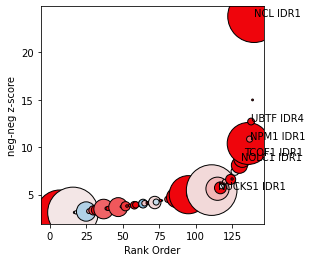

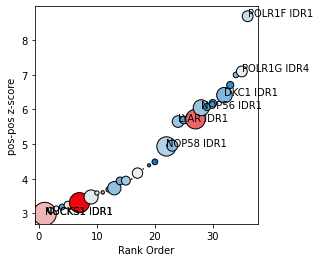

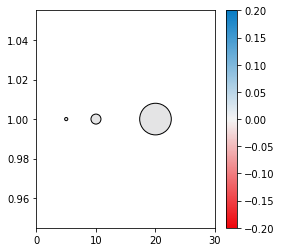

In [19]:
# Plot D/E-tract IDRs
nnDEtract=[]
seqsDEtract=[]
for s in range(0,len(nucDEtractaccs)):
    idx=fullaccswnums.index(nucDEtractaccs[s])
    fidx=myfeat.index('neg-neg')
    nnDEtract.append(zvec[idx,fidx])
    seqsDEtract.append(myseqs[idx])

fig, ax = plt.subplots(figsize = (4, 4)) 
sort_index = np.argsort(nnDEtract)
snnDEtract=[]
tmpncpr=[]
tmppos=[]
abundval=[]
count=0
subgenelist=['UBTF IDR4','NCL IDR1','LYAR IDR1','NUCKS1 IDR1','POLR1F IDR1','NPM1 IDR1','TCOF1 IDR1','NOLC1 IDR1']
for s in sort_index:
    count=count+1
    tmpacc=nucDEtractaccs[s].split('_')
    pos=[i for i, ltr in enumerate(u2list) if tmpacc[0] in ltr]
    if pos:
        abundval.append(alist[pos[0]])
        SeqOb=SequenceParameters(seqsDEtract[s])
        tmpncpr.append(SeqOb.get_NCPR())
        snnDEtract.append(nnDEtract[s])
        tmppos.append(count)
        print(nucDEtractgenes[s])
        print(alist[pos[0]])
        if nucDEtractgenes[s] in subgenelist:
            plt.text(count,nnDEtract[s],nucDEtractgenes[s])
            print(nnDEtract[s])
            print(SeqOb.get_NCPR())
            #plt.scatter(count,nnDEtract[s], s=(alist[pos[0]]),edgecolors='k',linewidth=5,c='white')
        #if alist[pos[0]]>500:
            #plt.text(count,nnDEtract[s],nucDEtractgenes[s])
plt.scatter(tmppos,snnDEtract, s=(abundval), vmin=-0.2, vmax=0.2, cmap=mybwr, c=tmpncpr,edgecolors='k')
plt.ylabel("neg-neg z-score")
plt.xlabel("Rank Order")
#plt.savefig("Manuscript_Figures/2023_03/sorted_ncpr_abundance_DEtracts.pdf", transparent=True, bbox_inches = "tight") 
#plt.savefig("Manuscript_Figures/2023_03/sorted_ncpr_abundance_DEtracts_w_TCOF1.pdf", transparent=True, bbox_inches = "tight") 


# Plot K-block+ERRs IDRs
ppKERR=[]
seqsKERR=[]
for s in range(0,len(nucKERRaccs)):
    idx=fullaccswnums.index(nucKERRaccs[s])
    fidx=myfeat.index('pos-pos')
    ppKERR.append(zvec[idx,fidx])
    seqsKERR.append(myseqs[idx])

fig, ax = plt.subplots(figsize = (4, 4)) 
sort_index = np.argsort(ppKERR)
sppKERR=[]
tmpncpr=[]
tmppos=[]
abundval=[]
count=0
subgenelist=['UBTF IDR4','NCL IDR1','LYAR IDR1','NUCKS1 IDR1','POLR1F IDR1','NPM1 IDR1','TCOF1 IDR1','NOP58 IDR1','NOP56 IDR1','POLR1G IDR4','DKC1 IDR1']
for s in sort_index:
    count=count+1
    tmpacc=nucKERRaccs[s].split('_')
    pos=[i for i, ltr in enumerate(u2list) if tmpacc[0] in ltr]
    if pos:
        abundval.append(alist[pos[0]])
        SeqOb=SequenceParameters(seqsKERR[s])
        tmpncpr.append(SeqOb.get_NCPR())
        sppKERR.append(ppKERR[s])
        tmppos.append(count)
        print(nucKERRgenes[s])
        print(alist[pos[0]])
        if nucKERRgenes[s] in subgenelist:
            plt.text(count,ppKERR[s],nucKERRgenes[s])
            #plt.scatter(count,ppKERR[s], s=(alist[pos[0]]),edgecolors='k',linewidth=3,c='white')
            print(ppKERR[s])
            print(SeqOb.get_NCPR())
        if alist[pos[0]]>500:
            plt.text(count,ppKERR[s],nucKERRgenes[s])
sc=plt.scatter(tmppos,sppKERR, s=(abundval), vmin=-0.2, vmax=0.2, cmap=mybwr, c=tmpncpr,edgecolors='k')
plt.ylabel("pos-pos z-score")
plt.xlabel("Rank Order")
#plt.savefig("Manuscript_Figures/2023_03/sorted_ncpr_abundance_KERR.pdf", transparent=True, bbox_inches = "tight") 


fig, ax = plt.subplots(figsize = (4, 4)) 
plt.scatter([5,10,20],[1, 1, 1],s=[10, 100, 1000], color='#e4e4e5', edgecolors='k', vmin=-0.2, vmax=0.2, cmap=mybwr)
plt.xlim([0,30])
plt.colorbar(sc)
#plt.savefig("Manuscript_Figures/2023_03/sorted_ncpr_abundance_colorbar.pdf", transparent=True, bbox_inches = "tight") 


## Get RG proteins that have D/E-tract or K-block+EERs in same protein or complex

In [25]:
print(nucRGgenes)
print(nucRGaccs)
print(len(nucRGaccs))

print(nucDEtractgenes)
print(nucKERRgenes)

nucRGgenesnonum=[]
for g in nucRGgenes:
    tmp=g.split(' ')
    nucRGgenesnonum.append(tmp[0])
    
nucKERRgenesnonum=[]
for g in nucKERRgenes:
    tmp=g.split(' ')
    nucKERRgenesnonum.append(tmp[0])
    
nucDEtractgenesnonum=[]
for g in nucDEtractgenes:
    tmp=g.split(' ')
    nucDEtractgenesnonum.append(tmp[0])
    
nucRGaccsnonum=[]
for g in nucRGaccs:
    tmp=g.split('_')
    nucRGaccsnonum.append(tmp[0])
    
nucKERRaccsnonum=[]
for g in nucKERRaccs:
    tmp=g.split('_')
    nucKERRaccsnonum.append(tmp[0])
    
nucDEtractaccsnonum=[]
for g in nucDEtractaccs:
    tmp=g.split('_')
    nucDEtractaccsnonum.append(tmp[0])
    
print(list(set(nucRGgenesnonum) & set(nucKERRgenesnonum)))
print(list(set(nucRGgenesnonum) & set(nucDEtractgenesnonum)))

#print(list(set(nucRGaccsnonum) & set(fcdfcacc)))
#print(list(set(nucRGaccsnonum) & set(gcacc)))

data=([8,564],[13,1562])
res = fisher_exact(data, alternative='greater')
print(res[1])

['PURG IDR1', 'NOP9 IDR1', 'NFKBIE IDR1', 'DDX46 IDR1', 'ILF3 IDR4', 'DDX53 IDR1', 'DDX21 IDR2', 'EN1 IDR2', 'GAR1 IDR1', 'GAR1 IDR2', 'INO80B IDR3', 'FBL IDR1', 'NCL IDR2', 'CMAS IDR1', 'DDX5 IDR1', 'DDX5 IDR2', 'ZNF142 IDR5', 'DHX9 IDR2', 'ZCCHC2 IDR2', 'NOM1 IDR1', 'RPL18 IDR1', 'FBLL1 IDR1', 'EWSR1 IDR2', 'EWSR1 IDR3', 'COIL IDR3', 'SRSF5 IDR1']
['Q9UJV8_1', 'Q86U38_1', 'O00221_1', 'Q7L014_1', 'Q12906_4', 'Q86TM3_1', 'Q9NR30_2', 'Q05925_2', 'Q9NY12_1', 'Q9NY12_2', 'Q9C086_3', 'P22087_1', 'P19338_2', 'Q8NFW8_1', 'P17844_1', 'P17844_2', 'P52746_5', 'Q08211_2', 'Q9C0B9_2', 'Q5C9Z4_1', 'Q07020_1', 'A6NHQ2_1', 'Q01844_2', 'Q01844_3', 'P38432_3', 'Q13243_1']
26
['PHIP IDR7', 'ARID5A IDR1', 'DEAF1 IDR1', 'SOWAHB IDR3', 'RRP12 IDR2', 'INTS3 IDR2', 'ZFHX2 IDR12', 'ERICH1 IDR1', 'DDX41 IDR1', 'MTUS1 IDR1', 'PES1 IDR1', 'NCAPD2 IDR3', 'RBM28 IDR2', 'PPP1R12A IDR1', 'TOP2A IDR2', 'LRRC10B IDR1', 'DYNC1I2 IDR2', 'KRI1 IDR4', 'BCL11B IDR4', 'FKBP15 IDR5', 'MPHOSPH10 IDR2', 'EEF1D IDR1', 'DMRT2 I

# Part 3: Analyze nucleolar sublocations for features

## Get accessions of FC/DFC, GC and nucleoplasm

In [20]:
# Russian doll for the accessions - so FC should be distinct from GC which is distinct from nucleoplasm
# All Human Protein Atlas Nucleoli fibrillar center accessions
tsv_fc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli_fibrillar_center.tsv', sep='\t')
#print(tsv_fc)
hatlas_fc_acc=tsv_fc['Uniprot'].values.tolist()
#print(hatlas_fc_acc)
print(len(hatlas_fc_acc))

# Adding proteins from our summary abundance figure
mattslist=['P17480','Q8IZL8','Q9H1E3','Q3B726','Q96C57','O15446','Q9NX58','Q8N9E0','Q5BKY9','Q14978','P19338','Q9NQZ2','O00567','Q9Y2X3','P22087','Q15361','Q8N9Q2','Q13428','Q9BQG0','Q92794','Q9UL54']

hatlas_fc_acc=list(set(hatlas_fc_acc+mattslist))
hatlas_fc_acc_clean = [x for x in hatlas_fc_acc if str(x) != 'nan']
#print(hatlas_fc_acc_clean)
print(len(hatlas_fc_acc_clean))

# All Human Protein Atlas Nucleoli accessions (this should be the GC)
tsv_gc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli.tsv', sep='\t')
hatlas_gc_acc=tsv_gc['Uniprot'].values.tolist()
hatlas_gc_acc=list(set(hatlas_gc_acc+['P06748'])) # Add NPM1
hatlas_gc_acc_clean = [x for x in hatlas_gc_acc if str(x) != 'nan']

# Filter so proteins only belong to FC or GC
gcacc = [item for item in hatlas_gc_acc_clean if item not in hatlas_fc_acc_clean]
fcdfcacc = hatlas_fc_acc_clean
print(len(set(accs_nuc)))
print(len(gcacc))
print(len(fcdfcacc))


# All Human Protein Atlas Nucleoplasm accessions 
tsv_np = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoplasm.tsv', sep='\t')
hatlas_np_acc=tsv_np['Uniprot'].values.tolist()
hatlas_np_acc_clean = [x for x in hatlas_np_acc if str(x) != 'nan']
print(len(hatlas_np_acc_clean))
nucleoplasmacc = [item for item in hatlas_np_acc_clean if item not in accs_nuc]
print(len(nucleoplasmacc))


# All Human Protein Atlas Cajal body
tsv_cb = pd.read_csv('HPA_All/2023_03/cajal_body.tsv', sep='\t')
hatlas_cb_acc=tsv_cb['Uniprot'].values.tolist()
hatlas_cb_acc_clean = [x for x in hatlas_cb_acc if str(x) != 'nan']
cbacc = hatlas_cb_acc_clean
print(len(cbacc))

# All Human Protein Atlas PML body
tsv_pml = pd.read_csv('HPA_All/2023_03/PML_body.tsv', sep='\t')
hatlas_pml_acc=tsv_pml['Uniprot'].values.tolist()
hatlas_pml_acc_clean = [x for x in hatlas_pml_acc if str(x) != 'nan']
pmlacc = hatlas_pml_acc_clean
print(len(pmlacc))

# All Human Protein Atlas PML body
tsv_ns = pd.read_csv('HPA_All/2023_03/subcell_location_Nuclear_speckles.tsv', sep='\t')
hatlas_ns_acc=tsv_ns['Uniprot'].values.tolist()
hatlas_ns_acc_clean = [x for x in hatlas_ns_acc if str(x) != 'nan']
nsacc = hatlas_ns_acc_clean
print(len(nsacc))


# Top 200 MED1 proteins
tsv_med1 = pd.read_excel('From_Papers/Lyons_MED1_enrichment.xlsx')
med1_acc= tsv_med1['Uniprot ID'].tolist()
med1acc=med1_acc[0:200]
#print(med1acc)
print(len(med1acc))

# P-body proteins
tsv_pbody = pd.read_table('From_Papers/Hubstenberger_pbody.txt')
pbodyacc= tsv_pbody['Uniprot'].tolist()
#print(med1acc)
print(len(pbodyacc))

# Stress granule proteins
tsv_sg = pd.read_table('From_Papers/Jain_stress_granule.txt')
sgacc= tsv_sg['Uniprot'].tolist()
#print(med1acc)
print(len(sgacc))

# All Human Protein Atlas Nuclear bodies
tsv_nb = pd.read_csv('HPA_All/2023_03/subcell_location_Nuclear_bodies.tsv', sep='\t')
hatlas_nb_acc=tsv_nb['Uniprot'].values.tolist()
hatlas_nb_acc_clean = [x for x in hatlas_nb_acc if str(x) != 'nan']
nbacc = hatlas_nb_acc_clean
print(len(nbacc))

310
319
1384
1017
319
6056
5260
76
108
479
200
125
411
577


## Get high scoring features that are more enriched than expected by condensate for all 90 sequence features

In [ ]:
mylocs=['P-body','Stress granule','Nuclear bodies','Nuclear speckles','Nucleolus']
location_accs=[pbodyacc, sgacc, nbacc, nsacc, accs_nuc]
#mylocs=['Nucleolus','Nuclear speckles','Cajal body','PML body','MED1']
#location_accs=[accs_nuc, nsacc, cbacc, pmlacc, med1acc]
#mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm','Nuclear speckles','Cajal body','PML body']
#location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc, nsacc, cbacc, pmlacc]
#feature_check=['neg-neg','pos-neg','pos-pos','K Patch','Frac K','Frac D','G Patch','R Patch','Frac R','Frac Aromatic','RG Frac']
feature_check=myfeat

pvalsbylocation=np.zeros((len(location_accs),len(feature_check)))
pvalsbylocationlog=np.zeros((len(location_accs),len(feature_check)))
cutoffval=3
for a in range(0,len(location_accs)):
    for f in range(0,len(feature_check)):
        
        fall=zvecaa[:,myfeat.index(feature_check[f])]
    
        # For each location find how many IDRs have RG Frac and compare to rest of IDRome using chi2
        subfeatureyes=0
        subfeatureno=0
        restfeatureyes=0
        restfeatureno=0
        for s in range(0,len(fullaccs)):
            if fullaccs[s] in location_accs[a]:
                if fall[s]>=cutoffval:
                    subfeatureyes=subfeatureyes+1
                else:
                    subfeatureno=subfeatureno+1
            else:
                if fall[s]>=cutoffval:
                    restfeatureyes=restfeatureyes+1
                else:
                    restfeatureno=restfeatureno+1

        print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

        # defining the table
        if subfeatureyes+restfeatureyes>0:
            data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
            print(data)
            # One-sided greater used to test if greater occurrence in nucleolus
            res = fisher_exact(data, alternative='greater')
            print(res[1])
            pvalsbylocation[a,f]=res[1]
            pvalsbylocationlog[a,f]=-math.log10(res[1])
            
    print('Number of IDRs in '+mylocs[a]+' '+str(subfeatureyes+subfeatureno))

print(pvalsbylocation)

## Plot high scoring features that are more enriched than expected by condensate for all 90 sequence features

[ True  True  True  True False  True  True  True False  True  True False
 False False False  True  True  True False False False  True False  True
 False  True False False  True False False False False  True False  True
 False False False False False  True False False  True False  True False
 False False  True False False False False  True  True  True False  True
  True False False  True  True False False False False False False False
 False  True False  True  True False  True False False False False False
  True False False False  True  True]
[[9.49061610e-02 6.29046526e-01 2.62392674e-02 3.36761118e-01
  5.66153187e-01 5.00898948e-03 1.12093254e-02 6.13597341e-01
  2.20038922e-01 2.61552345e-04 1.56496730e-04 1.47769519e-03
  8.02176790e-04 9.38253223e-01 9.59308085e-01 3.11351196e-03
  2.91618863e-01 1.16706698e-01 1.52012254e-01 2.63863658e-04
  8.45876256e-01 4.94160424e-01 2.31719417e-04 1.54525934e-01
  2.15643388e-01 1.00000000e+00 1.53116207e-02 1.82117777e-01
  3.13805147e-01 

([<matplotlib.axis.XTick at 0x14ac8188fc10>,
 <a list of 36 Text xticklabel objects>)

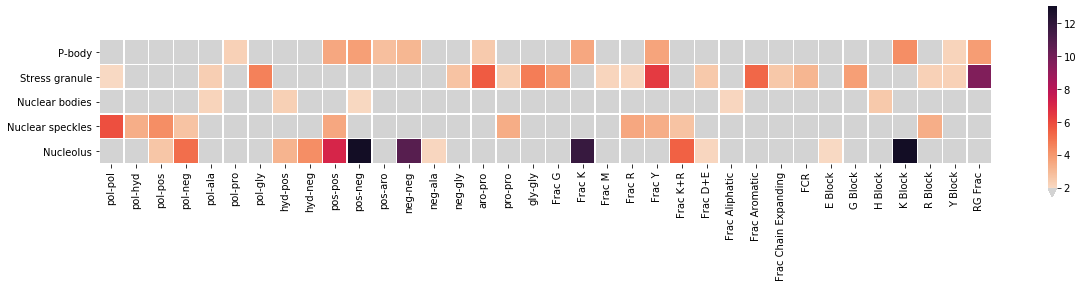

In [21]:
import matplotlib as mpl

mymask=np.any(pvalsbylocationlog > -math.log10(0.01), axis=0);
print(np.any(pvalsbylocationlog > -math.log10(0.01), axis=0))
print(pvalsbylocation[:,mymask])

mysubfeats=[]
for i in range(0,len(mymask)):
    if mymask[i] == True:
        mysubfeats.append(feature_check[i])


c = sbn.color_palette('rocket_r', 20)
green = mpl.colors.LinearSegmentedColormap.from_list('alex_lv', c)
green.set_under(alpha=0)
green.set_under('lightgrey')

## If want to look at all 90 features
fig, ax = plt.subplots(figsize = (20, 3.5)) 
sbn.heatmap(pvalsbylocationlog[:,mymask],cmap=green,vmin=-math.log10(0.01), vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
plt.yticks(np.arange(0.5, len(mylocs), 1), mylocs,rotation=0) 
plt.xticks(np.arange(0.5, len(mysubfeats), 1), mysubfeats,rotation=90) 

#plt.savefig("Manuscript_Figures/2023_03/fisher_exact_test_pvals_condensate_heatmap_90_features.pdf", transparent=True, bbox_inches = "tight") 


       Sequence Features    P-body  Stress granule  Nuclear bodies  \
0                pol-pol  1.022706        2.028979        0.374077   
1                pol-hyd  0.201317        0.689980        0.725332   
2                pol-pos  1.581048        0.998975        1.715075   
3                pol-neg  0.472678        1.020382        0.058844   
5                pol-ala  0.247066        2.355233        2.201542   
6                pol-pro  2.300250        1.767158        0.796818   
7                pol-gly  1.950421        4.633940        0.367835   
9                hyd-pos  0.212117        0.301961        2.332061   
10               hyd-neg  0.657500        0.015366        0.095939   
15               pos-pos  3.582441        0.093724        1.757956   
16               pos-neg  3.805495        0.322966        2.047747   
17               pos-aro  2.830415        0.772475       -0.000000   
21               neg-neg  3.095730        0.384872        0.093088   
23               neg

([<matplotlib.axis.XTick at 0x14ac81636d10>,
 <a list of 36 Text xticklabel objects>)

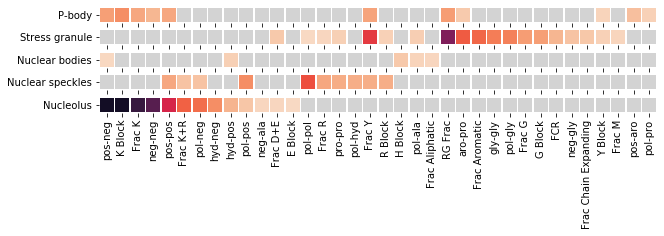

In [22]:
dfr=pd.DataFrame()
dfr['Sequence Features']=myfeat
for a in range(0,len(pvalsbylocationlog)):
    dfr[mylocs[a]]=pvalsbylocationlog[a]
    
cutoffval=-math.log10(0.01) # if equal to 3 only showing features with p-value<0.001

dfr = dfr[ (dfr['Nucleolus'] >cutoffval) | (dfr['Nuclear speckles'] >cutoffval) | (dfr['Nuclear bodies'] >cutoffval) | (dfr['Stress granule'] >cutoffval) | (dfr['P-body'] >cutoffval)]
print(dfr)


# Set all negative values to zero
dfr['Nucleolus'][dfr['Nucleolus']<cutoffval] = 0
dfr['Nuclear speckles'][dfr['Nuclear speckles']<cutoffval] = 0
dfr['Nuclear bodies'][dfr['Nuclear bodies']<cutoffval] = 0
dfr['P-body'][dfr['P-body']<cutoffval] = 0
dfr['Stress granule'][dfr['Stress granule']<cutoffval] = 0

final_dfr = dfr.sort_values(by=['Nucleolus','Nuclear speckles','Nuclear bodies','Stress granule','P-body'], ascending=False)
#final_dfr = dfr
print(final_dfr)

final_dfr2=final_dfr;
mygroup=final_dfr2.pop('Sequence Features')

f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(final_dfr2[['Nucleolus']].T,cmap=green,cbar=False,ax=ax5,vmin=cutoffval, vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g2 = sbn.heatmap(final_dfr2[['Nuclear speckles']].T,cmap=green,cbar=False,ax=ax4,vmin=cutoffval, vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g3 = sbn.heatmap(final_dfr2[['Nuclear bodies']].T,cmap=green,cbar=False,ax=ax3,vmin=cutoffval, vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g4 = sbn.heatmap(final_dfr2[['Stress granule']].T,cmap=green,cbar=False,ax=ax2,vmin=cutoffval, vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
g5 = sbn.heatmap(final_dfr2[['P-body']].T,cmap=green,cbar=False,ax=ax1,vmin=cutoffval, vmax=13, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
ax1.tick_params(labelrotation=0)
ax2.tick_params(labelrotation=0)
ax3.tick_params(labelrotation=0)
ax4.tick_params(labelrotation=0)
ax5.tick_params(labelrotation=0)
plt.xticks(np.arange(0.5, len(mygroup), 1), mygroup,rotation=90) 

#plt.savefig("Manuscript_Figures/2023_03/fisher_exact_test_pvals_original_5_condensates_heatmap_90_features_sorted.pdf", transparent=True, bbox_inches = "tight") 


## Get D/E-tract and K-block+ERR enrichment for Nucleolus, FC/DFC, GC, and Nucleoplasm

In [20]:
mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]

f1=myfeat.index('neg-neg')
f2=myfeat.index('pos-pos')
f3=myfeat.index('pos-neg')
f4=myfeat.index('K Block')
f5=myfeat.index('RG Frac')
f6=myfeat.index('RG Frac')

pvalsbylocation=np.zeros((len(location_accs),3))
pvalsbylocationlog=np.zeros((len(location_accs),3))
cutoffval=3
for a in range(0,len(location_accs)):    
    
    # Find D/E-tract IDRs
    subfeatureyes=0
    subfeatureno=0
    restfeatureyes=0
    restfeatureno=0
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a]:
            if round(zvecaa[idx,f1],1)>=cutoffval:
                subfeatureyes=subfeatureyes+1
            else:
                subfeatureno=subfeatureno+1
        #elif fullaccs[idx] not in accs_nuc and fullaccs[idx] not in nucleoplasmacc:
        else:
            if round(zvecaa[idx,f1],1)>=cutoffval:
                restfeatureyes=restfeatureyes+1
            else:
                restfeatureno=restfeatureno+1

    print(mylocs[a])
    print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

    # defining the table
    if subfeatureyes+restfeatureyes>0:
        data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
        print(data)
        # One-sided greater used to test if greater occurrence in nucleolus
        res = fisher_exact(data, alternative='greater')
        print(res[1])
        pvalsbylocation[a,0]=res[1]
        pvalsbylocationlog[a,0]=-math.log10(res[1])
    
    
    # Find K-block+ERR IDRs
    subfeatureyes=0
    subfeatureno=0
    restfeatureyes=0
    restfeatureno=0
    for idx in range(0,len(fullaccs)):
        # Perform E fraction check for K-blocks + ERRs
        SeqOb = SequenceParameters(myseqs[idx])
        aafrac=SeqOb.get_amino_acid_fractions()
        if round(aafrac['E'],2)>=round(aafrac['D'],2) and aafrac['E']>0:
            echeck=1
        else:
            echeck=0
        if fullaccs[idx] in location_accs[a]:
            if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)>=cutoffval and round(zvecaa[idx,f4],1)>=1 and echeck==1 and round(zvecaa[idx,f1],1)<5*round(zvecaa[idx,f2],1):

                subfeatureyes=subfeatureyes+1
            else:
                subfeatureno=subfeatureno+1
        #elif fullaccs[idx] not in accs_nuc and fullaccs[idx] not in nucleoplasmacc:
        else:
            if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)>=cutoffval and round(zvecaa[idx,f4],1)>=1 and echeck==1 and round(zvecaa[idx,f1],1)<5*round(zvecaa[idx,f2],1):

                restfeatureyes=restfeatureyes+1
            else:
                restfeatureno=restfeatureno+1

    print(mylocs[a])
    print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

    # defining the table
    if subfeatureyes+restfeatureyes>0:
        data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
        print(data)
        # One-sided greater used to test if greater occurrence in nucleolus
        res = fisher_exact(data, alternative='greater')
        print(res[1])
        pvalsbylocation[a,1]=res[1]
        pvalsbylocationlog[a,1]=-math.log10(res[1])
        

    # Find extra features
    subfeatureyes=0
    subfeatureno=0
    restfeatureyes=0
    restfeatureno=0
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a]:
            if round(zvecaa[idx,f6],1)>=cutoffval:
                subfeatureyes=subfeatureyes+1
            else:
                subfeatureno=subfeatureno+1
        #elif fullaccs[idx] not in accs_nuc and fullaccs[idx] not in nucleoplasmacc:
        else:
            if round(zvecaa[idx,f6],1)>=cutoffval:
                restfeatureyes=restfeatureyes+1
            else:
                restfeatureno=restfeatureno+1

    print(mylocs[a])
    print(subfeatureyes+subfeatureno+restfeatureyes+restfeatureno)

    # defining the table
    if subfeatureyes+restfeatureyes>0:
        data = [[subfeatureyes, subfeatureno], [restfeatureyes, restfeatureno]]
        print(data)
        # One-sided greater used to test if greater occurrence in nucleolus
        res = fisher_exact(data, alternative='greater')
        print(res[1])
        pvalsbylocation[a,2]=res[1]
        pvalsbylocationlog[a,2]=-math.log10(res[1])
            


print(pvalsbylocation)


Nucleolus
24508
[[140, 2091], [719, 21558]]
6.059971754698194e-12
Nucleolus
24508
[[36, 2195], [82, 22195]]
3.940802131402606e-11
Nucleolus
24508
[[26, 2205], [308, 21969]]
0.8256289036162103
FC/DFC
24508
[[40, 524], [819, 23125]]
2.220505419720946e-05
FC/DFC
24508
[[15, 549], [103, 23841]]
9.138526943067199e-08
FC/DFC
24508
[[9, 555], [325, 23619]]
0.3629133972206836
GC
24508
[[94, 1468], [765, 22181]]
1.967176313857159e-07
GC
24508
[[20, 1542], [98, 22848]]
5.4173290996683e-05
GC
24508
[[15, 1547], [319, 22627]]
0.9433380324230555
Nucleoplasm
24508
[[355, 8580], [504, 15069]]
0.0015318800527729791
Nucleoplasm
24508
[[45, 8890], [73, 15500]]
0.3853334785158507
Nucleoplasm
24508
[[84, 8851], [250, 15323]]
0.9999966117298213
[[6.05997175e-12 3.94080213e-11 8.25628904e-01]
 [2.22050542e-05 9.13852694e-08 3.62913397e-01]
 [1.96717631e-07 5.41732910e-05 9.43338032e-01]
 [1.53188005e-03 3.85333479e-01 9.99996612e-01]]


## Plot D/E-tract and K-block+ERR enrichment for Nucleolus, FC/DFC, GC, and Nucleoplasm

Text(0.5, 0, '-log10(p-value)')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


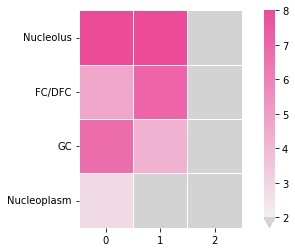

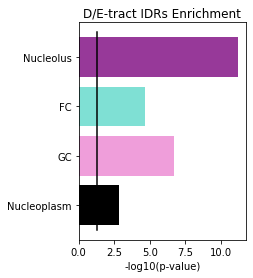

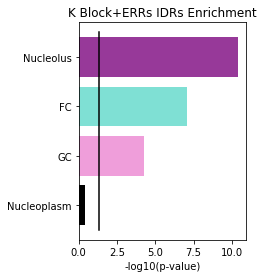

In [21]:
#green = sbn.color_palette("Blues", as_cmap=True)
green = sbn.light_palette("#ED4A9A", reverse=False, as_cmap=True)
green.set_under('lightgrey')

# If just want a subset of features
fig, ax = plt.subplots(figsize = (8, 4)) 
sbn.heatmap(pvalsbylocationlog,cmap=green,vmin=-math.log10(0.01), vmax=8, cbar_kws={'extend': 'min'}, square=True, linewidth=.5)
plt.yticks(np.arange(0.5, len(mylocs), 1), mylocs,rotation=0) 
#plt.xticks(np.arange(0.5, len(feature_check), 1), feature_check,rotation=90)

fig = plt.figure(figsize = (3, 4)) 
plt.title("D/E-tract IDRs Enrichment")
#plt.barh([3,2,1,0],pvalsbylocationlog[:,0], color=['#e4e4e5', '#e0afd1', '#973999', 'black'])
plt.barh([3,2,1,0],pvalsbylocationlog[:,0], color=['#973999', '#7fe0d4', '#ef9eda', 'black'])
plt.plot([-math.log10(0.05),-math.log10(0.05)],[-0.5, 3.5],color='black')
plt.yticks([3,2,1,0], ['Nucleolus','FC','GC','Nucleoplasm'],rotation=0) 
plt.xlabel('-log10(p-value)')
#plt.savefig("Manuscript_Figures/2023_03/fisher_exact_test_pvals_sublocation_DEtract_vs_rest_of_IDRome_w_significance_line.pdf", transparent=True, bbox_inches = "tight") 


fig = plt.figure(figsize = (3, 4)) 
plt.title("K Block+ERRs IDRs Enrichment")
#plt.barh([3,2,1,0],pvalsbylocationlog[:,1], color=['#e4e4e5', '#e0afd1', '#973999', 'black'])
plt.barh([3,2,1,0],pvalsbylocationlog[:,1], color=['#973999', '#7fe0d4', '#ef9eda', 'black'])
plt.plot([-math.log10(0.05),-math.log10(0.05)],[-0.5, 3.5],color='black')
plt.yticks([3,2,1,0], ['Nucleolus','FC','GC','Nucleoplasm'],rotation=0) 
plt.xlabel('-log10(p-value)')
#plt.savefig("Manuscript_Figures/2023_03/fisher_exact_test_pvals_sublocation_KERR_vs_rest_of_IDRome_w_significance_line.pdf", transparent=True, bbox_inches = "tight") 


## Lysine vs Argine content of FC

Nucleolus
Ks_2sampResult(statistic=0.08830121021963246, pvalue=5.472449991324305e-08)
0.06647363543745169
0.07592921737348886


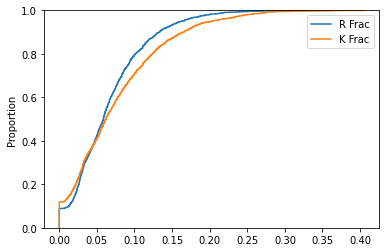

FC/DFC
Ks_2sampResult(statistic=0.07092198581560284, pvalue=0.11720963927457051)
0.06144372728379327
0.06713691004366786


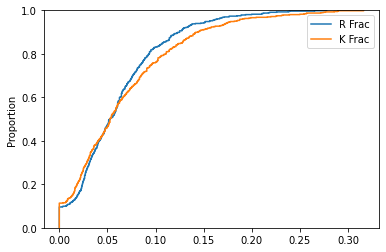

GC
Ks_2sampResult(statistic=0.08258642765685019, pvalue=4.681885708736032e-05)
0.06851276284004541
0.07830868371306418


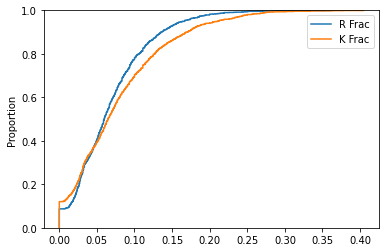

Nucleoplasm
Ks_2sampResult(statistic=0.07375489647453833, pvalue=1.4940971205322503e-21)
0.06350888370277738
0.062472705345366884


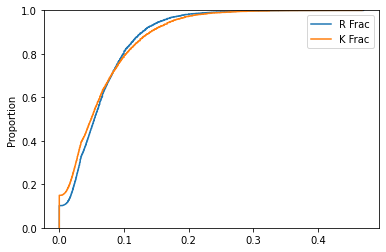

In [50]:
mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]


for a in range(0,len(location_accs)):  
    tmpR=[]
    tmpK=[]
    print(mylocs[a])
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a]:
            SeqOb=SequenceParameters(myseqs[idx])
            
            aafrac=SeqOb.get_amino_acid_fractions()

            ## AA Fractions
            tmpR.append(aafrac['R'])
            tmpK.append(aafrac['K'])
    
    tmp=ks_2samp(tmpK, tmpR, alternative='two-sided', mode='auto')
    print(tmp)
    
    sbn.ecdfplot(tmpR)
    sbn.ecdfplot(tmpK)
    print(np.mean(tmpR))
    print(np.mean(tmpK))
    plt.legend(['R Frac', 'K Frac'])
    plt.show()
    #hi
    

## Get NCPR distributions by subphase

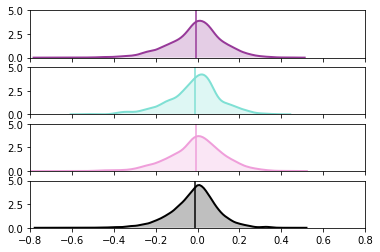

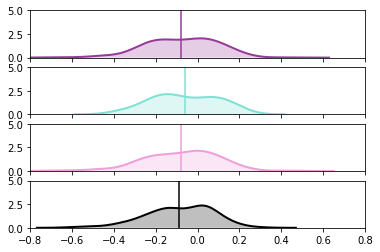

In [10]:
import seaborn as sbn 

mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]

fig, axs = plt.subplots(4,1, sharex=True)

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

for a in range(0,len(location_accs)):  
    tmpncpr=[]
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a]:
            SeqOb=SequenceParameters(myseqs[idx])
            tmpncpr.append(SeqOb.get_NCPR())

    sbn.distplot(tmpncpr, hist=False, color = mycolorlist[a], kde=True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axs[a])
    axs[a].set_xlim(-0.8, 0.8)
    axs[a].set_ylim(0, 5)
    axs[a].axvline(x=np.mean(tmpncpr), color = mycolorlist[a], ymin=0, ymax=3)

# Check with blocky proteins
fig, axs = plt.subplots(4,1, sharex=True)

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

for a in range(0,len(location_accs)):  
    tmpncpr=[]
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a] and (zvecaa[idx,myfeat.index('neg-neg')]>=3 or zvecaa[idx,myfeat.index('pos-pos')]>=3):
            SeqOb=SequenceParameters(myseqs[idx])
            tmpncpr.append(SeqOb.get_NCPR())

    sbn.distplot(tmpncpr, hist=False, color = mycolorlist[a], kde=True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axs[a])
    axs[a].set_xlim(-0.8, 0.8)
    axs[a].set_ylim(0, 5)
    axs[a].axvline(x=np.mean(tmpncpr), color = mycolorlist[a], ymin=0, ymax=3)


O60832
241.63398731619844
O14974
63.16790524836299
Q9NX58
135.2992123764073
O00566
57.64445165530072
O00567
257.01871716570497
P29692
358.9104343472068
Q9NR30
197.86323912025736
P20042
383.2600190685679
Q9Y2X3
374.30477958609566
Q14978
134.95733186503293
Q9BQ67
292.8097605508486
O00401
66.52016118381448
O00401
66.52016118381448
O15347
1758.1226664958983
P46087
96.38987684701797
Q9UK76
2563.785459081564
Q9BXV9
2217.1944752864138
O15446
116.8269809962108
Q1ED39
60.238331146396014
Q1ED39
60.238331146396014
Q9NVP1
107.10486079166193
Q9Y5B9
156.65638108430443
Q9Y5B9
156.65638108430443
Q3B726
117.26512223906902
Q5BKY9
50.259693720656564
P20962
407.04080008912996
Q96C57
122.67100098751646
Q9UMY1
122.99108661629072
P26583
2563.785459081564
Q9H1E3
537.8647965716467
O43159
78.99885326780893
Q9Y5J1
85.58225396755753
Q9Y5J1
85.58225396755753
P19338
2757.9105553229224
Q8IY81
94.35452327384861
Q8TBK6
67.08786445671761
Q8NEJ9
153.97475582321172
Q8NEJ9
153.97475582321172
Q8N9Q2
57.90716546075996
Q9BRJ

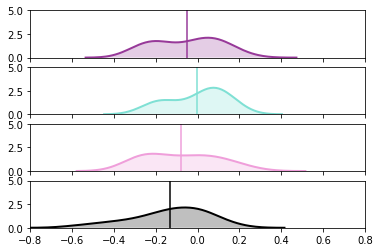

In [20]:
# Check with high abundant proteins
fig, axs = plt.subplots(4,1, sharex=True)

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

for a in range(0,len(location_accs)):  
    tmpncpr=[]
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a] and (zvecaa[idx,myfeat.index('neg-neg')]>=3 or zvecaa[idx,myfeat.index('pos-pos')]>=3):
            tmpidx = [i for i, s in enumerate(u2list) if fullaccs[idx] in s]
            #print(tmpidx)
            if tmpidx:
                if alist[tmpidx[0]]>50:
                    print(fullaccs[idx])
                    print(alist[tmpidx[0]])
                    SeqOb=SequenceParameters(myseqs[idx])
                    tmpncpr.append(SeqOb.get_NCPR())

    sbn.distplot(tmpncpr, hist=False, color = mycolorlist[a], kde=True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axs[a])
    axs[a].set_xlim(-0.8, 0.8)
    axs[a].set_ylim(0, 5)
    axs[a].axvline(x=np.mean(tmpncpr), color = mycolorlist[a], ymin=0, ymax=3)

## Get NCPR using full sequences not just IDRs

In [31]:
## Load in sequences
myfile = open('/project/fava/work/kiersten.ruff/For_Vicky/extracting_RRM_information/fullseqs/sapiens.fasta', 'r')
Lines = myfile.readlines()

fullseqsaccs=[]
fullseqs=[]
thisseq = ''
for line in Lines:
    
    # remove pesky newline
    cleanline = line.strip()
    
    
    if cleanline[0]=='>':
        tmpval=cleanline.split('|')
        fullseqsaccs.append(tmpval[1])
        
        # check that this is not the very first sequence, if not 
        # add the sequence
        if (thisseq is not ''): 
            fullseqs.append(thisseq.upper()) 

            # reset the sequence for the coming entry
            thisseq = '' 

    # else append the sequence
    else:
        thisseq += cleanline

# store the final sequence	
fullseqs.append(thisseq.upper()) 

print(fullseqsaccs)
print(len(fullseqsaccs))

['A0A024RAP8', 'A0A044PY82', 'A0A075B6F4', 'A0A075B6H5', 'A0A075B6H7', 'A0A075B6H8', 'A0A075B6H9', 'A0A075B6I0', 'A0A075B6I1', 'A0A075B6I2', 'A0A075B6I3', 'A0A075B6I4', 'A0A075B6I5', 'A0A075B6I6', 'A0A075B6I7', 'A0A075B6I8', 'A0A075B6I9', 'A0A075B6J0', 'A0A075B6J1', 'A0A075B6J2', 'A0A075B6J3', 'A0A075B6J4', 'A0A075B6J5', 'A0A075B6J6', 'A0A075B6J7', 'A0A075B6J8', 'A0A075B6J9', 'A0A075B6K0', 'A0A075B6K1', 'A0A075B6K2', 'A0A075B6K3', 'A0A075B6K4', 'A0A075B6K5', 'A0A075B6K6', 'A0A075B6K7', 'A0A075B6L2', 'A0A075B6L6', 'A0A075B6M9', 'A0A075B6N1', 'A0A075B6N2', 'A0A075B6N3', 'A0A075B6P5', 'A0A075B6Q4', 'A0A075B6Q5', 'A0A075B6R0', 'A0A075B6R1', 'A0A075B6R2', 'A0A075B6R9', 'A0A075B6S0', 'A0A075B6S2', 'A0A075B6S3', 'A0A075B6S4', 'A0A075B6S5', 'A0A075B6S6', 'A0A075B6S9', 'A0A075B6T6', 'A0A075B6T7', 'A0A075B6T8', 'A0A075B6U4', 'A0A075B6U6', 'A0A075B6U7', 'A0A075B6U8', 'A0A075B6U9', 'A0A075B6V0', 'A0A075B6V1', 'A0A075B6V2', 'A0A075B6V3', 'A0A075B6V5', 'A0A075B6V6', 'A0A075B6V7', 'A0A075B6V8', 'A0A0

216918
1402
39710
319
168032
1017
575010
5260


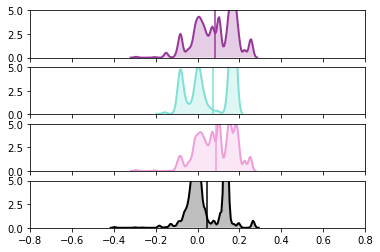

In [39]:
# Check with high abundant proteins
fig, axs = plt.subplots(4,1, sharex=True)

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

for a in range(0,len(location_accs)): 
    tmpncpr=[]
    for tmpacc in location_accs[a]:
        tmpidx = [i for i, s in enumerate(u2list) if tmpacc in s]
        if tmpidx:
            if alist[tmpidx[0]]>0:
                idx=fullseqsaccs.index(tmpacc)
                currseq=fullseqs[idx]
                if "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
                    SeqOb=SequenceParameters(currseq)
                    for i in range(0,round(alist[tmpidx[0]])):
                        tmpncpr.append(SeqOb.get_NCPR())
                    #print(fullseqsaccs[idx])
                    #print(alist[tmpidx[0]])

    print(len(tmpncpr))
    print(len(location_accs[a]))
    sbn.distplot(tmpncpr, hist=False, color = mycolorlist[a], kde=True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axs[a])
    axs[a].set_xlim(-0.8, 0.8)
    axs[a].set_ylim(0, 5)
    axs[a].axvline(x=np.mean(tmpncpr), color = mycolorlist[a], ymin=0, ymax=3)

1390
1402
319
319
1005
1017
5226
5260


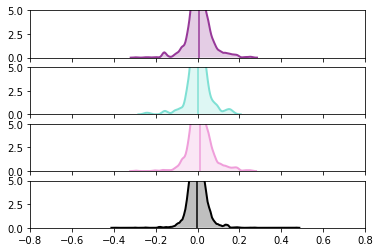

In [37]:
# Check with all proteins
fig, axs = plt.subplots(4,1, sharex=True)

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

for a in range(0,len(location_accs)): 
    tmpncpr=[]
    for tmpacc in location_accs[a]: 
        if tmpacc in fullseqsaccs:
            idx=fullseqsaccs.index(tmpacc)
            currseq=fullseqs[idx]
            if "X" not in currseq and "U" not in currseq and "Z" not in currseq and "J" not in currseq and "B" not in currseq and "O" not in currseq:
                SeqOb=SequenceParameters(currseq)
                tmpncpr.append(SeqOb.get_NCPR())
                #print(fullseqsaccs[idx])
                #print(alist[tmpidx[0]])

    print(len(tmpncpr))
    print(len(location_accs[a]))
    sbn.distplot(tmpncpr, hist=False, color = mycolorlist[a], kde=True, kde_kws = {'shade': True, 'linewidth': 2}, ax=axs[a])
    axs[a].set_xlim(-0.8, 0.8)
    axs[a].set_ylim(0, 5)
    axs[a].axvline(x=np.mean(tmpncpr), color = mycolorlist[a], ymin=0, ymax=3)

## Get NCPR when combine all IDRs together

Nucleolus
184235
FC/DFC
51464
GC
123727
Nucleoplasm
733380


<BarContainer object of 4 artists>

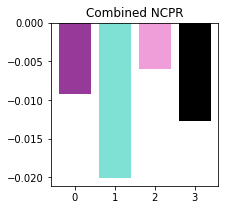

In [26]:
import seaborn as sbn 

mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

ncprallidrseq=[]
for a in range(0,len(location_accs)):  
    allidrseq=''
    for idx in range(0,len(fullaccs)):
        if fullaccs[idx] in location_accs[a]:
            allidrseq=allidrseq+myseqs[idx]
            
    SeqOb=SequenceParameters(allidrseq)
    ncprallidrseq.append(SeqOb.get_NCPR())
    print(mylocs[a])
    print(len(allidrseq))

f,(ax1) = plt.subplots(1,1,figsize = (3,3))
ax1.title.set_text("Combined NCPR")
ax1.bar(np.arange(0,len(mylocs),1),ncprallidrseq, color=mycolorlist)


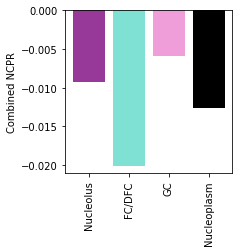

In [28]:
f,(ax1) = plt.subplots(1,1,figsize = (3,3))
ax1.set_ylabel("Combined NCPR")
ax1.bar(np.arange(0,len(mylocs),1),ncprallidrseq, color=mycolorlist)
plt.xticks(np.arange(0, len(mylocs), 1), mylocs,rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("ncpr_combined_idrs.pdf", transparent=True, bbox_inches = "tight") 

## Add in abundance

In [13]:
import seaborn as sbn 

mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]

mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']

# Load in abundance information
abundf=pd.read_excel('HeLa_Proteome.xlsx',sheet_name='Sheet1')
alist=abundf['fmol protein'].tolist()
u2list=abundf['Uniprot'].tolist()
g2list=abundf['Gene name'].tolist()

ncprallidrseq=[]
for a in range(0,len(location_accs)):  
    totPos=0
    totNeg=0
    totaas=0
    for f in range(0,len(fullaccs)):
        #print(f)
        if fullaccs[f] in location_accs[a]:
            currseq=myseqs[f]
            pos=[idx for idx, ltr in enumerate(u2list) if fullaccs[f] in ltr]
            if pos and round(alist[pos[0]])>1:
                tmpPos=currseq.count('R')+currseq.count('K')
                tmpNeg=currseq.count('D')+currseq.count('E')
                totPos=totPos+tmpPos*round(alist[pos[0]])
                totNeg=totNeg+tmpNeg*round(alist[pos[0]])
                totaas=totaas+len(currseq)*round(alist[pos[0]])
                #print(currseq)
                #print(len(currseq))
                #print(tmpPos)
                #print(tmpNeg)
                #print(totPos)
                #print(totNeg)
                #print(totaas)
                #print(alist[pos[0]])
                #hi
            else:
                tmpPos=currseq.count('R')+currseq.count('K')
                tmpNeg=currseq.count('D')+currseq.count('E')
                totPos=totPos+tmpPos
                totNeg=totNeg+tmpNeg
                totaas=totaas+len(currseq)
                

    tmpncpr=(totPos/totaas)-(totNeg/totaas)
    ncprallidrseq.append(tmpncpr)
    print(mylocs[a])
    print(totaas)
    print(tmpncpr)

Nucleolus
11958825
0.08131710264177291
FC/DFC
3934578
0.0598150551342482
GC
6822979
0.07583153927338776
Nucleoplasm
23033339
0.04600683383334045


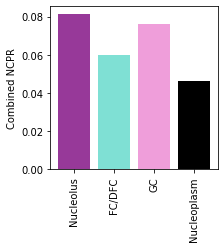

In [14]:
import matplotlib.pyplot as plt
import numpy as np

f,(ax1) = plt.subplots(1,1,figsize = (3,3))
ax1.set_ylabel("Combined NCPR")
ax1.bar(np.arange(0,len(mylocs),1),ncprallidrseq, color=mycolorlist)
plt.xticks(np.arange(0, len(mylocs), 1), mylocs,rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("ncpr_combined_idrs.pdf", transparent=True, bbox_inches = "tight") 

## Get |net charge| for each condensate

In [22]:
import math 
mylocs=['Nucleolus','FC/DFC','GC','Nucleoplasm']
location_accs=[accs_nuc, fcdfcacc, gcacc, nucleoplasmacc]
mycolorlist=['#973999', '#7fe0d4', '#ef9eda', 'black']


chargevallim=31.56334230871881 # z-score =3 for |net charge| for full human IDRome

condtype=[]
ncprlist=[]
meanncpr=[]
stencpr=[]
medianncpr=[]
ncprallidrseq=[]
frackallidrseq=[]
fracrallidrseq=[]
fracdallidrseq=[]
fraceallidrseq=[]
condcompare=[]
numhighnegall=[]
numhighposall=[]
ncprlistlog=[]
highchargeval=[]
highchargegene=[]
highchargeloc=[]
highchargelocnum=[]
for a in range(0,len(mylocs)):
    numhighneg=0
    numhighpos=0
    
    print(mylocs[a])
    # Get accessions
    accs_cond=location_accs[a]
    
    tmpncpr=[]
    allidrseq=''
    for f in range(0,len(fullaccs)):
        if fullaccs[f] in accs_cond:
            currseq=myseqs[f]
            #print(currseq)
            SeqOb = SequenceParameters(currseq)
            tmpfcr=SeqOb.get_FCR()
            tmpfcrz=(tmpfcr-meanvals_sapiens[28])/stdvals_sapiens[28]
            if tmpfcr>=0.0:
                allidrseq=allidrseq+currseq
                condtype.append(mylocs[a])
                SeqOb = SequenceParameters(currseq)
                tmpaafrac=SeqOb.get_amino_acid_fractions()
                tmpchargeval=tmpaafrac['K']*len(currseq)+tmpaafrac['R']*len(currseq)-tmpaafrac['D']*len(currseq)-tmpaafrac['E']*len(currseq)

                #tmpncpr.append(SeqOb.get_NCPR())
                tmpncpr.append(tmpchargeval)
                #ncprlist.append(SeqOb.get_NCPR())
                ncprlist.append(tmpchargeval)

                if tmpchargeval>0.9:
                    ncprlistlog.append(math.log10(tmpchargeval))
                elif tmpchargeval<-0.9:
                    ncprlistlog.append(-math.log10(-tmpchargeval))
                else:
                    ncprlistlog.append(0)
                    
                if tmpchargeval>=chargevallim or tmpchargeval<=-chargevallim:
                    print(mygenes[f])
                    print(currseq)
                    print((tmpaafrac['K']+tmpaafrac['R']-tmpaafrac['D']-tmpaafrac['E'])*len(currseq))
                    if tmpchargeval<=-chargevallim:
                        numhighneg=numhighneg+1
                    if tmpchargeval>=chargevallim:
                        numhighpos=numhighpos+1
                    highchargeval.append(tmpchargeval)
                    highchargegene.append(mygenes[f])
                    highchargeloc.append(mylocs[a])
                    highchargelocnum.append(a)
                if a == 0:
                    condcompare.append('Nucleolus')
                else:
                    condcompare.append('Condensate')
            
    meanncpr.append(np.mean(tmpncpr))
    stencpr.append(np.std(tmpncpr)/np.sqrt(len(tmpncpr)))
    medianncpr.append(np.median(tmpncpr))
    SeqOb = SequenceParameters(allidrseq)
    ncprallidrseq.append(SeqOb.get_NCPR())
    tmpaafrac=SeqOb.get_amino_acid_fractions()
    frackallidrseq.append(tmpaafrac['K'])
    fracrallidrseq.append(tmpaafrac['R'])
    fracdallidrseq.append(-tmpaafrac['D'])
    fraceallidrseq.append(-tmpaafrac['E'])
    numhighnegall.append(numhighneg)
    numhighposall.append(numhighpos)
    print(numhighnegall)
    print(numhighposall)
    print(max(ncprlistlog))
    print(len(allidrseq))
        
dfNCPR=pd.DataFrame()
dfNCPR['Condensate']=condtype
dfNCPR['NCPR']=ncprlistlog
dfNCPR['Compare']=condcompare

print(meanncpr)
print(dfNCPR)


Nucleolus
MYBBP1A IDR2
LGVQRPKLEKKDAKEIPSATQSPISKKRKKKGFLPETKKRKKRKSEDGTPAEDGTPAATGGSQPPSMGRKKRNRTKAKVPAQANGTPTTKSPAPGAPTRSPSTPAKSPKLQKKNQKPSQVNGAPGSPTEPAGQKQHQKALPKKGVLGKSPLSALARKKARL
31.999999999999996
MKI67 IDR19
LFSAPGHTEESMTIDKNTKIPCKSPPPELTDTATSTKRCPKTRPRKEVKEELSAVERLTQTSGQSTHTHKEPASGDEGIKVLKQRAKKKPNPVEEEPSRRRPRAPKEKAQPLEDLAGFTELSETSGHTQESLTAGKATKIPCESPPLEVVDTTASTKRHLRTRVQKVQVKEEPSAVKFTQTSGETTDADKEPAGEDKGIKALKESAKQTPAPAASVTGSRRRPRAPRESAQAIEDLAGFKDPAAGHTEESMTDDKTTKIPCKSSPELEDTATSSKRRPRTRAQKVEVKEELLAVGKLTQTSGETTHTDKEPVGEGKGTKAFKQPAKRKLDAEDVIGSRRQPRAPKEKAQPLEDLASFQELSQTPGHTEELANGAADSFTSAPKQTPDSGKPLKISRRVLRAPKVEPVGDVVSTRDPVKSQSKSNTSLPPLPFKRGGGKDGSVTGTKRLRCMPAPEEIVEELPASKKQRVAPRARGKSSEPVVIMKRSLRTSAKRIEPAEELNSNDMKTNKEEHKLQDSVPENKGISLRSRRQNKTEAEQQITEVFVLAERIEINRNEKKPMKTSPEMDIQNPDDGARKPIPRDKVTENKRCLRSARQNESSQPKVAEESGGQKSAKVLMQNQKGKGEAGNSDSMCLRSRKTKSQPAASTLESKSVQRVTRSVKRCAENPKKAEDNVCVKKIRTRSHRDSEDI
33.0
ERICH1 IDR1
MAAHRKHVFVEKVLQRLFPPVPSGQGKREPQTLAVQNPPKKVTSEKVSQKHAEPLTDTGSETPTARRLYTASGP

UTP3 IDR1
MVGRSRRRGAAKWAAVRAKAGPTLTDENGDDLGLPPSPGDTSYYQDQVDDFHEARSRAALAKGWNEVQSGDEEDGEEEEEEVLALDMDDEDDEDGGNAGEEEEEENADDDGGSSVQSEAEASVDPSLSWGQRKKLYYDTDYGSKSRGRQSQQEAEEEEREEEEEAQI
-35.0
ZNF142 IDR3
QLRYASQEPEGAMQGPTPPPDSEPSNQLSARPEGPGHEPGTVVDPSLDQALPEMSEEVNTGRQEGSEAPHGGDLGGSPSPAEVEEGSCTLHLEALGVELESVTEPPLEEVTETAPMEFRPLGLEGPDGLEGPELSSFEGIGTSDLSAEENPLLEKPVSEPSTNPPSLEEAPNNWVGTFKTTPPAETAPLPPLPESESLL
-34.0
AATF IDR2
KTTSRKAWNEDHWEQTLPGSSDEEISDEEGSGDEDSEGLGLEEYDEDDLGAAEEQECGDHRESKKSRSHSAKTPGFSVQSISDFEKFTKGMDDLGSSEEEEDEESGMEEGDDAEDSQGESEEDRAGDRNSEDDGVV
-37.00000000000001
HOMEZ IDR6
PAEVVVCLDEEEEEEEEELPEDDEEEEEEEEEDDDDDDDDVIIQD
-31.999999999999996
DDX54 IDR3
GDEAQNLTRGRQQLKWDRKKKRFVGQSGQEDKKKIKTESGRYISSSYKRDLYQKWKQKQKIDDRDSDEEGASDRRGPERRGGKRDRGQGASRPHAPGTPAGRVRPELKTKQQILKQRRRAQKLHFLQRGGLKQLSARNRRRVQELQQGAFGRGARSKKGKMRKRM
33.0
ZNF428 IDR1
MTETREPAETGGYASLEEDDEDLSPGPEHSSDSEYTLSEPDSEEEEDEEEEEEETTDDPEYDPGYKVKQRLGGGRGGPSRRAPRAAQPPAQPCQLCGRSPLGEAPPGTPPCRLCCPATAPQEAPAPEGRALGEEEEEPPRAGEGRPAGREEEEEEEEEGTY

RBM28 IDR2
DTQSVSAIGEEKSHESKHQESVKKKGREEEDMEEEENDDDDDDDDEEDGVFDDEDEEEENIESKVTKPVQIQKRAVKRPAPAKSSDHSEEDSDLEESDSIDDGEELAQSDTSTEEQEDKAVQVSNKKKRKLPSD
-32.0
FKBP15 IDR5
VTLQLLNQQEQEKEESSSEEEEEKAEERPRRPSQEQSASASSGQPQAPLNRERPESPMVPSEQVVEEAVPLPPQALTTSQDGHRRKGDSEAEALSEIKDGSLPPELSCIPSHRVLGPPTSIPPEPLGPVSMDSECEESLAASPMAAKPDNPSGKVCVREVAPDGPLQESSTRLSLTSDPEEGDPLALGPESPGEPQPPQLKKDDVTSSTGPHKELSSTEAGSTVAGAALRPSHHSQRSSLSGDEEDELFKGATLKALRPKAQPEEEDEDEVSMKGRPPPTPLFGDDDDDDDIDWLG
-36.0
MPHOSPH10 IDR2
MEAYLENIEKEEERKDDNDEEEEDIDFFEDIDSDEDEGGLFGSKKLKSGKSSRNLKYKDFFDPVESDEDITNVHDDELDSNKEDDEIAEEEAEELSISETDEDDDLQENEDNKQHKESLKRVTFALPDDAETEDTGVLNVKKNSDEVKSSFEKRQEKMNE
-40.0
SCAF11 IDR4
PMECDSFCSDQNESEVEPSVNADLKQMNENSVTHCSENNMPSSDLADEKVETVSQPSESPKDTIDKTKKPRTRRSRFHSPSTTWSPNKDTPQEKKRPQSPSPRRETGKESRKSQSPSPKNESARGRKKSRSQSPKKDIARERRQSQSRSPKRDTTRESRRSESLSPRRETSRENKRSQPRVKDSSPGEKSRSQSRERESDRDGQRRERERRTRKWSRSRSHSRSPSRCRTKSKSSSFGRIDRDSYSPRWKGRWANDGWRCPRGNDRYRKNDPEKQNENTRKEKNDIHLDADDPNSADKHRNDCPNWITEKINSGPDPRTRNPEKLKESHWEENRNENSG

KMT2D IDR2
CQGQPKGGHVTSMQPKEPGPLQCEAKPLGKAGVQLEPQLEAPLNEEMPLLPPPEESPLSPPPEESPTSPPPEASRLSPPPEELPASPLPEALHLSRPLEESPLSPPPEESPLSPPPESSPFSPLEESPLSPPEESPPSPALETPLSPPPEASPLSPPFEESPLSPPPEELPTSPPPEASRLSPPPEESPMSPPPEESPMSPPPEASRLFPPFEESPLSPPPEESPLSPPPEASRLSPPPEDSPMSPPPEESPMSPPPEVSRLSPLPVVSRLSPPPEESPLSPPPEESPTSPPPEASRLSPPPEDSPTSPPPEDSPASPPPEDSLMSLPLEESPLLPLPEEPQLCPRSEGPHLSPRPEEPHLSPRPEEPHLSPQAEEPHLSPQPEEPCLCAVPEEPHLSPQAEGPHLSPQPEELHLSPQTEEPHLSPVPEEPCLSPQPEESHLSPQSEEPCLSPRPEESHLSPELEKPPLSPRPEKPPEEPGQCPAPEELPLFPPPGEPSLSPLLGEPALSEPGEPPLSPLPEELPLSPSGEPSLSPQLMPPDPLPPPLSPIITAAAPPALSPLGELEYPFGAKGDSDPESPLAAPILETPISPPPEANCTDPEPVPPMILPPSPGSPVGPASPILMEPLPPQCSPLLQHSLVPQNSPPSQCSPPALPLSVPSPLSPIGKVVGVSDEAELHEMETEKVSEPECPALEPSATSPLPSPMGDLSCPAPSPAPALDDFSGLGEDTAPLDGIDAPGSQPEPGQTPGSLASELKGSPVLLDPEELAPVTPMEVYPECKQTAGQGSPCEEQEEPRAPVAPTPPTLIKSDIVNEISNLSQGDASASFPGSEPLLGSPDPEGGGSLSMELGVSTDVSPARDEGSLRLCTDSLPETDDSLLCDAGTAISGGKAEGEKGRRRSSPARSRIKQGRSSSFPGRRRPRGGAHGGRGRGRARLKSTASSIETLVVADIDSSPSKEEEEEDDDTMQ
-117.0000000000000

MAGEC1 IDR2
SPERTHSTFEGFPQSPLQIPVSSSSSSSTLLSLFQSSPECTQSTFEGFPQSPLQIPQSPPEGENTHSPLQIVPSLPEWEDSLSPHYFPQSPPQGEDSLSPHYFPQSPPQGEDSLSPHYFPQSPQGEDSLSPHYFPQSPPQGEDSMSPLYFPQSPLQGEEFQSSLQSPVSICSSSTPSSLPQSFPESSQSPPEGPVQSPLHSPQSPPEGMHSQSPLQSPESAPEGEDSLSPLQIPQSPLEGEDSLSSLHFPQSPPEWEDSLSPLHFPQFPPQGEDFQSSLQSPVSICSSSTSLSLPQSFPESPQSPPEGPAQSPLQRPVSSFFSYTLASLLQSSHESPQSPPEGPAQSPLQSPVSSFPSSTSSSLSQSSPVSSFPSSTSSSLSKSSPESPLQSPVISFSSSTSLSPFSEESSSPVDEYTSSSDTLLESDSLTDSESLIE
-46.0
ANAPC15 IDR1
ETELQQQEQQHQAWLQSIAEKDNNLVPIGKPASEHYDDEEEEDDEDDEDSEEDSEDDEDMQDMDEMNDYNESPDDGEVNEVDMEGNEQDQDQWMI
-38.99999999999999
HNRNPU IDR1
MSSSPVNVKKLKVSELKEELKKRRLSDKGLKAELMERLQAALDDEEAGGRPAMEPGNGSLDLGGDSAGRSGAGLEQEAAAGGDEEEEEEEEEEEGISALDGDQMELGEENGAAGAADSGPMEEEEAASEDENGDDQGFQEGEDELGDEEEGAGDENGHGEQQPQPPATQQQQPQQQRGAAKEAAGKSSGPTSLFAVTVAPPGARQGQQQAGGKKKAEGGGGGGRPGAPAAGDGKTEQKGGDKKRGVKRPREDHGRGYFEYIEENKYSRAKSPQPPVEEEDEH
-35.0
NRDC IDR2
ISDLSNMEGKTGNTTDDEEEEEVEEEEDDDEDSGAEIEDDDEEGFDDEDEFDDEHDDDLDTEDNELEELEERAEARKKTTEKQS
-40.0
DAXX IDR3
LDE

SETSIP IDR3
GADELEEVIKDDIWPNPLQYYLVPDMDDEEGGEDDDDDDDDGDEGEEELEDIDEGDEDEGEEDEDDDEGEEGEEDEGEDD
-49.0
CLSPN IDR5
RRFEERQKRQALFKLDNEDGFEEEEEEEEEMTDESEEDGEEKVEKEEKEEELEEEEEKEEEEEEEGNQETAEFLLSSEEIETKDEKEMDKENNDGSSEIGKAVGFLSV
-37.0
MIER1 IDR1
MAEPSVESSSPGGSATSDDHEFDPSADMLVHDFDDERTLEEEEMMEGETNFSSEIEDLAREGDMPIHELLSLYGYGSTVRLPEEDEEEEEEEEEGEDDEDADNDDNSGCSGENKEENIKDSSGQEDETQSSNDDPSQSVASQDAQEIIRPRRCKYFDTNSEVEEESEEDEDYIPSED
-57.00000000000001
H1-0 IDR1
QTKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKAASKAPTKKPKATPVKKAKKKLAATPKKAKKPKTVKAKPVKASKPKKAKPVKPKAKSSAKRAGKKK
42.0
C2orf16 IDR4
AQQPRRAYSFQPRPLRLPKPTDSQSGIAFQTASVGQPLRTVQKDSSSRSKKNFYRNETSSQESKNLSTPGTRVQARGRILPGSPVKRTWHRHLKDKLTHKEHNHPSFYRERTPRGPSERTRHNPSWRNHRSPSERSQRSSLERRHHSPSQRSHCSPSRKNHSSPSERSWRSPSQRNHCSPPERSCHSLSERGLHSPSQRSHRGPSQRRHHSPSERSHRSPSERSHRSSSERRHRSPSQRSHRGPSERSHCSPSERRHRSPSQRSHRGPSERRHHSPSKRSHRSPARRSHRSPSERSHHSPSERSHHSPSERRHHSPSERSHCSPSERSHCSPSERRHRSPSERRHHSPSEKSHHSPSERSHHSPSERRRHSPLERSRHSLLERSHRSPSERRSHRSFERSHRRISERSHSPSEKSHLSPLERSRCS

SRSF8 IDR1
ARYGRRDLPRSRQGEPRGRSRGGGYGRRSRSYGRRSRSPRRRHRSRSRGPSCSRSRSRSRYRGSRYSRSPYSRSPYSRSRYSRSPYSRSRYRESRYGGSHYSSSGYSNSRYSRYHSSRSHSKSGSSTSSRSASTSKSSSARRSKSSSVSRSRSRSRSSSMTRSPPRVSKRKSKSRSRSKRPPKSPEEEGQMSS
52.99999999999999
CENPB IDR2
FGGGPNATITTSLKSEGEEEEEEEEEEEEEEGEGEEEEEEGEEEEEEGGEGEELGEEEEVEEEGDVDSDEEEEEDEESSSEGLEAEDWAQGVVEAGGSFGAYGAQEEAQCPTLHFLEGGEDSDSDSEEEDDEEEDDEDEDDDDDEEDGDEVPVPSF
-83.0
NEFL IDR1
SHVQEEQIEVEETIEAAKAEEAKDEPPSEGEAEEEEKDKEEAEEEEAAEEEEAAKEESEEAKEEEEGGEGEEGEETKEAEEEEKKVEGAGEEQAAKKKD
-37.0
URI1 IDR1
QEELLGELDSKPDTVIANGEDTTSSEEEKEDRNTNVNAMHQVTDSHTPCHKDVASSEPFSGQVNSQLNCSVNGSSSYHSDDDDDDDDDDDDDNIDDDDGDNDHEALGVGDNSIP
-32.0
UNC79 IDR2
FEVKVDSPVKPAPKEDLDLIDLSSDSTSGPEKHSILSTSDSDSLVFEPLPPLRIVESDEEEETMNQGDDGPSGKNAASSPSVPSHPSVLSLSTAPLVQVSVEDCSKDFSSKDSGNNQSAGNTDSALITLEDPMDAEGSSKPEELPEFSCGSPLTLKQKRDLLQKSFALPEMSLDDHPDPGTEGEKPGELMPSSGAKTVLLKVPEDAENPTESEKPDTSAESDTEQNPERKVEEDGAEESEFKIQIVPRQRKQ
-32.0
PALM3 IDR4
ELLVEGLEGPEVAGRERGDESPLGAEGAKTGGGEETWEAEKRKAEESMGIGSEEKPGTGRDEAEMSPVVERKGGE

## Plot |Net charge| by condensate

[-0.009216489809211062, -0.02007228353800715, -0.005932415721709893, -0.012663285063677766]


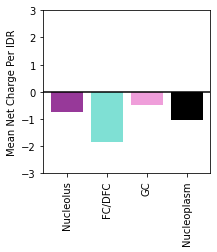

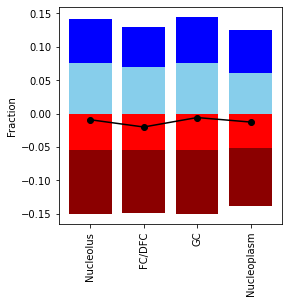

In [23]:
f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (3,3))
ax1.set_ylabel("Mean Net Charge Per IDR")
ax1.bar(np.arange(0,len(mylocs),1),meanncpr, color=['#973999', '#7fe0d4', '#ef9eda', 'black'])
#ax1.bar(np.arange(0,2,1),meanncpr[1:3], color=['#7fe0d4', '#ef9eda'])
plt.xticks(np.arange(0, len(mylocs), 1), mylocs,rotation=90) 
plt.axhline(y = 0.0, color = 'black', linestyle = '-')
plt.ylim([-3,3])

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/mean_net_charge_idrs_by_condensate.pdf", transparent=True, bbox_inches = "tight") 

plt.figure(figsize=(4,4))

plt.bar(mylocs, frackallidrseq, color='skyblue')
plt.bar(mylocs, fracrallidrseq, bottom=frackallidrseq, color='b')
plt.xticks(np.arange(0, len(mylocs), 1), mylocs,rotation=90) 
#plt.show()

plt.bar(mylocs, fracdallidrseq, color='r')
plt.bar(mylocs, fraceallidrseq, bottom=fracdallidrseq, color='darkred')
plt.xticks(np.arange(0, len(mylocs), 1), mylocs,rotation=90) 
plt.ylabel('Fraction')

print(ncprallidrseq)
plt.plot(mylocs,ncprallidrseq,color='k',marker='o')
plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("fraction_charge_residues_combined_idrs.pdf", transparent=True, bbox_inches = "tight") 

## Plot highest net charge proteins

             Gene  Charge     Location  LocNum
140   CLASRP IDR2    80.0  Nucleoplasm       3
149  C2orf16 IDR4    77.0  Nucleoplasm       3
46     RSRC2 IDR1    66.0       FC/DFC       1
201    SREK1 IDR1    59.0  Nucleoplasm       3
135     NKTR IDR1    58.0  Nucleoplasm       3
..            ...     ...          ...     ...
104     IWS1 IDR1  -114.0  Nucleoplasm       3
85     KAT6B IDR5  -115.0  Nucleoplasm       3
89     KMT2D IDR2  -117.0  Nucleoplasm       3
59     PELP1 IDR2  -126.0       FC/DFC       1
66      MDN1 IDR2  -150.0           GC       2

[159 rows x 4 columns]
[-34.529411764705884, -36.68181818181818, -24.508333333333333]


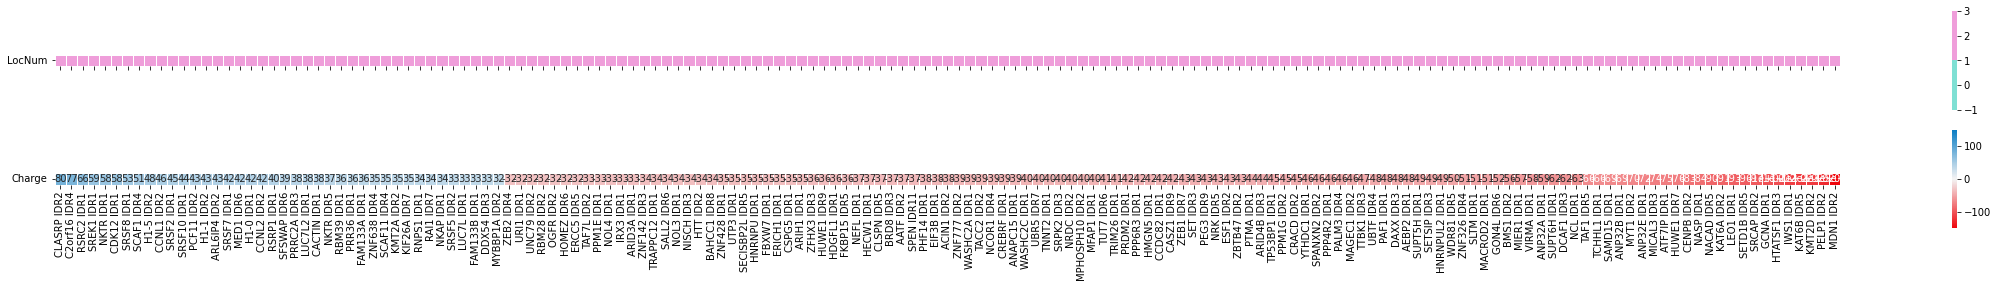

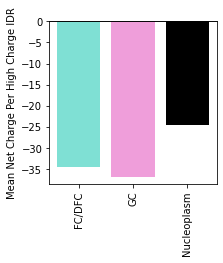

In [24]:
import seaborn as sbn 
import matplotlib

dfhc=pd.DataFrame()
dfhc['Gene']=highchargegene
dfhc['Charge']=highchargeval
dfhc['Location']=highchargeloc
dfhc['LocNum']=highchargelocnum

dfhc = dfhc[dfhc['Location'].str.contains('Nucleolus') == False]
#dfhc = dfhc[dfhc['Location'].str.contains('Nucleoplasm') == False]

final_dfhc = dfhc.sort_values(by=['Charge','Gene'], ascending=False)
print(final_dfhc)

mybwr=sbn.diverging_palette(12, 246, s=99, l=50, sep=5, n=6, center='light', as_cmap=True)
colorsList = ['#7fe0d4', '#ef9eda']
loccmap = matplotlib.colors.ListedColormap(colorsList)

f,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (40, 4))
g2 = sbn.heatmap(final_dfhc[['Charge']].T,cmap=mybwr,cbar=True,ax=ax2,vmin=-150,vmax=150,square=True, linewidth=.5,cbar_kws={"orientation": "vertical"},annot=True)
g1 = sbn.heatmap(final_dfhc[['LocNum']].T,cmap=loccmap,cbar=True,ax=ax1,vmin=-1,vmax=3,square=True, linewidth=.5,cbar_kws={"orientation": "vertical"},annot=False)
ax1.tick_params(labelrotation=0)
ax2.tick_params(labelrotation=0)
plt.xticks(np.arange(0.5, len(final_dfhc['Gene'].tolist()), 1), final_dfhc['Gene'].tolist(),rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/net_charge_idrs_zscore_gte_3_by_condensate.pdf", transparent=True, bbox_inches = "tight") 

mysublocs=['FC/DFC','GC','Nucleoplasm']
ncprhighfc=[]
ncprhighgc=[]
ncprhighnucleoplasm=[]
for i in range(0,len(highchargeval)):
    if highchargeloc[i]=='FC/DFC':
        ncprhighfc.append(highchargeval[i])
    if highchargeloc[i]=='GC':
        ncprhighgc.append(highchargeval[i])
    if highchargeloc[i]=='Nucleoplasm':
        ncprhighnucleoplasm.append(highchargeval[i])

meanhighncpr=[]  
meanhighncpr.append(np.mean(ncprhighfc))
meanhighncpr.append(np.mean(ncprhighgc))
meanhighncpr.append(np.mean(ncprhighnucleoplasm))

print(meanhighncpr)

f,(ax1) = plt.subplots(1,1,sharey=True,figsize = (3,3))
ax1.set_ylabel("Mean Net Charge Per High Charge IDR")
ax1.bar(np.arange(0,len(mysublocs),1),meanhighncpr, color=['#7fe0d4', '#ef9eda', 'black'])
plt.xticks(np.arange(0, len(mysublocs), 1), mysublocs,rotation=90) 
plt.axhline(y = 0.0, color = 'black', linestyle = '-')
#plt.ylim([-3,3])

## Plot highest Net Charge IDRs sorted

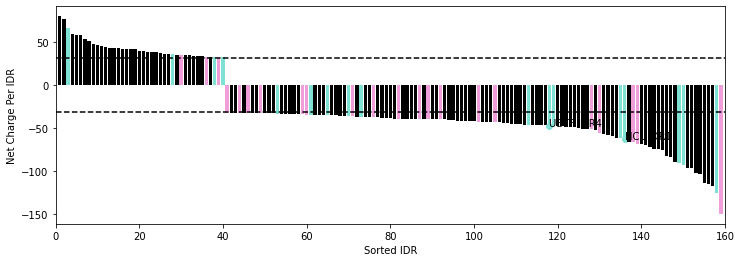

In [25]:
anclim=31.56334230871881 # z-score =3 for |net charge| for full human IDRome


sortedhighchargeval=final_dfhc['Charge'].tolist()
sortedhighchargelocnum=final_dfhc['LocNum'].tolist()
sortedhighchargegene=final_dfhc['Gene'].tolist()
#x=np.arange(1, len(sortedhighchargeval)+1, 1)
#plt.scatter(x,sortedhighchargeval,s=50)
#plt.bar(x,sortedhighchargeval)

colorsList = ['#973999', '#7fe0d4', '#ef9eda', 'black']
labelList = ['NCL IDR1','UBTF IDR4','NPM1 IDR1']
plt.figure(figsize = (12, 4)) 
for i in range(0,len(sortedhighchargeval)):
    #plt.scatter(i+1,sortedhighchargeval[i],s=50,color=colorsList[sortedhighchargelocnum[i]])
    plt.bar(i+1,sortedhighchargeval[i],color=colorsList[sortedhighchargelocnum[i]])
    if sortedhighchargegene[i] in labelList:
        plt.text(i+1,sortedhighchargeval[i],sortedhighchargegene[i])
        plt.scatter(i+1,sortedhighchargeval[i],s=35,color=colorsList[sortedhighchargelocnum[i]])
    
plt.xlim([0,len(sortedhighchargeval)+1])
plt.ylabel('Net Charge Per IDR')
plt.xlabel('Sorted IDR')

plt.axhline(y = anclim, color = 'k', linestyle = '--')
plt.axhline(y = -anclim, color = 'k', linestyle = '--')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_07/sorted_net_charge_idrs_zscore_gte_3_by_condensate_bar.pdf", transparent=True, bbox_inches = "tight") 


## Plot NCPR/Net charge for various condensates

(6.48, 6.7, 7.12, 7.48)
0.9705583195066616
(6.48, 6.7, 7.12, 7.48)
0.9638930560001947


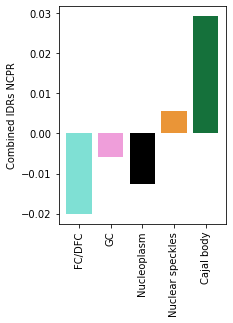

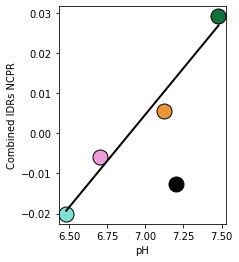

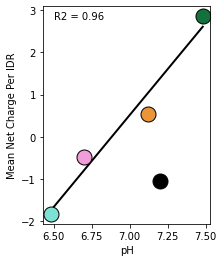

In [48]:
from operator import itemgetter
from sklearn.metrics import r2_score 

mysublocs=['FC/DFC','GC','Nucleoplasm','Nuclear speckles','Cajal body']
ph=[6.48, 6.7, 7.2, 7.12, 7.48]
#FC/DFC 6.48, GC	6.7, Nuclear Speckle 7.12, Cajal Body 7.48 Nucleoplasm is 7.2
comncpridrs=[-0.02007228353800715, -0.005932415721709893, -0.01266328506367776, 0.005530349202049615, 0.029116868532926925];
mnetchargeidrs=[-1.8315602836879432, -0.469910371318822, -1.0393956351426972, 0.5378704720087816, 2.858267716535433]

plt.figure(figsize = (3, 4)) 
plt.bar(np.arange(0,len(comncpridrs),1),comncpridrs,color=['#7fe0d4', '#ef9eda', 'black','#ea9537', '#15713b'])
plt.ylabel('Combined IDRs NCPR')
plt.xticks(np.arange(0, len(mysublocs), 1), mysublocs,rotation=90) 

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/ncpr_combined_idrs_fc_gc_nucleoplasm_speckles_cajal.pdf", transparent=True, bbox_inches = "tight") 


# Mean Combined NCPR
plt.figure(figsize = (3, 4)) 
colorlist=['#7fe0d4', '#ef9eda', 'black','#ea9537', '#15713b']
for i in range(0,len(ph)):
    plt.plot(ph[i],comncpridrs[i],'o',markerfacecolor=colorlist[i],markeredgecolor='black',markersize=15)
plt.ylabel('Combined IDRs NCPR')
plt.xlabel('pH')

# Fit without including nucleoplasm
x=itemgetter(0,1,3,4)(ph)
y=itemgetter(0,1,3,4)(comncpridrs)
print(x)
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.plot(x,poly1d_fn(x),'-k',linewidth=2)
r2 = r2_score(y, poly1d_fn(x))
print(r2)

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/ncpr_combined_idrs_fc_gc_nucleoplasm_speckles_cajal_vs_ph.pdf", transparent=True, bbox_inches = "tight") 


# Mean Net Charge per IDR
plt.figure(figsize = (3, 4)) 
colorlist=['#7fe0d4', '#ef9eda', 'black','#ea9537', '#15713b']
# Fit without including nucleoplasm
x=itemgetter(0,1,3,4)(ph)
y=itemgetter(0,1,3,4)(mnetchargeidrs)
print(x)
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
plt.plot(x,poly1d_fn(x),'-k',linewidth=2)
r2 = r2_score(y, poly1d_fn(x))
print(r2)
plt.text(6.5,2.8,'R2 = '+str(round(r2,2)))

# Plot all points
for i in range(0,len(ph)):
    plt.plot(ph[i],mnetchargeidrs[i],'o',markerfacecolor=colorlist[i],markeredgecolor='black',markersize=15)
plt.ylabel('Mean Net Charge Per IDR')
plt.xlabel('pH')


plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/mean_net_charge_per_idr_fc_gc_nucleoplasm_speckles_cajal_vs_ph.pdf", transparent=True, bbox_inches = "tight") 


## Without nucleoplasm

In [97]:
#nucleoplasmacc nsacc cbacc
print(len(nucleoplasmacc))
print(len(nsacc))
print(len(cbacc))
lst3 = [value for value in nucleoplasmacc if value in nsacc]
print(lst3)
print(len(lst3))

lst4 = [value for value in nucleoplasmacc if value in cbacc]
print(lst4)
print(len(lst4))

lst5 = [value for value in nsacc if value in cbacc]
print(lst5)
print(len(lst5))

5260
479
76
['Q6DHV7', 'Q6QNK2', 'Q9NZN9', 'Q3KP44', 'O43299', 'Q99728', 'Q92843', 'Q92843', 'Q8NFJ8', 'P25440', 'Q9H6J7', 'Q8WUQ7', 'A6NNP5', 'P49427', 'Q9NYV4', 'O14627', 'Q8TDI0', 'Q16630', 'Q9UI36', 'Q14185', 'O00716', 'Q8IY85', 'Q96KQ7', 'Q8N336', 'Q9UPW0', 'Q8WWW8', 'O75600', 'P56915', 'P16104', 'P56524', 'Q8TDG4', 'Q5TA89', 'Q96MH2', 'Q53FT3', 'P31267', 'P40933', 'Q8NA54', 'P61371', 'Q8WYK2', 'Q674X7', 'Q9UIH9', 'Q8IYA7', 'Q8NEH6', 'O96007, O96033', 'Q86XI2', 'Q9Y4Z2', 'Q8NFH3', 'Q86U42', 'Q5JUK9', 'Q86YC2', 'Q53H76', 'Q6DJT9', 'O15514', 'Q12972', 'Q6IN85', 'Q5MIZ7', 'Q9H6K5', 'Q7Z5L2', 'Q9NS91', 'Q96IS3', 'Q14498', 'Q9NZ71', 'P31949', 'Q9BY12', 'Q15459', 'Q12874', 'Q5VUG0', 'Q9UPX8', 'Q9UHJ6', 'Q9H0K1', 'Q9NRC8', 'Q06495', 'O95391', 'Q2TAL5', 'P09661', 'Q8WXA9', 'O60347', 'O95759', 'Q99081', 'O14746', 'Q86W42', 'P26368', 'Q8TAS1', 'Q70EL4', 'P49750', 'A6NP61', 'Q99592', 'Q14929', 'Q7Z340', 'Q96MR9', 'Q8N393', 'O75541', 'Q8N446']
93
['Q5VTE6', 'Q7Z6G8', 'Q9Y4X5', 'P50991', 'P509

## Get domains of D/E-tract proteins

In [30]:
# Load in PFAM mapping
dfpfrna=pd.read_table('/project/fava/work/kiersten.ruff/Programs/CDD/RNA_binding/pfam_RNA_w_header.txt')
print(dfpfrna)

dfpfdna=pd.read_table('/project/fava/work/kiersten.ruff/Programs/CDD/DNA_binding/pfam_DNA_w_header.txt')
print(dfpfdna)

# Load in full CDD functional data
dfcddfull=pd.read_table('/project/fava/work/kiersten.ruff/Programs/CDD/cddannot_add_header.dat')
fullcddlist=dfcddfull['CDD'].tolist()
fullcddsn=dfcddfull['Short name'].tolist()

# Load in CDD mapping
dfcdrna=pd.read_table('/project/fava/work/kiersten.ruff/Programs/CDD/RNA_binding/cdd_RNA.tsv')
print(dfcdrna)

dfcddna=pd.read_table('/project/fava/work/kiersten.ruff/Programs/CDD/DNA_binding/cdd_DNA.tsv')
print(dfcddna)

# Load in D/E tract proteins domains
dfcdd=pd.read_table('CDD/nucleolar_DEtract_containing_proteins_CDD_no_header.txt')
print(dfcdd)

# Map to whether each unique domain is a RNA or DNA tract protein
dfcdd1 = dfcdd.drop_duplicates(subset=['Accession'], keep='first') 
print(dfcdd1)

cddacc=dfcdd1['Accession'].tolist()
cddsn=dfcdd1['Short name'].tolist()
cddsf=dfcdd1['Superfamily'].tolist()

isRNA=[]
isDNA=[]
for i in range(0,len(cddacc)):
    tmpacc=cddacc[i]
    if tmpacc[0:2]=='cd' and tmpacc in fullcddlist:
        if tmpacc in dfcddna['CDD'].tolist():
            isDNA.append('YES')
        else:
            isDNA.append('NO')

        if tmpacc in dfcdrna['CDD'].tolist():
            isRNA.append('YES')
        else:
            isRNA.append('NO')
    elif tmpacc[0:2]=='cd' and tmpacc not in fullcddlist:
        isDNA.append('NS')
        isRNA.append('NS')
    elif tmpacc[0:4]=='pfam':
        if tmpacc in dfpfdna['PFAM_DNA'].tolist():
            isDNA.append('YES')
        else:
            isDNA.append('NO')

        if tmpacc in dfpfrna['PFAM_RNA'].tolist():
            isRNA.append('YES')
        else:
            isRNA.append('NO')
    else:
        isDNA.append('NS')
        isRNA.append('NS')
        
dfmapbp=pd.DataFrame()
dfmapbp['Accession']=cddacc
dfmapbp['Short name']=cddsn
dfmapbp['Superfamily']=cddsf
dfmapbp['Is DNA']=isDNA
dfmapbp['Is RNA']=isRNA

print(dfmapbp)
#dfmapbp.to_csv('CDD/DNA_or_RNA_binding_check.tsv', sep="\t")

      PFAM_RNA
0    pfam01918
1    pfam12328
2    pfam04326
3    pfam04232
4    pfam05833
..         ...
111  pfam18859
112  pfam00312
113  pfam00458
114  pfam02942
115  pfam00600

[116 rows x 1 columns]
      PFAM_DNA
0    pfam04690
1    pfam00505
2    pfam06244
3    pfam08073
4    pfam09011
..         ...
655  pfam02362
656  pfam18243
657  pfam05833
658  pfam06831
659  pfam00416

[660 rows x 1 columns]
     Unnamed: 0      CDD       Short name
0             0  cd00048          DSRM_SF
1             1  cd00164          S1_like
2             2  cd00165               S4
3             3  cd00236  FinO_conjug_rep
4             4  cd00259             STNV
..          ...      ...              ...
527         527  cd23230   Rabovirus_RdRp
528         528  cd23231  Avisivirus_RdRp
529         529  cd23232  Crohivirus_RdRp
530         530  cd23517          Cas12i1
531         531  cd23518          Cas12i2

[532 rows x 3 columns]
     Unnamed: 0      CDD       Short name
0             0  cd000

## Load in information with RNA and DNA binding domains

['ARID5A', 'DEAF1', 'SOWAHB', 'ZFHX2', 'ZFHX2', 'ZFHX2', 'ZFHX2', 'DDX41', 'MTUS1', 'PES1', 'RBM28', 'RBM28', 'RBM28', 'RBM28', 'RBM28', 'TOP2A', 'BCL11B', 'BCL11B', 'BCL11B', 'BCL11B', 'FKBP15', 'DDX24', 'NOP58', 'WASHC2C', 'DHX57', 'DHX57', 'RBL2', 'RBL2', 'UBTF', 'UBTF', 'UBTF', 'UBTF', 'UBTF', 'UBTF', 'HMGB3', 'HMGB3', 'MYCN', 'BEND4', 'BEND4', 'ZEB1', 'ZEB1', 'ZEB1', 'ZEB1', 'ZEB1', 'ZEB1', 'ZEB1', 'MNX1', 'NOP2', 'ZEB2', 'ZEB2', 'ZEB2', 'ZEB2', 'ZEB2', 'LBX1', 'ZMYND8', 'ZMYND8', 'CHD3', 'RBM19', 'RBM19', 'RBM19', 'RBM19', 'RBM19', 'RBM19', 'DDX10', 'WASHC2A', 'IRX2', 'HMGB2', 'HMGB2', 'MSH5', 'GZF1', 'NCL', 'NCL', 'NCL', 'NCL', 'PRDM10', 'PRDM10', 'NACC2', 'TRERF1', 'TRERF1', 'TRERF1', 'HOMEZ', 'HOMEZ', 'HOMEZ', 'DDX54', 'GTF3C1', 'GTF3C1', 'GTF3C1', 'BMS1', 'NKX1-1', 'ZNF622', 'ZNF622', 'NOM1', 'CHD1', 'CHD1', 'CHD1', 'CHD1', 'CHD1', 'SMARCA4', 'ZFP91']
   Accession    Gene Location Is DNA Is RNA
16    Q9C0K0  BCL11B       FC    YES     NO
17    Q9C0K0  BCL11B       FC    YES  

([<matplotlib.axis.XTick at 0x153aa0b8a7d0>,
 [Text(0.5, 0, 'BCL11B'),
  Text(1.5, 0, 'BEND4'),
  Text(2.5, 0, 'CHD1'),
  Text(3.5, 0, 'DEAF1'),
  Text(4.5, 0, 'MSH5'),
  Text(5.5, 0, 'NKX1-1'),
  Text(6.5, 0, 'PRDM10'),
  Text(7.5, 0, 'SMARCA4'),
  Text(8.5, 0, 'SOWAHB'),
  Text(9.5, 0, 'TRERF1'),
  Text(10.5, 0, 'UBTF'),
  Text(11.5, 0, 'ZFHX2'),
  Text(12.5, 0, 'NCL'),
  Text(13.5, 0, 'NOP58'),
  Text(14.5, 0, 'ARID5A'),
  Text(15.5, 0, 'CHD3'),
  Text(16.5, 0, 'FKBP15'),
  Text(17.5, 0, 'GTF3C1'),
  Text(18.5, 0, 'GZF1'),
  Text(19.5, 0, 'HMGB2'),
  Text(20.5, 0, 'HMGB3'),
  Text(21.5, 0, 'HOMEZ'),
  Text(22.5, 0, 'IRX2'),
  Text(23.5, 0, 'LBX1'),
  Text(24.5, 0, 'MNX1'),
  Text(25.5, 0, 'MTUS1'),
  Text(26.5, 0, 'MYCN'),
  Text(27.5, 0, 'NACC2'),
  Text(28.5, 0, 'TOP2A'),
  Text(29.5, 0, 'WASHC2A'),
  Text(30.5, 0, 'WASHC2C'),
  Text(31.5, 0, 'ZEB1'),
  Text(32.5, 0, 'ZEB2'),
  Text(33.5, 0, 'ZFP91'),
  Text(34.5, 0, 'ZMYND8'),
  Text(35.5, 0, 'ZNF622'),
  Text(36.5, 0, 'BMS1'),
 

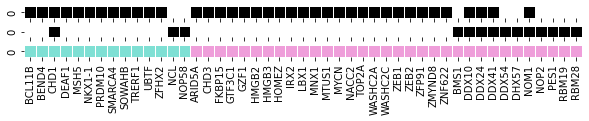

In [31]:
# Load in D/E tract proteins domains
dfcdd=pd.read_table('CDD/nucleolar_DEtract_containing_proteins_CDD_no_header.txt')
#print(dfcdd)
cddacc=dfcdd['Accession'].tolist()
cddsn=dfcdd['Short name'].tolist()
cddsf=dfcdd['Superfamily'].tolist()
cddq=dfcdd['Query'].tolist()

# Load in DNA and RNA binding domains
dfbp=pd.read_table('CDD/DNA_or_RNA_binding_check_hand_edited.tsv')
bpacc=dfbp['Accession'].tolist()
bpDNA=dfbp['Is DNA'].tolist()
bpRNA=dfbp['Is RNA'].tolist()

tmploc=[]
tmpacclist=[]
tmpgenelist=[]
isDNAlist=[]
isRNAlist=[]
DNAbindingacc=[]
RNAbindingacc=[]
for i in range(0,len(cddq)):
    tmp=cddq[i].split('|')
    tmpacc=tmp[1]

    idx=bpacc.index(cddacc[i])
    if bpDNA[idx]=='YES' or bpRNA[idx]=='YES':
        tmpacclist.append(tmpacc)
        idx2=fullaccs.index(tmpacc)
        tmpgene=mygenes[idx2].split(' ')
        tmpgenelist.append(tmpgene[0])
        if tmpacc in fcdfcacc:
            tmploc.append('FC')
        elif tmpacc in gcacc:
            tmploc.append('GC')
        else:
            tmploc.append('Rim')
        if bpDNA[idx]=='YES':
            isDNAlist.append('YES')
            DNAbindingacc.append(fullaccs[idx2])
        else:
            isDNAlist.append('NO')
        if bpRNA[idx]=='YES':
            isRNAlist.append('YES')
            RNAbindingacc.append(fullaccs[idx2])
        else:
            isRNAlist.append('NO')
print(tmpgenelist)
            
dftmp=pd.DataFrame()
dftmp['Accession']=tmpacclist
dftmp['Gene']=tmpgenelist
dftmp['Location']=tmploc
dftmp['Is DNA']=isDNAlist
dftmp['Is RNA']=isRNAlist

dftmp= dftmp.sort_values(by=['Location','Is RNA','Gene'], ascending=True)
print(dftmp)
#dftmp.to_csv('CDD/Map_Location_and_Binding.tsv', sep="\t")
stmpgenelist=dftmp['Gene'].tolist()
stmploc=dftmp['Location'].tolist()
sisDNA=dftmp['Is DNA'].tolist()
sisRNA=dftmp['Is RNA'].tolist()

tmpgenelistRNA=[]
numFCRNA=0
numGCRNA=0
for i in range(0,len(isRNAlist)):
    if isRNAlist[i]=='YES':
        if tmpgenelist[i] not in tmpgenelistRNA:
            tmpgenelistRNA.append(tmpgenelist[i])
            if tmploc[i]=='FC':
                numFCRNA=numFCRNA+1
            elif tmploc[i]=='GC':
                numGCRNA=numGCRNA+1
print(tmpgenelistRNA)
print(numFCRNA)
print(numGCRNA)

tmpgenelistDNA=[]
numFCDNA=0
numGCDNA=0
for i in range(0,len(isDNAlist)):
    if isDNAlist[i]=='YES':
        if tmpgenelist[i] not in tmpgenelistDNA:
            tmpgenelistDNA.append(tmpgenelist[i])
            if tmploc[i]=='FC':
                numFCDNA=numFCDNA+1
            elif tmploc[i]=='GC':
                numGCDNA=numGCDNA+1
print(tmpgenelistDNA)
print(numFCDNA)
print(numGCDNA)

checkgene=[]
isDNA01=[]
isRNA01=[]
isFC=[]
for i in range(0,len(stmpgenelist)):
    if stmpgenelist[i] not in checkgene and stmploc[i]!='Rim':
        pos=[x for x, ltr in enumerate(stmpgenelist) if ltr == stmpgenelist[i]]
        checkgene.append(stmpgenelist[i])
        tmp1=[]
        tmp2=[]
        for p in pos:
            tmp1.append(sisDNA[p])
            tmp2.append(sisRNA[p])
        if 'YES' in tmp1:
            isDNA01.append(1)
        else:
            isDNA01.append(0)
        if 'YES' in tmp2:
            isRNA01.append(1)
        else:
            isRNA01.append(0)
        if stmploc[i]=='FC':
            isFC.append(1)
        else:
            isFC.append(-1)
            
x=np.array(([isDNA01,isRNA01]))
print(x)

myloccmap = sbn.light_palette("#7fe0d4", reverse=False, as_cmap=True)
myloccmap.set_under('#ef9eda')

#fig = plt.figure(figsize = (10, 2)) 
f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize = (10, 1))
g1=sbn.heatmap(np.array(([isDNA01])),square=True,cmap='Greys',cbar=False,linewidth=0.5,ax=ax1)   
g2=sbn.heatmap(np.array(([isRNA01])),square=True,cmap='Greys',cbar=False,linewidth=0.5,ax=ax2) 
g3=sbn.heatmap(np.array(([isFC])),square=True,cmap=myloccmap,cbar=False,linewidth=0.5,ax=ax3,vmin=0,vmax=1) 
plt.xticks(np.arange(0.5, len(checkgene), 1), checkgene,rotation=90) 
    
#plt.savefig("Manuscript_Figures/2023_03/DETract_Proteins_Domain_Types_By_Loc.pdf", transparent=True, bbox_inches = "tight") 
       

In [32]:
print(DNAbindingacc)
print(RNAbindingacc)

['Q03989', 'O75398', 'A6NEL2', 'Q9C0A1', 'Q9C0A1', 'Q9C0A1', 'Q9C0A1', 'Q9UJV9', 'Q9ULD2', 'P11388', 'Q9C0K0', 'Q9C0K0', 'Q9C0K0', 'Q9C0K0', 'Q5T1M5', 'Q9GZR7', 'Q9Y4E1', 'Q08999', 'Q08999', 'P17480', 'P17480', 'P17480', 'P17480', 'P17480', 'P17480', 'O15347', 'O15347', 'P04198', 'Q6ZU67', 'Q6ZU67', 'P37275', 'P37275', 'P37275', 'P37275', 'P37275', 'P37275', 'P37275', 'P50219', 'O60315', 'O60315', 'O60315', 'O60315', 'O60315', 'P52954', 'Q9ULU4', 'Q9ULU4', 'Q12873', 'Q13206', 'Q641Q2', 'Q9BZI1', 'P26583', 'P26583', 'O43196', 'Q9H116', 'Q9NQV6', 'Q9NQV6', 'Q96BF6', 'Q96PN7', 'Q96PN7', 'Q96PN7', 'Q8IX15', 'Q8IX15', 'Q8IX15', 'Q12789', 'Q12789', 'Q12789', 'Q15270', 'Q969S3', 'Q969S3', 'Q5C9Z4', 'O14646', 'O14646', 'O14646', 'P51532', 'Q96JP5']
['Q9UJV9', 'O00541', 'Q9NW13', 'Q9NW13', 'Q9NW13', 'Q9NW13', 'Q9NW13', 'Q9GZR7', 'Q9Y2X3', 'Q6P158', 'Q6P158', 'P46087', 'Q9Y4C8', 'Q9Y4C8', 'Q9Y4C8', 'Q9Y4C8', 'Q9Y4C8', 'Q9Y4C8', 'Q13206', 'P19338', 'P19338', 'P19338', 'P19338', 'Q8TDD1', 'Q14692'

## Using DNA and RNA binding accessions plot nucleolar proteins by whether they have DNA / RNA binding domains

In [33]:
# This may lead to false positives since seems to be using a lower cutoff

# Load in DNA binding accessions
tmp=pd.read_table('/project/fava/work/kiersten.ruff/For_Vicky/extracting_RRM_information/BLAST_CDD_PFAM_DNA_Binding/sapiens_unique_acc.txt',header=None)
accs_dnab=tmp[0].tolist()

# Load in RNA binding accessions
tmp=pd.read_table('/project/fava/work/kiersten.ruff/For_Vicky/extracting_RRM_information/BLAST_CDD_PFAM_RNA_Binding/sapiens_unique_acc.txt',header=None)
accs_rnab=tmp[0].tolist()

isDNA=[]
isRNA=[]
isDNA01=[]
isRNA01=[]
tmploc=[]
for a in nucDEtractaccsnonum:
    if a in accs_dnab:
        isDNA.append('YES')
        isDNA01.append(1)
    else:
        isDNA.append('NO')
        isDNA01.append(0)  
    if a in accs_rnab:
        isRNA.append('YES')
        isRNA01.append(1)
    else:
        isRNA.append('NO')
        isRNA01.append(0)  
    if a in fcdfcacc:
        tmploc.append('FC')
    elif a in gcacc:
        tmploc.append('GC')
    else:
        tmploc.append('Rim')
        
dfdebind=pd.DataFrame()
dfdebind['Accession']=nucDEtractaccsnonum
dfdebind['Gene']=nucDEtractgenesnonum
dfdebind['Location']=tmploc
dfdebind['Is DNA']=isDNA
dfdebind['Is RNA']=isRNA

dfdebind = dfdebind[ (dfdebind['Is DNA']=='YES') | (dfdebind['Is RNA']=='YES') ]
dfdebind= dfdebind.sort_values(by=['Location','Is RNA','Is DNA','Gene'], ascending=True)
dfdebind=dfdebind.drop_duplicates()
print(dfdebind)
        
        
    


    Accession     Gene Location Is DNA Is RNA
18     Q9C0K0   BCL11B       FC    YES     NO
135    O14646     CHD1       FC    YES     NO
39     Q86VZ6    JAZF1       FC    YES     NO
122    Q92794    KAT6A       FC    YES     NO
92     Q8WVC0     LEO1       FC    YES     NO
124    Q15270   NKX1-1       FC    YES     NO
115    O95602   POLR1A       FC    YES     NO
100    Q9NQV6   PRDM10       FC    YES     NO
137    P51532  SMARCA4       FC    YES     NO
106    Q96PN7   TRERF1       FC    YES     NO
44     P17480     UBTF       FC    YES     NO
85     P25490      YY1       FC    YES     NO
6      Q9C0A1    ZFHX2       FC    YES     NO
99     P19338      NCL       FC    YES    YES
1      Q03989   ARID5A       GC    YES     NO
24     Q9P281   BAHCC1       GC    YES     NO
64     Q12873     CHD3       GC    YES     NO
112    Q9P2D1     CHD7       GC    YES     NO
27     P20042   EIF2S2       GC    YES     NO
119    Q12789   GTF3C1       GC    YES     NO
94     Q9H116     GZF1       GC   

## Focus on top 20 D/E-tract, K-block+ERRs, RG IDRs in FC/DFC/GC/Nucleoplasm

          Acc           Gene Location    Z-score
21   P19338_1       NCL IDR1      DFC  23.807065
30   Q8IZL8_2     PELP1 IDR2       FC  14.981907
11   P17480_4      UBTF IDR4       FC  12.703852
5    P06748_1      NPM1 IDR1       GC  10.851643
12   O15347_2     HMGB3 IDR2       GC  10.389880
6    Q86SE8_1      NPM2 IDR1       GC   9.266037
26   Q13428_1     TCOF1 IDR1       FC   9.137348
8    Q9BQ67_2     GRWD1 IDR2       GC   8.769800
7    Q14978_1     NOLC1 IDR1      DFC   8.601255
25   Q96B54_1    ZNF428 IDR1       GC   8.087916
9    O00401_4      WASL IDR4       GC   7.885912
1    Q9NW13_2     RBM28 IDR2       GC   7.646635
2    O14974_1  PPP1R12A IDR1       GC   7.451069
22   Q9NQV6_1    PRDM10 IDR1       FC   7.388546
3    Q8N9T8_4      KRI1 IDR4       GC   6.647837
23   Q9NQZ2_1      UTP3 IDR1      DFC   6.596999
24   Q9UL54_1     TAOK2 IDR1       FC   6.558758
27   Q92794_2     KAT6A IDR2       FC   6.489100
4   Q9P281_13   BAHCC1 IDR13       GC   6.485770
20   Q8WVC0_2      L

Text(150, 10, '25')

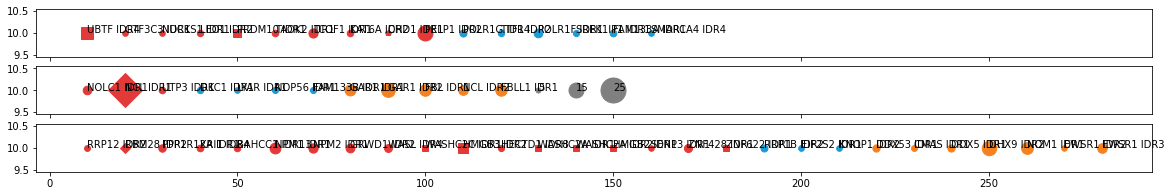

In [34]:
# Get top 20 
# GAR1, FBL, FBLL1, NCL, NOP58, NOP56, NOLC1, UTP3, LYAR, DKC1, FAM133B
dfcacc=['Q9NY12','P22087','A6NHQ2','P19338','Q9Y2X3','O00567','Q14978','Q9NQZ2','Q9NX58','O60832','Q5BKY9']
combined_location_accs=[fcdfcacc+gcacc]
#pint(combined_location_accs[0])

f1=myfeat.index('neg-neg')
f2=myfeat.index('pos-pos')
f3=myfeat.index('pos-neg')
f4=myfeat.index('K Block')
f5=myfeat.index('RG Frac')
f6=myfeat.index('RG Frac')
cutoffval=5.5  
topx=40
countFC=0
countDFC=0
countGC=0
barloc=np.zeros((3,3))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize = (20, 3),sharex=True)

# Get all D/E-tracts and save their location 
tmpacc=[]
tmpgene=[]
tmploc=[]
tmpzscore=[]
for idx in range(0,len(fullaccs)):
    if fullaccs[idx] in combined_location_accs[0]:
        if round(zvecaa[idx,f1],1)>=cutoffval:
            tmpacc.append(fullaccswnums[idx])
            tmpgene.append(mygenes[idx])
            tmpzscore.append(zvecaa[idx,f1])
            if fullaccs[idx] in dfcacc:
                tmploc.append('DFC')
                countDFC=countDFC+10
                if fullaccs[idx] in DNAbindingacc and fullaccs[idx] in RNAbindingacc:
                    ax2.plot(countDFC,10, marker='p',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in DNAbindingacc:
                    ax2.plot(countDFC,10, marker='s',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in RNAbindingacc:
                    ax2.plot(countDFC,10, marker='D',markersize=zvecaa[idx,f1], color='#e23a38')
                else:
                    ax2.plot(countDFC,10, marker='o',markersize=zvecaa[idx,f1], color='#e23a38')
                tmp=mygenes[idx].split(' ')
                ax2.text(countDFC,10, mygenes[idx])
            elif fullaccs[idx] in fcdfcacc:
                tmploc.append('FC')
                countFC=countFC+10
                if fullaccs[idx] in DNAbindingacc and fullaccs[idx] in RNAbindingacc:
                    ax1.plot(countFC,10, marker='p',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in DNAbindingacc:
                    ax1.plot(countFC,10, marker='s',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in RNAbindingacc:
                    ax1.plot(countFC,10, marker='D',markersize=zvecaa[idx,f1], color='#e23a38')
                else:
                    ax1.plot(countFC,10, marker='o',markersize=zvecaa[idx,f1], color='#e23a38')
                tmp=mygenes[idx].split(' ')
                ax1.text(countFC,10, mygenes[idx])
            elif fullaccs[idx] in gcacc:
                tmploc.append('GC')
                countGC=countGC+10
                if fullaccs[idx] in DNAbindingacc and fullaccs[idx] in RNAbindingacc:
                    ax3.plot(countGC,10, marker='p',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in DNAbindingacc:
                    ax3.plot(countGC,10, marker='s',markersize=zvecaa[idx,f1], color='#e23a38')
                elif fullaccs[idx] in RNAbindingacc:
                    ax3.plot(countGC,10, marker='D',markersize=zvecaa[idx,f1], color='#e23a38')
                else:
                    ax3.plot(countGC,10, marker='o',markersize=zvecaa[idx,f1], color='#e23a38')
                tmp=mygenes[idx].split(' ')
                ax3.text(countGC,10, mygenes[idx])
            elif fullaccs[idx] in nucleoplasmacc:
                tmploc.append('Nucleoplasm')

tmpdf=pd.DataFrame()
tmpdf['Acc']=tmpacc
tmpdf['Gene']=tmpgene
tmpdf['Location']=tmploc
tmpdf['Z-score']=tmpzscore

tmpdf = tmpdf.sort_values(by=['Z-score'],ascending=False)
print(tmpdf.head(topx))
print(tmpdf['Location'].head(topx).value_counts())
#fig,ax = plt.subplots()
#tmpdf['Location'].value_counts().plot(ax = ax, kind = 'pie')
tmpcounts=tmpdf['Location'].head(topx).value_counts()
if 'FC' in tmpcounts:
    barloc[0,0]=tmpcounts['FC']
if 'DFC' in tmpcounts:
    barloc[0,1]=tmpcounts['DFC']
if 'GC' in tmpcounts:
    barloc[0,2]=tmpcounts['GC']


# Get all K-blocks+ERRs and save their location 
tmpacc=[]
tmpgene=[]
tmploc=[]
tmpzscore=[]
for idx in range(0,len(fullaccs)):
    # Perform E fraction check for K-blocks + ERRs
    SeqOb = SequenceParameters(myseqs[idx])
    aafrac=SeqOb.get_amino_acid_fractions()
    if round(aafrac['E'],2)>=round(aafrac['D'],2) and aafrac['E']>0:
        echeck=1
    else:
        echeck=0
    if fullaccs[idx] in combined_location_accs[0]:
        if round(zvecaa[idx,f2],1)>=cutoffval and round(zvecaa[idx,f3],1)>=3 and round(zvecaa[idx,f4],1)>=1 and echeck==1 and round(zvecaa[idx,f1],1)<5*round(zvecaa[idx,f2],1):
            tmpacc.append(fullaccswnums[idx])
            tmpgene.append(mygenes[idx])
            tmpzscore.append(zvecaa[idx,f2])
            if fullaccs[idx] in dfcacc:
                tmploc.append('DFC')
                countDFC=countDFC+10
                ax2.plot(countDFC,10, marker='o',markersize=zvecaa[idx,f2], color='#1b9cd7')
                tmp=mygenes[idx].split(' ')
                ax2.text(countDFC,10, mygenes[idx])
            elif fullaccs[idx] in fcdfcacc:
                tmploc.append('FC')
                countFC=countFC+10
                ax1.plot(countFC,10, marker='o',markersize=zvecaa[idx,f2], color='#1b9cd7')
                tmp=mygenes[idx].split(' ')
                ax1.text(countFC,10, mygenes[idx])
            elif fullaccs[idx] in gcacc:
                tmploc.append('GC')
                countGC=countGC+10
                ax3.plot(countGC,10, marker='o',markersize=zvecaa[idx,f2], color='#1b9cd7')
                tmp=mygenes[idx].split(' ')
                ax3.text(countGC,10, mygenes[idx])
            elif fullaccs[idx] in nucleoplasmacc:
                tmploc.append('Nucleoplasm')

tmpdf=pd.DataFrame()
tmpdf['Acc']=tmpacc
tmpdf['Gene']=tmpgene
tmpdf['Location']=tmploc
tmpdf['Z-score']=tmpzscore

tmpdf = tmpdf.sort_values(by=['Z-score'],ascending=False)
print(tmpdf.head(topx))
print(tmpdf['Location'].head(topx).value_counts())
tmpcounts=tmpdf['Location'].head(topx).value_counts()
#fig,ax = plt.subplots()
#tmpdf['Location'].value_counts().plot(ax = ax, kind = 'pie')
if 'FC' in tmpcounts:
    barloc[1,0]=tmpcounts['FC']
if 'DFC' in tmpcounts:
    barloc[1,1]=tmpcounts['DFC']
if 'GC' in tmpcounts:
    barloc[1,2]=tmpcounts['GC']


# Get all RG regions and save their location 
tmpacc=[]
tmpgene=[]
tmploc=[]
tmpzscore=[]
for idx in range(0,len(fullaccs)):
    if fullaccs[idx] in combined_location_accs[0]:
        if round(zvecaa[idx,f5],1)>=cutoffval:
            tmpacc.append(fullaccswnums[idx])
            tmpgene.append(mygenes[idx])
            tmpzscore.append(zvecaa[idx,f5])
            if fullaccs[idx] in dfcacc:
                tmploc.append('DFC')
                countDFC=countDFC+10
                ax2.plot(countDFC,10, marker='o',markersize=zvecaa[idx,f5], color='#f58220')
                tmp=mygenes[idx].split(' ')
                ax2.text(countDFC,10, mygenes[idx])
            elif fullaccs[idx] in fcdfcacc:
                tmploc.append('FC')
                countFC=countFC+10
                ax1.plot(countFC,10, marker='o',markersize=zvecaa[idx,f5], color='#f58220')
                tmp=mygenes[idx].split(' ')
                ax1.text(countFC,10, mygenes[idx])
            elif fullaccs[idx] in gcacc:
                tmploc.append('GC')
                countGC=countGC+10
                ax3.plot(countGC,10, marker='o',markersize=zvecaa[idx,f5], color='#f58220')
                tmp=mygenes[idx].split(' ')
                ax3.text(countGC,10, mygenes[idx])
            elif fullaccs[idx] in nucleoplasmacc:
                tmploc.append('Nucleoplasm')

tmpdf=pd.DataFrame()
tmpdf['Acc']=tmpacc
tmpdf['Gene']=tmpgene
tmpdf['Location']=tmploc
tmpdf['Z-score']=tmpzscore

tmpdf = tmpdf.sort_values(by=['Z-score'],ascending=False)
print(tmpdf.head(topx))
print(tmpdf['Location'].head(topx).value_counts())
tmpcounts=tmpdf['Location'].head(topx).value_counts()
#fig,ax = plt.subplots()
#tmpdf['Location'].value_counts().plot(ax = ax, kind = 'pie')
if 'FC' in tmpcounts:
    barloc[2,0]=tmpcounts['FC']
if 'DFC' in tmpcounts:
    barloc[2,1]=tmpcounts['DFC']
if 'GC' in tmpcounts:
    barloc[2,2]=tmpcounts['GC']

countDFC=countDFC+10
ax2.plot(countDFC,10, marker='o',markersize=5, color='#808080')
ax2.text(countDFC,10, '5')
countDFC=countDFC+10
ax2.plot(countDFC,10, marker='o',markersize=15, color='#808080')
ax2.text(countDFC,10, '15')
countDFC=countDFC+10
ax2.plot(countDFC,10, marker='o',markersize=25, color='#808080')
ax2.text(countDFC,10, '25')

#plt.savefig("Manuscript_Figures/2023_03/Top_scoring_DEtract_KERRS_RG_gte_5p5_by_zscore.pdf", transparent=True, bbox_inches = "tight") 


[[10.  3. 18.]
 [ 6.  4.  3.]
 [ 0.  5.  7.]]


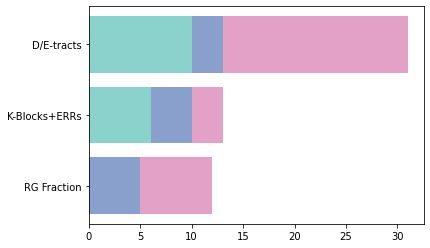

In [36]:
x=['D/E-tracts','K-Blocks+ERRs','RG Fraction']
plt.barh(x, barloc[:,0], color='#8bd1cc')
plt.barh(x, barloc[:,1], left=barloc[:,0], color='#89a0cc')
plt.barh(x, barloc[:,2], left=barloc[:,0]+barloc[:,1], color='#e3a1c7')
plt.gca().invert_yaxis()

#plt.savefig("Manuscript_Figures/2023_12/Top_scoring_DEtract_KERRS_RG_gte_5p5_by_location.pdf", transparent=True, bbox_inches = "tight") 
print(barloc)

## Get fraction of D/E-tract and K-block+ERRs IDRs in FC/DFC vs GC

In [128]:
# !! Right now this calculation is based on number of proteins not number of IDRs !!
# All Human Protein Atlas Nucleoli fibrillar center accessions
tsv_fc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli_fibrillar_center.tsv', sep='\t')
#print(tsv_fc)
hatlas_fc_acc=tsv_fc['Uniprot'].values.tolist()
#print(hatlas_fc_acc)
print(len(hatlas_fc_acc))

# Adding proteins from our summary abundance figure
mattslist=['P17480','Q8IZL8','Q9H1E3','Q3B726','Q96C57','O15446','Q9NX58','Q8N9E0','Q5BKY9','Q14978','P19338','Q9NQZ2','O00567','Q9Y2X3','P22087','Q15361','Q8N9Q2','Q13428','Q9BQG0','Q92794','Q9UL54']

hatlas_fc_acc=list(set(hatlas_fc_acc+mattslist))
hatlas_fc_acc_clean = [x for x in hatlas_fc_acc if str(x) != 'nan']
#print(hatlas_fc_acc_clean)
print(len(hatlas_fc_acc_clean))

# All Human Protein Atlas Nucleoli accessions (this should be the GC)
tsv_gc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli.tsv', sep='\t')
hatlas_gc_acc=tsv_gc['Uniprot'].values.tolist()
hatlas_gc_acc=list(set(hatlas_gc_acc+['P06748'])) # Add NPM1
hatlas_gc_acc_clean = [x for x in hatlas_gc_acc if str(x) != 'nan']

# Get fraction of GC vs FC/DFC IDRs 
gcacc = [item for item in hatlas_gc_acc_clean if item not in hatlas_fc_acc_clean]
fcdfcacc = hatlas_fc_acc_clean
print(len(set(accs_nuc)))
print(len(gcacc))
print(len(fcdfcacc))

# Get fraction of D/E-tract IDRs in FC/DFC vs GC
print(list(set(fcdfcacc) & set(nucDEtractaccsnonum)))
numFCDEtracts=len(list(set(fcdfcacc) & set(nucDEtractaccsnonum)))
print(numFCDEtracts)
print(list(set(gcacc) & set(nucDEtractaccsnonum)))
numGCDEtracts=len(list(set(gcacc) & set(nucDEtractaccsnonum)))
print(numGCDEtracts)

res = fisher_exact(([numFCDEtracts,len(fcdfcacc)-numFCDEtracts],[numGCDEtracts,len(gcacc)-numGCDEtracts]), alternative='greater')
print(res)
print(([numFCDEtracts,len(fcdfcacc)-numFCDEtracts],[numGCDEtracts,len(gcacc)-numGCDEtracts]))


# Get fraction of K-block+ERRs IDRs in FC/DFC vs GC
print(list(set(fcdfcacc) & set(nucKERRaccsnonum)))
numFCKERR=len(list(set(fcdfcacc) & set(nucKERRaccsnonum)))
print(numFCKERR)
print(list(set(gcacc) & set(nucKERRaccsnonum)))
numGCKERR=len(list(set(gcacc) & set(nucKERRaccsnonum)))
print(numGCKERR)

res = fisher_exact(([numFCKERR,len(fcdfcacc)-numFCKERR],[numGCKERR,len(gcacc)-numGCKERR]), alternative='greater')
print(res)
print(([numFCKERR,len(fcdfcacc)-numFCKERR],[numGCKERR,len(gcacc)-numGCKERR]))


# Get fraction of RGs in FC/DFC vs GC
print(list(set(fcdfcacc) & set(nucRGaccsnonum)))
numFCRG=len(list(set(fcdfcacc) & set(nucRGaccsnonum)))
print(numFCRG)
print(list(set(gcacc) & set(nucRGaccsnonum)))
numGCRG=len(list(set(gcacc) & set(nucRGaccsnonum)))
print(numGCRG)

res = fisher_exact(([numFCRG,len(fcdfcacc)-numFCRG],[numGCRG,len(gcacc)-numGCRG]), alternative='greater')
print(res)
print(([numFCRG,len(fcdfcacc)-numFCRG],[numGCRG,len(gcacc)-numGCRG]))


310
319
1385
1017
319
['Q14978', 'P19338', 'Q13428', 'Q8WVC0', 'Q9Y2X3', 'Q9NQZ2', 'A1L162', 'Q6ZU67', 'Q9C0A1', 'O75398', 'A7KAX9', 'Q86X53', 'Q9NQV6', 'Q9P2H5', 'Q9UL54', 'Q92692', 'O95602', 'A6NEL2', 'Q15270', 'O43196', 'Q9C0K0', 'P51532', 'O75381', 'Q86VZ6', 'Q9H1E3', 'Q96HJ3', 'Q92794', 'Q9Y5B9', 'Q9NYJ1', 'Q9Y5Q9', 'P29692', 'P25490', 'Q96GN5', 'O14646', 'Q96PN7', 'Q70EK9', 'Q8IZL8', 'P17480']
38
['Q9ULT8', 'Q53HL2', 'Q15269', 'Q8N9T8', 'O75607', 'Q86YW9', 'Q9NU22', 'Q9Y5R5', 'Q9UK76', 'Q13206', 'Q8IVL6', 'Q68E01', 'O60315', 'A6NIK2', 'Q15021', 'O00566', 'Q6PJT7', 'Q8WV44', 'P52954', 'Q14524', 'P37275', 'Q5JTH9', 'Q641Q2', 'Q9BW71', 'O14974', 'Q9UNX9', 'Q8NEJ9', 'Q9BZI1', 'P06748', 'Q9BQ67', 'Q86SE8', 'P20962', 'Q9Y4E1', 'P54257', 'Q9P2D1', 'Q9Y3T9', 'O00401', 'Q8IWS0', 'Q9H2Y7', 'Q6DD87', 'P46087', 'Q9BXY0', 'P11388', 'Q96BF6', 'O60336', 'Q14137', 'P45379', 'Q96JP5', 'Q9BU19', 'P30291', 'Q5C9Z4', 'Q9NSI6', 'Q12873', 'Q9Y4C8', 'Q9H501', 'P80192', 'Q6PGQ1', 'Q969S3', 'Q96JM7', 'Q9

[nan, nan, 'Q13085', 'Q9UHB7', 'Q15109', 'Q7Z591', 'P52895', 'P42330', 'P17516', 'P09972', 'Q9BT22', 'C9J202', 'O95076', 'Q9NU02', 'Q15327', 'Q6AI12', 'Q9UBZ4', 'A7KAX9', 'Q96Q27', 'P56378', 'Q6UX72', 'Q67FW5', 'Q13145', 'P50895', 'Q9C0K0', 'Q86UU0', 'Q6ZU67', 'Q8N7W2', 'Q13490', 'Q6PGQ7', 'Q9BSF8', 'Q9BSU1', 'Q5TEA3', 'A6NN90', 'Q9BXT2', 'Q16566', 'Q8N187', 'Q6P1N0', 'Q96BQ5', 'Q96HJ3', 'Q9P219', 'P41597', 'P09326', 'Q96GN5', 'P50613', 'Q8WUJ3', 'Q96G28', 'A6NFT4', 'Q9P2B7', 'Q96BP2', 'O14646', 'Q9UPZ9', 'Q8NHS4', 'O75153', 'Q8WYK1', 'Q9NYJ1', 'P38432', 'Q9P021', 'A4D126', 'P48730', 'O60911', 'Q9P2B4', 'P98082', 'Q9Y4B6', 'Q5QP82', 'Q6PJP8', 'Q7L014', 'O75398', 'Q5TB30', 'O60832', 'Q9Y485', 'Q8TE96', 'Q9H410', 'O75319', 'Q13627', 'Q9NVP4', 'P24534', 'P29692', 'Q5JST6', 'Q9BUP0', 'Q8N5X7', 'P19622', 'Q86X53', 'A1L162', 'P11474', 'Q96B26', 'Q9Y5Q0', 'Q96PZ2', 'Q6ZU69', 'Q7L5A3', 'Q6IPT2', 'Q5HYJ3', 'P22087', 'Q8WUP2', 'A6NHQ2', 'Q92915', 'P49789', 'P55317', 'Q9P0K8', 'P85037', 'Q6ZUU3',

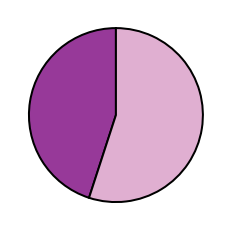

10
10


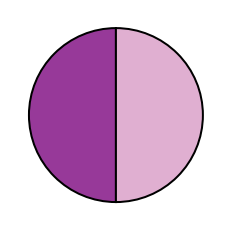

POLR1F IDR1
POLR1G IDR4
FAM133A IDR1
TTF1 IDR2
SREK1IP1 IDR1
FAM133B IDR1
NOP56 IDR1
LYAR IDR1
CUSTOS IDR2
NOP58 IDR1
TCOF1 IDR2
KAT6A IDR2
MYBBP1A IDR2
7
13


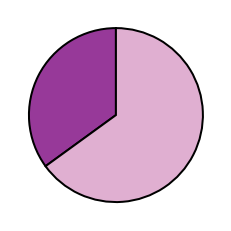

In [84]:
# All Human Protein Atlas Nucleoli fibrillar center accessions
tsv_fc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli_fibrillar_center.tsv', sep='\t')
#print(tsv_fc)
hatlas_fc_acc=tsv_fc['Uniprot'].values.tolist()
print(hatlas_fc_acc)
print(len(hatlas_fc_acc))

# Adding proteins from our summary abundance figure
mattslist=['P17480','Q8IZL8','Q9H1E3','Q3B726','Q96C57','O15446','Q9NX58','Q8N9E0','Q5BKY9','Q14978','P19338','Q9NQZ2','O00567','Q9Y2X3','P22087','Q15361','Q8N9Q2','Q13428','Q9BQG0','Q92794','Q9UL54']

hatlas_fc_acc=list(set(hatlas_fc_acc+mattslist))
hatlas_fc_acc_clean = [x for x in hatlas_fc_acc if str(x) != 'nan']
print(hatlas_fc_acc_clean)
print(len(hatlas_fc_acc_clean))

# All Human Protein Atlas Nucleoli accessions (this should be the GC)
tsv_gc = pd.read_csv('HPA_All/2023_03/subcell_location_Nucleoli.tsv', sep='\t')
hatlas_gc_acc=tsv_gc['Uniprot'].values.tolist()
hatlas_gc_acc=list(set(hatlas_gc_acc+['P06748'])) # Add NPM1
hatlas_gc_acc_clean = [x for x in hatlas_gc_acc if str(x) != 'nan']

# Get fraction of GC vs FC/DFC IDRs 
gcacc = [item for item in hatlas_gc_acc_clean if item not in hatlas_fc_acc_clean]
fcdfcacc = hatlas_fc_acc_clean
print(len(set(accs_nuc)))
print(len(gcacc))
print(len(fcdfcacc))

fracgc=[]
fracfcdfc=[]

fracgc.append(len(gcacc)/(len(gcacc)+len(fcdfcacc)))
fracfcdfc.append(len(fcdfcacc)/(len(gcacc)+len(fcdfcacc)))



# Get distribution for top 20 neg-neg
nn=np.array(df3['neg-neg'].tolist())
sort_index = (-nn).argsort()[:20]

nngc=[]
nnfcdfc=[]
for s in sort_index:
    tmp=ulist100[s].split('_')
    ulist100nonum=tmp[0]
    if ulist100nonum in gcacc:
        nngc.append(ulist100[s])
        #print(glist100[s])
    elif ulist100nonum in fcdfcacc:
        nnfcdfc.append(ulist100[s])
        #print(glist100[s])

print(len(set(nngc)))
print((set(nnfcdfc)))
print(len(set(nnfcdfc)))
fracgc.append(len(set(nngc))/(len(set(nngc))+len(set(nnfcdfc))))
fracfcdfc.append(len(set(nnfcdfc))/(len(set(nngc))+len(set(nnfcdfc))))

mycolors = ["#973999","#e0afd1"]
wedges, texts = plt.pie(np.array([len(set(nngc)),len(set(nnfcdfc))]), startangle = 90, colors=mycolors)
for w in wedges:
    w.set_linewidth(2)
    w.set_edgecolor('black')
#plt.savefig("../2023_02/nucleoarome_top_18_localization_pie_negneg.pdf", transparent=True, bbox_inches = "tight") 
plt.show() 


# Get distribution for top 20 pos-neg
pn=np.array(df3['pos-neg'].tolist())
sort_index = (-pn).argsort()[:20]

pngc=[]
pnfcdfc=[]
for s in sort_index:
    tmp=ulist100[s].split('_')
    ulist100nonum=tmp[0]
    if ulist100nonum in gcacc:
        pngc.append(ulist100[s])
        #print(glist100[s])
    elif ulist100nonum in fcdfcacc:
        pnfcdfc.append(ulist100[s])
        #print(glist100[s])

print(len(set(pngc)))
print(len(set(pnfcdfc)))
fracgc.append(len(set(pngc))/(len(set(pngc))+len(set(pnfcdfc))))
fracfcdfc.append(len(set(pnfcdfc))/(len(set(pngc))+len(set(pnfcdfc))))

mycolors = ["#973999","#e0afd1"]
wedges, texts = plt.pie(np.array([len(set(pngc)),len(set(pnfcdfc))]), startangle = 90, colors=mycolors)
for w in wedges:
    w.set_linewidth(2)
    w.set_edgecolor('black')
#plt.savefig("../2023_02/nucleoarome_top_18_localization_pie_posneg.pdf", transparent=True, bbox_inches = "tight")
plt.show() 


# Get distribution for top 18 pos-pos
pp=np.array(df3['pos-pos'].tolist())
sort_index = (-pp).argsort()[:20]

ppgc=[]
ppfcdfc=[]
for s in sort_index:
    tmp=ulist100[s].split('_')
    ulist100nonum=tmp[0]
    if ulist100nonum in gcacc:
        ppgc.append(ulist100[s])
        #print(glist100[s])
    elif ulist100nonum in fcdfcacc:
        ppfcdfc.append(ulist100[s])
        print(glist100[s])

print(len(set(ppgc)))
print(len(set(ppfcdfc)))
fracgc.append(len(set(ppgc))/(len(set(ppgc))+len(set(ppfcdfc))))
fracfcdfc.append(len(set(ppfcdfc))/(len(set(ppgc))+len(set(ppfcdfc))))

mycolors = ["#973999","#e0afd1"]
wedges, texts = plt.pie(np.array([len(set(ppgc)),len(set(ppfcdfc))]), startangle = 90, colors=mycolors)
for w in wedges:
    w.set_linewidth(2)
    w.set_edgecolor('black')
#plt.savefig("../2023_02/nucleoarome_top_18_localization_pie_pospos.pdf", transparent=True, bbox_inches = "tight")
plt.show() 



# Part X: Extras

## Get list of top proteins associated with a given sequence feature

             Genes Accessions  Frac K+R Location
27      TAF1D IDR2     Q9H5J8  4.776041       GC
1065   GTF3C1 IDR5     Q12789  4.515181       GC
694     SURF6 IDR2     O75683  4.336074       GC
482    KLHDC4 IDR1     Q8TBB5  4.159224       GC
123     FTSJ3 IDR5     Q8IY81  4.130756       GC
...            ...        ...       ...      ...
1985   IQGAP3 IDR1     Q86VI3  0.968860      Rim
784     NRIP1 IDR8     P48552  0.968860       GC
2062  CCDC168 IDR4     Q8NDH2  0.968860       GC
144      MYL3 IDR1     P08590  0.968860       GC
2145     RRP8 IDR1     O43159  0.957882       GC

[508 rows x 4 columns]
508
POLR1F IDR1
1.5300623274182539
RSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL
0.024100527381933745


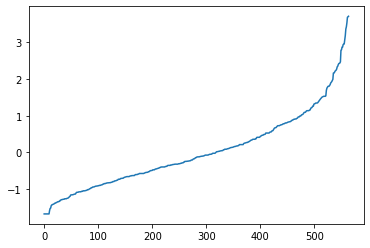

In [12]:
import pandas as pd
dfzvec = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)
dftmp = pd.DataFrame()
dftmp['Genes']=genenameswnums_nuc
dftmp['Accessions']=curracc
topfeatloc=[]
for a in curracc:
    if a in gcacc:
        topfeatloc.append('GC')
    elif a in fcdfcacc:
        topfeatloc.append('FC')
    else:
        topfeatloc.append('Rim')
dftmp['Location']=topfeatloc
df2 = pd.concat([dftmp, dfzvec], axis=1)

cutoffval=1
featurecheck='Frac K+R'
df2 = df2[ (round(df2[featurecheck],1) >=cutoffval)]
df2 = df2.sort_values(by=[featurecheck], ascending=False)
print(df2[['Genes','Accessions',featurecheck,'Location']])
print(len(df2[featurecheck]))

#display(df2.to_string())
#print(df2['Genes'].tolist())
#print(df2[featurecheck].tolist())
#print(df2['Location'].tolist())

tmpg=dftmp['Genes'].tolist()
tmpv=dfzvec[featurecheck].tolist()
idx=tmpg.index('POLR1F IDR1')
print(tmpg[idx])
print(tmpv[idx])
print(currseqs[idx])

krrattest=[]
dfzvec = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)
tmplist = dfzvec[featurecheck].tolist()
for a in range(0,len(curracc)):
    if curracc[a] in fcdfcacc:
        krrattest.append(tmplist[a])
        
plt.plot(np.sort(np.array(krrattest)))
print(np.mean(krrattest))

## Get delta sliding window plot

1239
1239


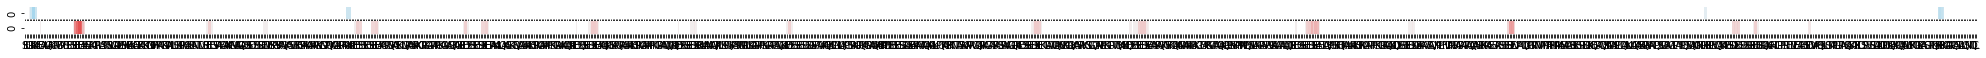

[0. 0. 0. ... 0. 0. 0.]
[[4, 8], [205, 208], [1069, 1071], [1218, 1222]]
['RKRK', 'RAK', 'RK', 'RKPK']
[[10, 11], [31, 39], [116, 120], [152, 155], [210, 215], [221, 226], [279, 283], [291, 296], [351, 352], [359, 366], [416, 417], [424, 428], [485, 489], [641, 648], [703, 716], [809, 810], [815, 825], [881, 885], [944, 949], [1087, 1092], [1100, 1104], [1135, 1137]]
['E', 'SEEEEEAE', 'TEEE', 'ETD', 'EEESE', 'ESEEE', 'EEDS', 'DSEEE', 'E', 'ESDSEEE', 'E', 'ESDS', 'EEDS', 'ESDSEEE', 'EDSESSEEESDSE', 'E', 'EEESDSEEEA', 'ESDS', 'SEDED', 'DDSED', 'EEDG', 'ED']


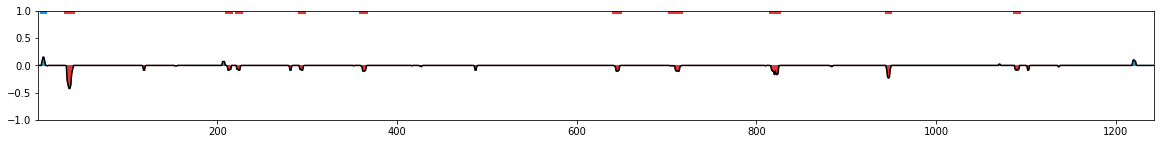

In [45]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import re

def get_omega(myseq,type1):
    blobsz=[5]
    for b in blobsz:

        # Get asymmetry for each blob
        sigX=np.zeros((len(myseq)-b+1))
        for x in range(0,len(myseq)-b+1):
            count=0
            subseq=myseq[x:x+b]
            for res in type1:
                count=count+subseq.count(res)

            tmp=((count/b)-(1-(count/b)))**2
            if (count/b)-(1-(count/b))>=0:
                sigX[x]=(tmp)
            else:
                sigX[x]=(-tmp)
                #sigX[x]=(0)
            
            #print(sigX)
            #print(subseq)
            #hi

        # Add up all blobs a part of so can map directly back to sequence
        blockX=np.zeros((len(myseq),1))
        #blockX=np.zeros((len(myseq)))
        for x in range(0,len(myseq)):
            if x>=b-1 and x<=len(myseq)-b:
                blockX[x]=np.mean(sigX[x-b+1:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[x-b+1:x+1])
                #print(blockX[x])
            elif x==0:
                blockX[x]=sigX[0]
            elif x<b-1:
                blockX[x]=np.mean(sigX[0:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[0:x+1])
                #print(blockX[x])
            elif x>len(myseq)-b:
                blockX[x]=np.mean(sigX[-(len(myseq)-x):])
                #print('Sequence position '+str(x))
                #print(len(myseq)-x)
                #print(sigX[-(len(myseq)-x):])
                #print(blockX[x])
        print(len(sigX))
        return blockX

# Starts Here
pol=['S','T','N','Q','C','H']
hyd=['I','L','M','V']
pos=['R','K']
neg=['E','D']
aro=['F','W','Y']
ala=['A']
pro=['P']
gly=['G']

mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
myredcmap = sbn.light_palette("#e23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')

#LYAR 
#testseq='TSSAPSNQEKQKQPEISVSEDKSEQAPQVVEENGKKKSKRERKEERQKKNKKEKKDLVEEQMETAEKKKSKKRKMEEDEVPSETEVSVEKKKKKKKHHDEDEIDGESQEETSQITEEEGEQQEENGEDESADVDVESNETARGKFNW'
# PolR1F
#testseq='KRSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL'
# NUCKS
#testseq='MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGSSKKKNKKMVKKSKPERKEKKMPKPRLKATVTPSPVKGKGKVGRPTASKASKEKTPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED'
# NCL
#testseq='ESEEEEDDSDEEDQKPIKKPIAKKAVAKKEESEEDDEDEDEDESEEEKPVAKRPLAKNPPVKVTPAKKSTGKKQESDDEEDESEEEKPVAKKPPAKKPAGKKQESEDEESDEDEEEPMEVASAQKGKKTAPAKAEDDDDDDDDDDDDDDEDDEEDDDDE'
#UBF
#testseq='SESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSESSSEDESEDGDENEEDDEDEDDDEDDDEDEDNESEGSSSSSSSSGDSSDSDS'
# NUCKSdelK
#testseq='MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED'
#TCOF1
#testseq='MAEARKRRELLPLIYHHLLRAGYVRAAREVKEQSGQKCFLAQPVTLLDIYTHWQQTSELGRKRKAEEDAALQAKKTRVSDPISTSESSEEEEEAEAETAKATPRLASTNSSVLGADLPSSMKEKAKAETEKAGKTGNSMPHPATGKTVANLLSGKSPRKSAEPSANTTLVSETEEEGSVPAFGAAAKPGMVSAGQADSSSEDTSSSSDETDVEGKPSVKPAQVKASSVSTKESPARKAAPAPGKVGDVTPQVKGGALPPAKRAKKPEEESESSEEGSESEEEAPAGTRSQVKASEKILQVRAASAPAKGTPGKGATPAPPGKAGAVASQTKAGKPEEDSESSSEESSDSEEETPAAKALLQAKASGKTSQVGAASAPAKESPRKGAAPAPPGKTGPAVAKAQAGKREEDSQSSSEESDSEEEAPAQAKPSGKAPQVRAASAPAKESPRKGAAPAPPRKTGPAAAQVQVGKQEEDSRSSSEESDSDREALAAMNAAQVKPLGKSPQVKPASTMGMGPLGKGAGPVPPGKVGPATPSAQVGKWEEDSESSSEESSDSSDGEVPTAVAPAQEKSLGNILQAKPTSSPAKGPPQKAGPVAVQVKAEKPMDNSESSEESSDSADSEEAPAAMTAAQAKPALKIPQTKACPKKTNTTASAKVAPVRVGTQAPRKAGTATSPAGSSPAVAGGTQRPAEDSSSSEESDSEEEKTGLAVTVGQAKSVGKGLQVKAASVPVKGSLGQGTAPVLPGKTGPTVTQVKAEKQEDSESSEEESDSEEAAASPAQVKTSVKKTQAKANPAAARAPSAKGTISAPGKVVTAAAQAKQRSPSKVKPPVRNPQNSTVLARGPASVPSVGKAVATAAQAQTGPEEDSGSSEEESDSEEEAETLAQVKPSGKTHQIRAALAPAKESPRKGAAPTPPGKTGPSAAQAGKQDDSGSSSEESDSDGEAPAAVTSAQVIKPPLIFVDPNRSPAGPAATPAQAQAASTPRKARASESTARSSSSESEDEDVIPATQCLTPGIRTNVVTMPTAHPRIAPKASMAGASSSKESSRISDGKKQEGPATQVSKKNPASLPLTQAALKVLAQKASEAQPPVARTQPSSGVDSAVGTLPATSPQSTSVQAKGTNKLRKPKLPEVQQATKAPESSDDSEDSSDSSSGSEEDGEGPQGAKSAHTLGPTPSRTETLVEETAAESSEDDVVAPSQSLLSGYMTPGLTPANSQASKATPKLDSSPSVSSTLAAKDDPDGKQEAKPQQAAGMLSPKTGGKEAASGTTPQKSRKPKKGAGNPQASTLALQSNITQCLLGQPWPLNEAQVQASVVKVLTELLEQERKKVVDTTKESSRKGWESRKRKLSGDQPAARTPRSKKKKKLGAGEGGEASVSPEKTSTTSKGKAKRDKASGDVKEKKGKGSLGSQGAKDEPEEELQKGMGTVEGGDQSNPKSKKEKKKSDKRKKDKEKKEKKKKAKKASTKDSESPSQKKKKKKKKTAEQTV'
#TCOF1 IDR1
testseq='SELGRKRKAEEDAALQAKKTRVSDPISTSESSEEEEEAEAETAKATPRLASTNSSVLGADLPSSMKEKAKAETEKAGKTGNSMPHPATGKTVANLLSGKSPRKSAEPSANTTLVSETEEEGSVPAFGAAAKPGMVSAGQADSSSEDTSSSSDETDVEGKPSVKPAQVKASSVSTKESPARKAAPAPGKVGDVTPQVKGGALPPAKRAKKPEEESESSEEGSESEEEAPAGTRSQVKASEKILQVRAASAPAKGTPGKGATPAPPGKAGAVASQTKAGKPEEDSESSSEESSDSEEETPAAKALLQAKASGKTSQVGAASAPAKESPRKGAAPAPPGKTGPAVAKAQAGKREEDSQSSSEESDSEEEAPAQAKPSGKAPQVRAASAPAKESPRKGAAPAPPRKTGPAAAQVQVGKQEEDSRSSSEESDSDREALAAMNAAQVKPLGKSPQVKPASTMGMGPLGKGAGPVPPGKVGPATPSAQVGKWEEDSESSSEESSDSSDGEVPTAVAPAQEKSLGNILQAKPTSSPAKGPPQKAGPVAVQVKAEKPMDNSESSEESSDSADSEEAPAAMTAAQAKPALKIPQTKACPKKTNTTASAKVAPVRVGTQAPRKAGTATSPAGSSPAVAGGTQRPAEDSSSSEESDSEEEKTGLAVTVGQAKSVGKGLQVKAASVPVKGSLGQGTAPVLPGKTGPTVTQVKAEKQEDSESSEEESDSEEAAASPAQVKTSVKKTQAKANPAAARAPSAKGTISAPGKVVTAAAQAKQRSPSKVKPPVRNPQNSTVLARGPASVPSVGKAVATAAQAQTGPEEDSGSSEEESDSEEEAETLAQVKPSGKTHQIRAALAPAKESPRKGAAPTPPGKTGPSAAQAGKQDDSGSSSEESDSDGEAPAAVTSAQVIKPPLIFVDPNRSPAGPAATPAQAQAASTPRKARASESTARSSSSESEDEDVIPATQCLTPGIRTNVVTMPTAHPRIAPKASMAGASSSKESSRISDGKKQEGPATQVSKKNPASLPLTQAALKVLAQKASEAQPPVARTQPSSGVDSAVGTLPATSPQSTSVQAKGTNKLRKPKLPEVQQATKAPESSDDSEDSSDSSSGSEEDGEGPQGAKSAHTLGPTPSRTETLVEETAAESSEDDVVAPSQSLLSGYMTPGLTPANSQASKATPKLDSSPSVSSTLAAKDDPDGKQEAKPQQAAGMLSPKTGGKEAASGTTPQKSRKPKKGAGNPQASTLALQSNITQCL'
#NOLC1
#testseq='PERKLQANGPVAKKAKKKASSSDSEDSSEEEEEVQGPPAKKAAVPAKRVGLPPGKAAAKASESSSSEESSDDDDEEDQKKQPVQKGVKPQAKAAKAPPKKAKSSDSDSDSSSEDEPPKNQKPKITPVTVKAQTKAPPKPARAAPKIANGKAASSSSSSSSSSSSDDSEEEKAAATPKKTVPKKQVVAKAPVKAATTPTRKSSSSEDSSSDEEEEQKKPMKNKPGPYSSVPPPSAPPPKKSLGTQPPKKAVEKQQPVESSEDSSDESDSSSEEEKKPPTKAVVSKATTKPPPAKKAAESSSDSSDSDSSEDDEAPSKPAGTTKNSSNKPAVTTKSPAVKPAAAPKQPVGGGQKLLTRKADSSSSEEESSSSEEEKTKKMVATTKPKATAKAALSLPAKQAPQGSRDSSSDSDSSSSEEEEEKTSKSAVKKKPQKVAGGAAPSKPASAKKGKAESSNSSSSDDSSEEEEEKLKGKGSPRPQAPKANGTSALTAQNGKAAKNSEEEEEEKKKAAVVVSKSGSLKKRKQNEAAKEAETPQAKKIKLQTPNTFPKRKKGEKRASSPFRRVREEEIEVDSRVADNSFDAKRGAAG'
#print(len(testseq))

testseqbyres=[]
for a in testseq:
    testseqbyres.append(a)

# Get positive blocks
posblocks=get_omega(testseq,pos)

# Get negative blocks
negblocks=get_omega(testseq,neg)

bothblocks=np.zeros((len(posblocks)))
for a in range(0,len(posblocks)):
    if posblocks[a]>0:
        bothblocks[a]=(posblocks[a])
    elif negblocks[a]>0:
        bothblocks[a]=(-negblocks[a])
    elif posblocks[a]<=0 and negblocks[a]<=0:
        bothblocks[a]=0
    elif posblocks[a]>0 and negblocks[a]>0:
        print('Bad')



f,(ax1,ax2) = plt.subplots(2,1,sharex=True, figsize = (35, 0.5))
g1=sbn.heatmap(posblocks.T,ax=ax1,cmap=mybluecmap,vmin=0,vmax=0.5,cbar=False)
g2=sbn.heatmap(negblocks.T,ax=ax2,cmap=myredcmap,vmin=0,vmax=0.5,cbar=False)
plt.xticks(np.arange(0.5, len(testseq), 1), testseqbyres,rotation=0) 
#plt.savefig("NUCKS_block_position.pdf", transparent=True, bbox_inches = "tight") 
#plt.savefig("Manuscript_Figures/2023_03/POLR1F_block_position.pdf", transparent=True, bbox_inches = "tight") 

plt.show()
print(bothblocks)
#fig = plt.figure(figsize = (len(posblocks)/10, 2))
fig = plt.figure(figsize = (20, 2))
#fig = plt.figure(figsize = (3, 2)) #Size for S1 E
x0=np.linspace(1, len(posblocks), len(posblocks))
plt.plot(x0,bothblocks,color='black')
plt.fill_between(x0, bothblocks, 0, where=bothblocks >= 0, color='#189ad6')
plt.fill_between(x0, bothblocks, 0, where=bothblocks <= 0, color='#e13937')
plt.ylim(-1,1)
plt.xlim(1,len(posblocks))
#plt.xticks(np.arange(0.5, len(testseq), 1), testseqbyres,rotation=0) 

# Get K-blocks
numInt=2
pos=np.where(bothblocks > 0)[0]
# If interruption length is less than or equal to numInt then say these positions are also the residue of interest
pos2=pos.tolist()
for p in range(0,len(pos)-1):
    tdi=pos[p+1]-pos[p]
    if tdi > 1 and tdi<=numInt+1:
        myt=list(range(pos[p]+1,pos[p+1]))
        for item in myt:
            pos2.append(item)


justKs='0'*len(bothblocks) # Set string of zeros
justKs = list(justKs)
for p in pos2:
    justKs[p]='1'
justKs = ''.join(justKs)

the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

seqblocks=[]
for i in idx_ones:
    seqblocks.append(testseq[i[0]:i[1]])
print(idx_ones)
print(seqblocks)
for i in range(0,len(seqblocks)):
    if seqblocks[i].count('K')+seqblocks[i].count('R')>=4:
        plt.plot([idx_ones[i][0]+1, idx_ones[i][1]],[0.99, 0.99],linestyle='-',linewidth=4,color='#189ad6')


# Get D/E-blocks
numInt=2
pos=np.where(bothblocks < 0)[0]
# If interruption length is less than or equal to numInt then say these positions are also the residue of interest
pos2=pos.tolist()
for p in range(0,len(pos)-1):
    tdi=pos[p+1]-pos[p]
    if tdi > 1 and tdi<=numInt+1:
        myt=list(range(pos[p]+1,pos[p+1]))
        for item in myt:
            pos2.append(item)


justKs='0'*len(bothblocks) # Set string of zeros
justKs = list(justKs)
for p in pos2:
    justKs[p]='1'
justKs = ''.join(justKs)

the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

seqblocks=[]
for i in idx_ones:
    seqblocks.append(testseq[i[0]:i[1]])
print(idx_ones)
print(seqblocks)

for i in range(0,len(seqblocks)):
    if seqblocks[i].count('E')+seqblocks[i].count('D')>=4:
        plt.plot([idx_ones[i][0]+1, idx_ones[i][1]],[0.99, 0.99],linestyle='-',linewidth=4,color='#e13937')
        

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/TCOF1_block_linegraph.pdf", transparent=True, bbox_inches = "tight") 


## Get NCPR sliding window plot

143
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.00000000e-02 -4.00000000e-02 -4.00000000e-02  0.00000000e+00
  4.00000000e-02  1.60000000e-01  1.60000000e-01  1.60000000e-01
  8.00000000e-02  0.00000000e+00 -1.20000000e-01 -1.60000000e-01
 -2.40000000e-01 -2.40000000e-01 -2.40000000e-01 -2.80000000e-01
 -2.80000000e-01 -2.00000000e-01 -2.00000000e-01 -2.00000000e-01
 -1.20000000e-01 -8.00000000e-02 -1.20000000e-01 -1.60000000e-01
 -2.00000000e-01 -2.80000000e-01 -3.20000000e-01 -2.40000000e-01
 -4.00000000e-02  1.60000000e-01  4.00000000e-01  6.00000000e-01
  6.40000000e-01  6.00000000e-01  6.00000000e-01  4.80000000e-01
  2.80000000e-01  2.40000000e-01  1.60000000e-01  4.00000000e-02
  8.00000000e-02  2.40000000e-01  3.20000000e-01  4.80000000e-01
  5.60000000e-01  5.60000000e-01  5.60000000e-01  4.80000000e-01
  3.20000000e-01  2.80000000e-01  1.60000000e-01 -8.00000000e-02
 -2.00000000e-01 -2.80000000e-01 -4.40000000e-01 -4.80000000e-01
 -4.00000000e-01 -4.0

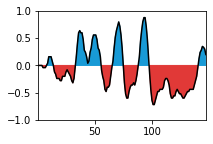

In [1]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import re

def get_omega(myseq,type1,type2):
    blobsz=[5]
    for b in blobsz:

        # Get asymmetry for each blob
        sigX=np.zeros((len(myseq)-b+1))
        for x in range(0,len(myseq)-b+1):
            count=0
            count2=0
            subseq=myseq[x:x+b]
            for res in type1:
                count=count+subseq.count(res)
                
            for res in type2:
                count2=count2+subseq.count(res)

            tmp=((count/b)-(count2/b))
            sigX[x]=(tmp)

        # Add up all blobs a part of so can map directly back to sequence
        blockX=np.zeros(len(myseq))
        #blockX=np.zeros((len(myseq)))
        for x in range(0,len(myseq)):
            if x>=b-1 and x<=len(myseq)-b:
                blockX[x]=np.mean(sigX[x-b+1:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[x-b+1:x+1])
                #print(blockX[x])
            elif x==0:
                blockX[x]=sigX[0]
            elif x<b-1:
                blockX[x]=np.mean(sigX[0:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[0:x+1])
                #print(blockX[x])
            elif x>len(myseq)-b:
                blockX[x]=np.mean(sigX[-(len(myseq)-x):])
                #print('Sequence position '+str(x))
                #print(len(myseq)-x)
                #print(sigX[-(len(myseq)-x):])
                #print(blockX[x])
        print(len(sigX))
        return blockX

# Starts Here
pol=['S','T','N','Q','C','H']
hyd=['I','L','M','V']
pos=['R','K']
neg=['E','D']
aro=['F','W','Y']
ala=['A']
pro=['P']
gly=['G']

mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
myredcmap = sbn.light_palette("#e23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')

#LYAR 
testseq='TSSAPSNQEKQKQPEISVSEDKSEQAPQVVEENGKKKSKRERKEERQKKNKKEKKDLVEEQMETAEKKKSKKRKMEEDEVPSETEVSVEKKKKKKKHHDEDEIDGESQEETSQITEEEGEQQEENGEDESADVDVESNETARGKFNW'
# PolR1F
#testseq='KRSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL'
# NUCKS
#testseq='MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGSSKKKNKKMVKKSKPERKEKKMPKPRLKATVTPSPVKGKGKVGRPTASKASKEKTPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED'
# NCL
#testseq='ESEEEEDDSDEEDQKPIKKPIAKKAVAKKEESEEDDEDEDEDESEEEKPVAKRPLAKNPPVKVTPAKKSTGKKQESDDEEDESEEEKPVAKKPPAKKPAGKKQESEDEESDEDEEEPMEVASAQKGKKTAPAKAEDDDDDDDDDDDDDDEDDEEDDDDE'
#UBF
#testseq='SESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSESSSEDESEDGDENEEDDEDEDDDEDDDEDEDNESEGSSSSSSSSGDSSDSDS'
# NUCKSdelK
#testseq='MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED'
#print(len(testseq))

testseqbyres=[]
for a in testseq:
    testseqbyres.append(a)

# Get positive blocks
ncprblocks=get_omega(testseq,pos,neg)
print(ncprblocks)

fig = plt.figure(figsize = (3, 2))
x0=np.linspace(1, len(ncprblocks), len(ncprblocks))
plt.plot(x0,ncprblocks,color='black')
plt.fill_between(x0, ncprblocks, 0, where=ncprblocks >= 0, color='#189ad6')
plt.fill_between(x0, ncprblocks, 0, where=ncprblocks <= 0, color='#e13937')
plt.ylim(-1,1)
plt.xlim(1,len(ncprblocks))

print(ncprblocks)

## Get NCPR sliding window plot for full sequence not just IDR - ! This is for human but sometimes the frog is used for experiments

1484
[ 0.          0.1         0.2        ... -0.13333333 -0.2
 -0.2       ]
[ 0.          0.1         0.2        ... -0.13333333 -0.2
 -0.2       ]


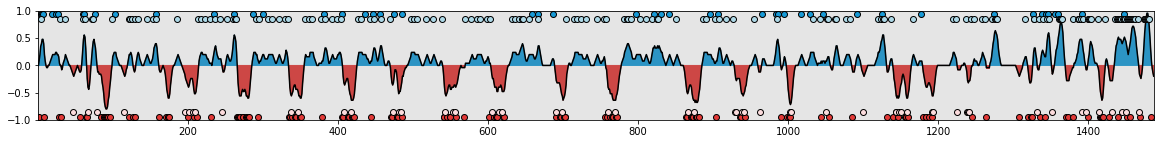

In [26]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.patches as patches

def get_omega(myseq,type1,type2):
    blobsz=[5]
    for b in blobsz:

        # Get asymmetry for each blob
        sigX=np.zeros((len(myseq)-b+1))
        for x in range(0,len(myseq)-b+1):
            count=0
            count2=0
            subseq=myseq[x:x+b]
            for res in type1:
                count=count+subseq.count(res)
                
            for res in type2:
                count2=count2+subseq.count(res)

            tmp=((count/b)-(count2/b))
            sigX[x]=(tmp)

        # Add up all blobs a part of so can map directly back to sequence
        blockX=np.zeros(len(myseq))
        #blockX=np.zeros((len(myseq)))
        for x in range(0,len(myseq)):
            if x>=b-1 and x<=len(myseq)-b:
                blockX[x]=np.mean(sigX[x-b+1:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[x-b+1:x+1])
                #print(blockX[x])
            elif x==0:
                blockX[x]=sigX[0]
            elif x<b-1:
                blockX[x]=np.mean(sigX[0:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[0:x+1])
                #print(blockX[x])
            elif x>len(myseq)-b:
                blockX[x]=np.mean(sigX[-(len(myseq)-x):])
                #print('Sequence position '+str(x))
                #print(len(myseq)-x)
                #print(sigX[-(len(myseq)-x):])
                #print(blockX[x])
        print(len(sigX))
        return blockX

# Starts Here
pol=['S','T','N','Q','C','H']
hyd=['I','L','M','V']
pos=['R','K']
neg=['E','D']
aro=['F','W','Y']
ala=['A']
pro=['P']
gly=['G']

mybluecmap = sbn.light_palette("#009cdf", reverse=False, as_cmap=True)
mybluecmap.set_under('white')
myredcmap = sbn.light_palette("#e23838", reverse=False, as_cmap=True)
myredcmap.set_under('white')

#LYAR 
#testseq='MVFFTCNACGESVKKIQVEKHVSVCRNCECLSCIDCGKDFWGDDYKNHVKCISEDQKYGGKGYEGKTHKGDIKQQAWIQKISELIKRPNVSPKVRELLEQISAFDNVPRKKAKFQNWMKNSLKVHNESILDQVWNIFSEASNSEPVNKEQDQRPLHPVANPHAEISTKVPASKVKDAVEQQGEVKKNKRERKEERQKKRKREKKELKLENHQENSRNQKPKKRKKGQEADLEAGGEEVPEANGSAGKRSKKKKQRKDSASEEEAHVGAGKRKRRHSEVETDSKKKKMKLPEHPEGGEPEDDEAPAKGKFNWKGTIKAILKQAPDNEITIKKLRKKVLAQYYTVTDEHHRSEEELLVIFNKKISKNPTFKLLKDKVKLVK'
#idrspos=[[139,310]]
#POLR1F
#testeq='MAAGCSEAPRPAAASDGSLVGQAGVLPCLELPTYAAACALVNSRYSCLVAGPHQRHIALSPRYLNRKRTGIREQLDAELLRYSESLLGVPIAYDNIKVVGELGDIYDDQGHIHLNIEADFVIFCPEPGQKLMGIVNKVSSSHIGCLVHGCFNASIPKPEQLSAEQWQTMEINMGDELEFEVFRLDSDAAGVFCIRGKLNITSLQFKRSEVSEEVTENGTEEAAKKPKKKKKKKDPETYEVDSGTTKLADDADDTPMEESALQNTNNANGIWEEEPKKKKKKKKHQEVQDQDPVFQGSDSSGYQSDHKKKKKKRKHSEEAEFTPPLKCSPKRKGKSNFL'
#idrspos=[[206,338]]
#NUCKS
#testseq='MSRPVRNRKVVDYSQFQESDDADEDYGRDSGPPTKKIRSSPREAKNKRRSGKNSQEDSEDSEDKDVKTKKDDSHSAEDSEDEKEDHKNVRQQRQAASKAASKQREMLMEDVGSEEEQEEEDEAPFQEKDSGSDEDFLMEDDDDSDYGSSKKKNKKMVKKSKPERKEKKMPKPRLKATVTPSPVKGKGKVGRPTASKASKEKTPSPKEEDEEPESPPEKKTSTSPPPEKSGDEGSEDEAPSGED'
#idrspos=[[0,243]]
#NCL
#testseq='MVKLAKAGKNQGDPKKMAPPPKEVEEDSEDEEMSEDEEDDSSGEEVVIPQKKGKKAAATSAKKVVVSPTKKVAVATPAKKAAVTPGKKAAATPAKKTVTPAKAVTTPGKKGATPGKALVATPGKKGAAIPAKGAKNGKNAKKEDSDEEEDDDSEEDEEDDEDEDEDEDEIEPAAMKAAAAAPASEDEDDEDDEDDEDDDDDEEDDSEEEAMETTPAKGKKAAKVVPVKAKNVAEDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEEPVKEAPGKRKKEMAKQKAAPEAKKQKVEGTEPTTAFNLFVGNLNFNKSAPELKTGISDVFAKNDLAVVDVRIGMTRKFGYVDFESAEDLEKALELTGLKVFGNEIKLEKPKGKDSKKERDARTLLAKNLPYKVTQDELKEVFEDAAEIRLVSKDGKSKGIAYIEFKTEADAEKTFEEKQGTEIDGRSISLYYTGEKGQNQDYRGGKNSTWSGESKTLVLSNLSYSATEETLQEVFEKATFIKVPQNQNGKSKGYAFIEFASFEDAKEALNSCNKREIEGRAIRLELQGPRGSPNARSQPSKTLFVKGLSEDTTEETLKESFDGSVRARIVTDRETGSSKGFGFVDFNSEEDAKAAKEAMEDGEIDGNKVTLDWAKPKGEGGFGGRGGGRGGFGGRGGGRGGRGGFGGRGRGGFGGRGGFRGGRGGGGDHKPQGKKTKFE'
#idrspos=[[0,304],[633,710]]
#UBF
#testseq='MNGEADCPTDLEMAAPKGQDRWSQEDMLTLLECMKNNLPSNDSSKFKTTESHMDWEKVAFKDFSGDMCKLKWVEISNEVRKFRTLTELILDAQEHVKNPYKGKKLKKHPDFPKKPLTPYFRFFMEKRAKYAKLHPEMSNLDLTKILSKKYKELPEKKKMKYIQDFQREKQEFERNLARFREDHPDLIQNAKKSDIPEKPKTPQQLWYTHEKKVYLKVRPDATTKEVKDSLGKQWSQLSDKKRLKWIHKALEQRKEYEEIMRDYIQKHPELNISEEGITKSTLTKAERQLKDKFDGRPTKPPPNSYSLYCAELMANMKDVPSTERMVLCSQQWKLLSQKEKDAYHKKCDQKKKDYEVELLRFLESLPEEEQQRVLGEEKMLNINKKQATSPASKKPAQEGGKGGSEKPKRPVSAMFIFSEEKRRQLQEERPELSESELTRLLARMWNDLSEKKKAKYKAREAALKAQSERKPGGEREERGKLPESPKRAEEIWQQSVIGDYLARFKNDRVKALKAMEMTWNNMEKKEKLMWIKKAAEDQKRYERELSEMRAPPAATNSSKKMKFQGEPKKPPMNGYQKFSQELLSNGELNHLPLKERMVEIGSRWQRISQSQKEHYKKLAEEQQKQYKVHLDLWVKSLSPQDRAAYKEYISNKRKSMTKLRGPNPKSSRTTLQSKSESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSESSSEDESEDGDENEEDDEDEDDDEDDDEDEDNESEGSSSSSSSSGDSSDSDSN'
#idrspos=[[375,417],[450,490],[540,581],[633,764]]
#TCOF1
testseq='MAEARKRRELLPLIYHHLLRAGYVRAAREVKEQSGQKCFLAQPVTLLDIYTHWQQTSELGRKRKAEEDAALQAKKTRVSDPISTSESSEEEEEAEAETAKATPRLASTNSSVLGADLPSSMKEKAKAETEKAGKTGNSMPHPATGKTVANLLSGKSPRKSAEPSANTTLVSETEEEGSVPAFGAAAKPGMVSAGQADSSSEDTSSSSDETDVEGKPSVKPAQVKASSVSTKESPARKAAPAPGKVGDVTPQVKGGALPPAKRAKKPEEESESSEEGSESEEEAPAGTRSQVKASEKILQVRAASAPAKGTPGKGATPAPPGKAGAVASQTKAGKPEEDSESSSEESSDSEEETPAAKALLQAKASGKTSQVGAASAPAKESPRKGAAPAPPGKTGPAVAKAQAGKREEDSQSSSEESDSEEEAPAQAKPSGKAPQVRAASAPAKESPRKGAAPAPPRKTGPAAAQVQVGKQEEDSRSSSEESDSDREALAAMNAAQVKPLGKSPQVKPASTMGMGPLGKGAGPVPPGKVGPATPSAQVGKWEEDSESSSEESSDSSDGEVPTAVAPAQEKSLGNILQAKPTSSPAKGPPQKAGPVAVQVKAEKPMDNSESSEESSDSADSEEAPAAMTAAQAKPALKIPQTKACPKKTNTTASAKVAPVRVGTQAPRKAGTATSPAGSSPAVAGGTQRPAEDSSSSEESDSEEEKTGLAVTVGQAKSVGKGLQVKAASVPVKGSLGQGTAPVLPGKTGPTVTQVKAEKQEDSESSEEESDSEEAAASPAQVKTSVKKTQAKANPAAARAPSAKGTISAPGKVVTAAAQAKQRSPSKVKPPVRNPQNSTVLARGPASVPSVGKAVATAAQAQTGPEEDSGSSEEESDSEEEAETLAQVKPSGKTHQIRAALAPAKESPRKGAAPTPPGKTGPSAAQAGKQDDSGSSSEESDSDGEAPAAVTSAQVIKPPLIFVDPNRSPAGPAATPAQAQAASTPRKARASESTARSSSSESEDEDVIPATQCLTPGIRTNVVTMPTAHPRIAPKASMAGASSSKESSRISDGKKQEGPATQVSKKNPASLPLTQAALKVLAQKASEAQPPVARTQPSSGVDSAVGTLPATSPQSTSVQAKGTNKLRKPKLPEVQQATKAPESSDDSEDSSDSSSGSEEDGEGPQGAKSAHTLGPTPSRTETLVEETAAESSEDDVVAPSQSLLSGYMTPGLTPANSQASKATPKLDSSPSVSSTLAAKDDPDGKQEAKPQQAAGMLSPKTGGKEAASGTTPQKSRKPKKGAGNPQASTLALQSNITQCLLGQPWPLNEAQVQASVVKVLTELLEQERKKVVDTTKESSRKGWESRKRKLSGDQPAARTPRSKKKKKLGAGEGGEASVSPEKTSTTSKGKAKRDKASGDVKEKKGKGSLGSQGAKDEPEEELQKGMGTVEGGDQSNPKSKKEKKKSDKRKKDKEKKEKKKKAKKASTKDSESPSQKKKKKKKKTAEQTV'
idrspos=[[0,len(testseq)]]
#NOLC1
#testseq='PERKLQANGPVAKKAKKKASSSDSEDSSEEEEEVQGPPAKKAAVPAKRVGLPPGKAAAKASESSSSEESSDDDDEEDQKKQPVQKGVKPQAKAAKAPPKKAKSSDSDSDSSSEDEPPKNQKPKITPVTVKAQTKAPPKPARAAPKIANGKAASSSSSSSSSSSSDDSEEEKAAATPKKTVPKKQVVAKAPVKAATTPTRKSSSSEDSSSDEEEEQKKPMKNKPGPYSSVPPPSAPPPKKSLGTQPPKKAVEKQQPVESSEDSSDESDSSSEEEKKPPTKAVVSKATTKPPPAKKAAESSSDSSDSDSSEDDEAPSKPAGTTKNSSNKPAVTTKSPAVKPAAAPKQPVGGGQKLLTRKADSSSSEEESSSSEEEKTKKMVATTKPKATAKAALSLPAKQAPQGSRDSSSDSDSSSSEEEEEKTSKSAVKKKPQKVAGGAAPSKPASAKKGKAESSNSSSSDDSSEEEEEKLKGKGSPRPQAPKANGTSALTAQNGKAAKNSEEEEEEKKKAAVVVSKSGSLKKRKQNEAAKEAETPQAKKIKLQTPNTFPKRKKGEKRASSPFRRVREEEIEVDSRVADNSFDAKRGAAG'
#idrspos=[[63,652]]
#print(len(testseq))

testseqbyres=[]
for a in testseq:
    testseqbyres.append(a)

# Get positive blocks
ncprblocks=get_omega(testseq,pos,neg)
print(ncprblocks)

fig, ax = plt.subplots(figsize = (20, 2))
x0=np.linspace(1, len(ncprblocks), len(ncprblocks))
plt.plot(x0,ncprblocks,color='black')
plt.fill_between(x0, ncprblocks, 0, where=ncprblocks >= 0, color='#189ad6')
plt.fill_between(x0, ncprblocks, 0, where=ncprblocks <= 0, color='#e13937')
plt.ylim(-1,1)
plt.xlim(1,len(ncprblocks))

print(ncprblocks)

pos=[i for i, ltr in enumerate(testseq) if ltr == 'R']
ys = [0.95] * len(pos)
plt.plot(pos,ys,'o',markerfacecolor = '#189ad6' ,markeredgecolor = 'black')
pos=[i for i, ltr in enumerate(testseq) if ltr == 'K']
ys = [0.85] * len(pos)
plt.plot(pos,ys,'o',markerfacecolor = 'lightblue' ,markeredgecolor = 'black')
pos=[i for i, ltr in enumerate(testseq) if ltr == 'E']
ys = [-0.95] * len(pos)
plt.plot(pos,ys,'o',markerfacecolor = '#e13937' ,markeredgecolor = 'black')
pos=[i for i, ltr in enumerate(testseq) if ltr == 'D']
ys = [-0.85] * len(pos)
plt.plot(pos,ys,'o',markerfacecolor = '#fcdcdd' ,markeredgecolor = 'black')

# For IDRs
if idrspos:
    for i in range(0,len(idrspos)):
        ax.add_patch(patches.Rectangle((idrspos[i][0],-1),idrspos[i][1]-idrspos[i][0],2,facecolor='grey',edgecolor='black',alpha=0.2))

#plt.savefig('Mean_NCPR_distribution_SON.pdf', transparent=True, bbox_inches = "tight")

## Get length of D/E-tracts

            0
0    Q8WWQ0_7
1    Q03989_1
2    O75398_1
3    A6NEL2_3
4    Q5JTH9_2
..        ...
135  O14646_1
136  Q8IZL8_2
137  P51532_6
138  P51532_8
139  Q96JP5_1

[140 rows x 1 columns]
            Genes  Length                                          Sequences
278     CHD1 IDR1       4                                               EDEE
181     LEO1 IDR2       4                                               EDDD
130    PEX14 IDR1       4                                               DEED
158  WASHC2A IDR2       4                                               DEED
6      RRP12 IDR2       4                                               EEEE
..            ...     ...                                                ...
16     RBM28 IDR2      33                  EEEDMEEEENDDDDDDDDEEDGVFDDEDEEEEN
162     PTMS IDR1      38             VEEEENGAEEEEEETAEDGEEEDEGEEEDEEEEEEDDE
194      NCL IDR1      38             EDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEE
260    TNNT2 IDR1      47    DIEEVVEEY

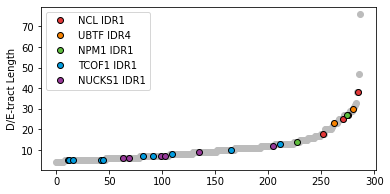

In [42]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
import re

def get_omega(myseq,type1):
    blobsz=[5]
    for b in blobsz:

        # Get asymmetry for each blob
        sigX=np.zeros((len(myseq)-b+1))
        for x in range(0,len(myseq)-b+1):
            count=0
            subseq=myseq[x:x+b]
            for res in type1:
                count=count+subseq.count(res)

            tmp=((count/b)-(1-(count/b)))**2
            if (count/b)-(1-(count/b))>=0:
                sigX[x]=(tmp)
            else:
                sigX[x]=(-tmp)
                #sigX[x]=(0)
            
            #print(sigX)
            #print(subseq)
            #hi

        # Add up all blobs a part of so can map directly back to sequence
        blockX=np.zeros((len(myseq),1))
        #blockX=np.zeros((len(myseq)))
        for x in range(0,len(myseq)):
            if x>=b-1 and x<=len(myseq)-b:
                blockX[x]=np.mean(sigX[x-b+1:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[x-b+1:x+1])
                #print(blockX[x])
            elif x==0:
                blockX[x]=sigX[0]
            elif x<b-1:
                blockX[x]=np.mean(sigX[0:x+1])
                #print('Sequence position '+str(x))
                #print(sigX[0:x+1])
                #print(blockX[x])
            elif x>len(myseq)-b:
                blockX[x]=np.mean(sigX[-(len(myseq)-x):])
                #print('Sequence position '+str(x))
                #print(len(myseq)-x)
                #print(sigX[-(len(myseq)-x):])
                #print(blockX[x])
        #print(len(sigX))
        return blockX

# Script starts Here
pol=['S','T','N','Q','C','H']
hyd=['I','L','M','V']
pos=['R','K']
neg=['E','D']
aro=['F','W','Y']
ala=['A']
pro=['P']
gly=['G']

tmp=pd.read_table('DEtract_accessions_nucleolar.txt',header=None)
detnucaccswnum=tmp[0].tolist()

print(tmp)

# Find indices for all D/E-tract IDRs
allidx_denuc=[]
for i in range(0,len(detnucaccswnum)):
    allidx_denuc.append(fullaccswnums.index(detnucaccswnum[i]))

# Get D/E sequence blocks
seqblocks=[]
seqblocksgenes=[]
seqblockslen=[]
for i in range(0,len(allidx_denuc)):
    testseq=myseqs[allidx_denuc[i]]
    testgene=mygenes[allidx_denuc[i]]
    #print(testgene)
    #print(testseq)
    
    testseqbyres=[]
    for a in testseq:
        testseqbyres.append(a)

    # Get positive blocks
    posblocks=get_omega(testseq,pos)

    # Get negative blocks
    negblocks=get_omega(testseq,neg)

    bothblocks=np.zeros((len(posblocks)))
    for a in range(0,len(posblocks)):
        if posblocks[a]>0:
            bothblocks[a]=(posblocks[a])
        elif negblocks[a]>0:
            bothblocks[a]=(-negblocks[a])
        elif posblocks[a]<=0 and negblocks[a]<=0:
            bothblocks[a]=0
        elif posblocks[a]>0 and negblocks[a]>0:
            print('Bad')


    # Get D/E-blocks
    numInt=2
    currpos=np.where(bothblocks < 0)[0]
    # If interruption length is less than or equal to numInt then say these positions are also the residue of interest
    pos2=currpos.tolist()
    for p in range(0,len(currpos)-1):
        tdi=currpos[p+1]-currpos[p]
        if tdi > 1 and tdi<=numInt+1:
            myt=list(range(currpos[p]+1,currpos[p+1]))
            for item in myt:
                pos2.append(item)


    justKs='0'*len(bothblocks) # Set string of zeros
    justKs = list(justKs)
    for p in pos2:
        justKs[p]='1'
    justKs = ''.join(justKs)

    the_ones = re.findall(r"1+", justKs) # Find all consecutive 1s
    idx_ones=[[m.start(0), m.end(0)] for m in re.finditer(r"1+", justKs)] # Find indices of ones

    for i in idx_ones:
        subtestseq=testseq[i[0]:i[1]]
        negcount=0
        for res in neg:
            negcount=negcount+subtestseq.count(res)        
        if negcount >=4:
            seqblocks.append(testseq[i[0]:i[1]])
            seqblocksgenes.append(testgene)
            seqblockslen.append(len(testseq[i[0]:i[1]]))
    #print(idx_ones)
    #print(seqblocks)


dedf=pd.DataFrame()
dedf['Genes']=seqblocksgenes
dedf['Length']=seqblockslen
dedf['Sequences']=seqblocks

final_dedf = dedf.sort_values(by=['Length'], ascending=True)

print(final_dedf)
print(final_dedf['Genes'].tolist())
print(final_dedf['Length'].tolist())

tmp=final_dedf['Genes'].tolist()
print(tmp.index('TCOF1 IDR1'))

sortedblocklens=final_dedf['Length'].tolist()
sortedblockgenes=final_dedf['Genes'].tolist()
sortedblockseqs=final_dedf['Sequences'].tolist()
plt.figure(figsize=(6,3))
plt.plot(sortedblocklens,'o',color='#bcbcbc')

subgenelist=['NCL IDR1','UBTF IDR4','NPM1 IDR1','TCOF1 IDR1','NUCKS1 IDR1']
mycolor=['#e23838','#f78200','#5ebd3e','#009cdf','#973999']
for g in range(0,len(subgenelist)):
    myidx = [i for i, s in enumerate(sortedblockgenes) if subgenelist[g]==s]
    for i in range(0,len(myidx)):
        if i==0:
            plt.plot(myidx[i],sortedblocklens[myidx[i]],'o',markerfacecolor=mycolor[g],markeredgecolor='k',label=subgenelist[g])
        else:
            plt.plot(myidx[i],sortedblocklens[myidx[i]],'o',markerfacecolor=mycolor[g],markeredgecolor='k')
        print(sortedblockseqs[myidx[i]])
    print(myidx)
plt.ylabel('D/E-tract Length')
plt.legend()

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/Sorted_DEtract_Lengths_of_Nucleolar_DEtract_IDRs.pdf", transparent=True, bbox_inches = "tight") 


## Get length of D/E-tracts by just continuous stretches with at most 2 interruptions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            0
0    Q8WWQ0_7
1    Q03989_1
2    O75398_1
3    A6NEL2_3
4    Q5JTH9_2
..        ...
135  O14646_1
136  Q8IZL8_2
137  P51532_6
138  P51532_8
139  Q96JP5_1

[140 rows x 1 columns]
             Genes  Length                                          Sequences
216     DDX10 IDR3       4                                               DEEE
228   WASHC2A IDR2       4                                               DEED
193     PEX14 IDR1       4                                               DEED
12      INTS3 IDR2       4                                               EEED
74   ARHGAP32 IDR1       4                                               EEDD
..             ...     ...                                                ...
270    PRDM10 IDR1      33                  EAKEEEDEDEDEDTEEDEEEDGEDTDLDDWEPD
129      UBTF IDR4      36               ESEEDDEEDEDDEDEDEEEEDDENGDSSEDGGDSSE
269       NCL IDR1      38             EDEDEEEDDEDEDDDDDEDDEDDDDEDDEEEEEEEEEE
361    ZNF622 IDR1      48  

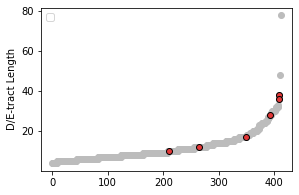

In [20]:
DEFAULT_MAPPING = {'A':'A', 
                   'B':'B',
                   'C':'C', 
                   'D':'E', 
                   'E':'E', 
                   'F':'F', 
                   'G':'G', 
                   'H':'H',
                   'I':'I', 
                   'K':'K', 
                   'L':'L', 
                   'M':'M',
                   'N':'N',
                   'P':'P', 
                   'Q':'N', 
                   'R':'R',
                   'S':'S',
                   'T':'T',
                   'V':'V',
                   'W':'W',
                   'Y':'Y',
                   'X':'X',
                   'U':'U',
                   'Z':'Z'}

core_size=1
max_interruptions=2
# build core sequence
core_seq = 'E'*core_size

def reduce_sequence_alphabet(seq, alphabet_dictionary):
    #"""
    #Function which takes an amino acid sequence and returns a reduced alphabet sequence
    #of the same length, where that reduced alphabet is defined by the alphabet dictionary.

    #The alphabet dictionary maps each of the 20 amino acids to another amino acid. This could
    #be a 1:1 mapping for a normal alphabet, but allows any grouping to easily be implemented.

    #"""
    seq = seq.upper()
    newseq=""
    for res in seq:
        newseq=newseq+alphabet_dictionary[res]

    return newseq

def run_polar_tract_analysis(currseq, seq_name, X, max_interruptions, core_size, reduced_alphabet=DEFAULT_MAPPING):
    seq = reduce_sequence_alphabet(currseq, reduced_alphabet)
    runs = []
    
    # overal_pos defines the position in the ORIGINAL sequence
    # where our current subsequence is
    overal_pos=0

    # As long as you have not reached the end of the protein sequence
    while (len(seq) > 0): 

        # Find the next core instance in the sequence 
        core = seq.find(core_seq)

        # if there is a valid core position
        if core != -1: 
            #####################################################################
            # start the run
            #####################################################################

            # N and C terminal indices of the run to start
            Nterm = core 
            Cterm = core+(core_size) 

            # extract the run
            run = seq[Nterm:(Cterm)]

            # set the current number of interuption
            interruptions = 0


            #####################################################################
            # find the N terminal end of the run (extending out in the N-term direction)
            #####################################################################
            # as long as you have not reached the N-terminal end
            while (Nterm > max_interruptions): 

                # extract the max_interruptions+1 residues N-terminal of where the current
                # N-terminal tract border is
                substr = seq[(Nterm-(max_interruptions+1)):(Nterm)] 

                # if there is not at least one X in the next max_interruption+1 residue 
                # stretch then we end the run
                if X not in substr: 
                    break

                # if there is we incrememnt the N-terminal border BY 1 and repeat!
                Nterm -= 1

                # account for the first max_interruptions+1 residues - 
                # may or may not need to be added to the run
                if (Nterm <= max_interruptions and X in seq[0:Nterm]):
                    index = seq[0:Nterm].find(X) #find the earliest occurance of X
                    Nterm = index

            #####################################################################
            # find the C terminal end of the run
            #####################################################################
            # as long as you have not reached end
            while (Cterm < (len(seq)-max_interruptions)): 

                # check the max_interruptions+1 residues after 
                substr = seq[(Cterm):(Cterm+(max_interruptions+1))] 

                # if there is not at least one X in the next max_interruptions+1 residue stretch, end run
                if X not in substr: 
                    break

                # if there is we increment the C-terminal border BY 1 and repeat
                Cterm += 1

            # account for the last max_interruptions+1 residues! which may or may not need to be added to the run
            # note we have to use a WHILE loop here because find - locates the first example of a residue...
            while (Cterm >= (len(seq)-max_interruptions) and X in seq[(Cterm):len(seq)]):	

                # find the earliest occurance of X (note the +1 so indices work)
                index = seq[(Cterm):len(seq)].find(X)+1 
                Cterm = Cterm+index

            #####################################################################
            # save the run and continue searching the sequence
            #####################################################################

            # add a polar tract object
            negcount=0
            subtestseq=currseq[Nterm:Cterm]
            for res in ['E','D']:
                negcount=negcount+subtestseq.count(res)        
            if negcount >=4:
                runs.append(currseq[Nterm:Cterm])

            # now we update the sequence having choppped of the N-terminal region
            # we just dealt with, and do the whole dance again! 
            seq     = seq[Cterm:]
            currseq = currseq[Cterm:]
            overal_pos = overal_pos+Cterm


        # move on to the next protein if there is not another core in this sequence
        else:
            break 
            
    return runs
        
## Script starts here
tmp=pd.read_table('DEtract_accessions_nucleolar.txt',header=None)
detnucaccswnum=tmp[0].tolist()

print(tmp)

# Find indices for all D/E-tract IDRs
allidx_denuc=[]
for i in range(0,len(detnucaccswnum)):
    allidx_denuc.append(fullaccswnums.index(detnucaccswnum[i]))

# Get D/E sequence blocks
seqtracts=[]
seqtractsgenes=[]
seqtractslen=[]
for i in range(0,len(allidx_denuc)):
    testseq=myseqs[allidx_denuc[i]]
    testgene=mygenes[allidx_denuc[i]]
    
    seqtractspergene=run_polar_tract_analysis(testseq, testgene, 'E', max_interruptions, core_size, reduced_alphabet=DEFAULT_MAPPING)
    #print(seqtractspergene)
    for i in range(0,len(seqtractspergene)):
        seqtracts.append(seqtractspergene[i])
        seqtractsgenes.append(testgene)
        seqtractslen.append(len(seqtractspergene[i]))


dedf=pd.DataFrame()
dedf['Genes']=seqtractsgenes
dedf['Length']=seqtractslen
dedf['Sequences']=seqtracts

final_dedf = dedf.sort_values(by=['Length'], ascending=True)

print(final_dedf)
print(final_dedf['Genes'].tolist())
print(final_dedf['Length'].tolist())

tmp=final_dedf['Genes'].tolist()
print(tmp.index('TCOF1 IDR1'))

sortedblocklens=final_dedf['Length'].tolist()
sortedblockgenes=final_dedf['Genes'].tolist()
sortedblockseqs=final_dedf['Sequences'].tolist()
plt.figure(figsize=(4.5,3))
plt.plot(sortedblocklens,'o',color='#bcbcbc')

subgenelist=['NCL IDR1','UBTF IDR4','NPM1 IDR1','TCOF1 IDR1','NOLC1 IDR1','NUCKS1 IDR1']
mycolor=['#e23838','#f78200','#5ebd3e','#009cdf','#973999']
for g in range(0,len(subgenelist)):
    myidx = [i for i, s in enumerate(sortedblockgenes) if subgenelist[g]==s]
    for i in range(0,len(myidx)):
        #if i==0:
        #    plt.plot(myidx[i],sortedblocklens[myidx[i]],'o',markerfacecolor=mycolor[g],markeredgecolor='k',label=subgenelist[g])
        #else:
        #    plt.plot(myidx[i],sortedblocklens[myidx[i]],'o',markerfacecolor=mycolor[g],markeredgecolor='k')
        if i==len(myidx)-1:
            plt.plot(myidx[i],sortedblocklens[myidx[i]],'o',markerfacecolor=mycolor[0],markeredgecolor='k')

        print(sortedblockseqs[myidx[i]])
    print(myidx)
plt.ylabel('D/E-tract Length')
plt.legend()

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_12/Sorted_DEtract_Lengths_of_Nucleolar_DEtract_IDRs_just_by_consecutive_streches.pdf", transparent=True, bbox_inches = "tight") 
plt.savefig("Manuscript_Figures/2023_12/Sorted_DEtract_Lengths_of_Nucleolar_DEtract_IDRs_just_by_consecutive_streches_longest.pdf", transparent=True, bbox_inches = "tight") 


## Abundance z-scores

In [30]:
#alist=abundf['fmol protein'].tolist()
#u2list=abundf['Uniprot'].tolist()
#g2list=abundf['Gene name'].tolist()


# Get abundance z-scores for full human proteome
fullzabund=[]
for p in alist:
    fullzabund.append((p-np.mean(alist))/np.std(alist))
    
# Get abundance z-scores of just nucleolar proteins
abundnucacc=[]
zabund=[]
for tmpacc in accs_nuc:
    myidx = [i for i, s in enumerate(u2list) if tmpacc in s]
    if len(myidx)!=0:
        abundnucacc.append(tmpacc)
        zabund.append((alist[myidx[0]]-np.mean(alist))/np.std(alist))
        if tmpacc == 'P19338':
            print(alist[myidx[0]])

myidx = abundnucacc.index('P19338')        
NCLabundzscore=zabund[myidx]
print(NCLabundzscore)

# Sort z-scores for abundance
tmp=np.array(zabund)
#print(tmp)
idx=(-tmp).argsort()
#print(tmp[idx])
sortedzabund=tmp[idx]
sacc=[]
for i in idx:
    sacc.append(abundnucacc[i])
print(sacc.index('P19338'))
NCLabundindex=sacc.index('P19338');

topabundvals=sortedzabund[0:NCLabundindex+6]
print(NCLabundindex)
print(topabundvals)
print(len(accs_nuc))
print(len(abundnucacc))

# Sort z-scores for neg-neg
negneg=zvecaa[allidx_nuc,myfeat.index('neg-neg')]
idx=(-negneg).argsort()
print(negneg[idx])
sortednegneg=negneg[idx]
sacc=[]
for i in idx:
    sacc.append(curracc[i])
print(sacc.index('P19338'))

NCLnnindex=sacc.index('P19338')
NCLnegnegzscore=sortednegneg[NCLnnindex]

topnegnegvals=sortednegneg[0:NCLnnindex+6]
print(topnegnegvals)
print(NCLnnindex)
print(len(allidx_nuc))

# Sort z-scores for RG fraction
zrg=zvecaa[allidx_nuc,myfeat.index('RG Frac')]
idx=(-zrg).argsort()
print(zrg[idx])
sortedzrg=zrg[idx]
sacc=[]
for i in idx:
    sacc.append(curracc[i])
print(sacc.index('P19338'))

NCLrgindex=sacc.index('P19338')
NCLrgzscore=sortedzrg[NCLrgindex]
print(NCLrgzscore)

toprgvals=sortedzrg[0:NCLrgindex+6]
print(toprgvals)
print(NCLrgindex)
print(len(allidx_nuc))
    

2757.9105553229224
2.7854054036289626
24
24
[15.98482314 12.89769694  6.52261729  6.06602296  5.58645877  5.54331465
  5.54331465  5.35017785  5.29010054  5.25675082  5.17846907  5.16844025
  5.11084011  4.78510683  4.77625828  4.18498099  3.93651246  3.76869555
  3.65474553  3.50650809  3.33938862  3.17388211  3.00571882  2.90343624
  2.7854054   2.57349152  2.57349152  2.52381041  2.25602132  2.21170509]
1402
804
[23.80706521 14.98190747 12.70385217 ... -2.70831153 -3.51308855
 -3.83853674]
0
[23.80706521 14.98190747 12.70385217 10.85164293 10.38988017  9.26603682]
0
2231
[14.44327933 13.71462056 11.77717901 ... -0.12989614 -0.12989614
 -0.12989614]
6
9.648641512782849
[14.44327933 13.71462056 11.77717901 11.54501859 11.43050837 10.88336433
  9.64864151  9.63807012  9.06192925  7.23937628  7.21593215  6.32393871]
6
2231


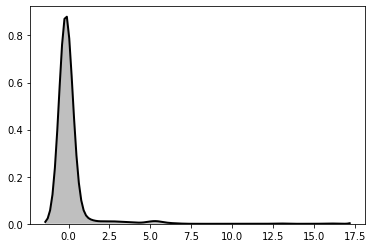

In [87]:
sbn.distplot(zabund, hist = False, color = 'black', kde = True, kde_kws = {'shade': True, 'linewidth': 2, 'bw':0.4})

## Plot NCL features

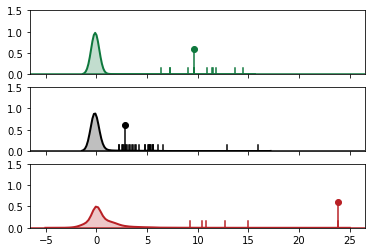

In [89]:
fig, axs = plt.subplots(3, 1, sharex=True)

sbn.distplot(zabund, hist = False, color = 'black', kde = True, kde_kws = {'shade': True, 'linewidth': 2, 'bw':0.4},ax=axs[1])
axs[1].axvline(x=NCLabundzscore,color='black',ymin=0,ymax=0.4)
axs[1].plot(NCLabundzscore,0.6,'o',color='black')
axs[1].axhline(y=0,color='black',)
axs[1].set_ylim(0, 1.5)
for xval in topabundvals:
    axs[1].axvline(x=xval,color='black',ymin=0,ymax=0.1)
    #axs[1].plot(xval,0.6,'o',color='black')


sbn.distplot(negneg, hist = False, color = '#B82025', kde = True, kde_kws = {'shade': True, 'linewidth': 2, 'bw':0.4},ax=axs[2])
axs[2].axvline(x=NCLnegnegzscore,color='#B82025',ymin=0,ymax=0.4)
axs[2].plot(NCLnegnegzscore,0.6,'o',color='#B82025')
axs[2].axhline(y=0,color='#B82025')
axs[2].set_ylim(0, 1.5)
for xval in topnegnegvals:
    axs[2].axvline(x=xval,color='#B82025',ymin=0,ymax=0.1)


sbn.distplot(zrg, hist = False, color = '#0E783D', kde = True, kde_kws = {'shade': True, 'linewidth': 2, 'bw':0.4},ax=axs[0])
axs[0].axvline(x=NCLrgzscore,color='#0E783D',ymin=0,ymax=0.4)
axs[0].plot(NCLrgzscore,0.6,'o',color='#0E783D')
axs[0].axhline(y=0,color='#0E783D')
axs[0].set_ylim(0, 1.5)
for xval in toprgvals:
    axs[0].axvline(x=xval,color='#0E783D',ymin=0,ymax=0.1)

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig("Manuscript_Figures/2023_03/NCL_KDE_RGFrac_Abundance_NegNeg.pdf", transparent=True, bbox_inches = "tight") 


In [108]:
dftmp=pd.read_table('Nucleolarome_accessions.txt')
dftmp2=pd.read_table('HPA_All/2023_03/subcell_location_Nucleoli_Nucleoli_fibrillar_center_Nucleoli_rim.tsv')

list1=dftmp['Uniprot'].tolist()
print(len(list1))
list2=dftmp2['Uniprot'].tolist()
print(len(list2))

listdiff=list(set(list1) - set(list2))

genediff=[]
for s in listdiff:
    if s in fullaccs:
        idx=fullaccs.index(s)
        genediff.append(mygenes[idx])
        print(mygenes[idx])
    
#print(genediff)
    

1289
1425
LINC03040 IDR1
DENND5B IDR1
DDX49 IDR1
SLC6A17 IDR1
HES6 IDR1
ANO8 IDR1
FRMD8 IDR1
CDHR3 IDR1
FGF5 IDR1
TTC28 IDR1
MAF1 IDR1
DDX27 IDR1
SLC35F4 IDR1
PNMA6A IDR1
SENP5 IDR1
TLCD2 IDR1
DOCK11 IDR1
MFSD1 IDR1
CD2AP IDR1
RNPEPL1 IDR1
CERS5 IDR1
CCDC136 IDR1
NCF2 IDR1
ARAF IDR1
PVRIG IDR1
GRAMD1B IDR1
TEX264 IDR1
HAUS7 IDR1
KIF3B IDR1
GPR157 IDR1
HEATR5B IDR1
LEKR1 IDR1
FBXL22 IDR1
RIOK1 IDR1
PAX2 IDR1
POU2F3 IDR1
C2CD2L IDR1
SPON1 IDR1
SEPTIN7 IDR1
C3orf36 IDR1
SIRT7 IDR1
PCGF5 IDR1
LSM14B IDR1
LRCH2 IDR1
NUAK2 IDR1
EFHB IDR1
ZDHHC14 IDR1
TRO IDR1
RBM18 IDR1


## Get top 10 proteins of all 90 features

In [9]:
dftmp = pd.DataFrame()
dftmp['Genes']=mygenes
dftmp['Accessions']=fullaccswnums
dfzvecall = pd.DataFrame(zvecaa, columns=myfeat)
dfall = pd.concat([dftmp, dfzvecall], axis=1)

#dfall.to_excel("human_idrome_length_gte_30_all_features.xlsx")

print(dfall)



                Genes Accessions   pol-pol   pol-hyd   pol-pos   pol-neg  \
0      KRTAP4-16 IDR1   G5E9R7_1 -2.072597 -0.969229  0.000000  0.000000   
1          TULP4 IDR1   Q9NRJ4_1 -0.831286 -0.860250 -1.072166  0.000000   
2          TULP4 IDR2   Q9NRJ4_2 -0.661645 -1.750948  0.000000  0.000000   
3          TULP4 IDR3   Q9NRJ4_3 -0.172024 -0.633311  0.000000  0.000000   
4          TULP4 IDR4   Q9NRJ4_4 -1.653711 -1.510634 -0.750083  0.000000   
...               ...        ...       ...       ...       ...       ...   
24503     YTHDF3 IDR2   Q7Z739_2  0.998288 -0.543420  0.000000  0.000000   
24504     LONRF1 IDR1   Q17RB8_1  0.426015 -0.427605 -0.338251  0.000000   
24505     LONRF1 IDR2   Q17RB8_2  0.701358 -1.205004  0.000000  0.435250   
24506      CDC73 IDR1   Q6P1J9_1 -1.339198  0.000000 -1.423315  0.125236   
24507      CDC73 IDR2   Q6P1J9_2 -0.990036 -0.132040 -1.101326  0.000000   

       pol-aro   pol-ala   pol-pro   pol-gly  ...   M Block   N Block  \
0          0.0

In [23]:
dfzvec = pd.DataFrame(zvecaa[allidx_nuc,:], columns=myfeat)
dftmp = pd.DataFrame()
dftmp['Genes']=genenameswnums_nuc
df2 = pd.concat([dftmp, dfzvec], axis=1)

#print(df2)
#hi
cutoffval=3
featurecheck='RG Frac'
#featurecheck='K Block'
#featurecheck='neg-neg'
df2 = df2[ (df2[featurecheck] >cutoffval)]
df2 = df2.sort_values(by=[featurecheck], ascending=False)
print(df2[['Genes',featurecheck]])
print(len(df2[featurecheck]))

#display(df2[['Genes',featurecheck]].to_string())

            Genes    RG Frac
1294    DHX9 IDR2  14.443279
1685    GAR1 IDR2  13.714621
1579    NOM1 IDR1  11.777179
1989     FBL IDR1  11.545019
1730   FBLL1 IDR1  11.430508
1684    GAR1 IDR1  10.883364
36       NCL IDR2   9.648642
1816   EWSR1 IDR3   9.638070
1326   DDX21 IDR2   9.061929
1280   DDX53 IDR1   7.239376
539     DDX5 IDR1   7.215932
1491     EN1 IDR2   6.323939
129     CMAS IDR1   5.893683
1815   EWSR1 IDR2   5.496524
1842    COIL IDR3   5.123225
540     DDX5 IDR2   5.046617
2034   SRSF5 IDR1   4.889753
1168   DDX46 IDR1   4.567981
1263    ILF3 IDR4   4.235016
611     PURG IDR1   4.214031
1943  INO80B IDR3   4.172660
816   ZNF142 IDR5   3.865335
1596   RPL18 IDR1   3.634841
1506  ZCCHC2 IDR2   3.551180
745   NFKBIE IDR1   3.425689
675     NOP9 IDR1   3.132876
26
